# **TR-03/2020 - Technical report: Extreme climatic events for Campinas**


|Technical Report ID  |2020/03|
|--|--|
| Title |Low humidity waves: analysis for Campinas|
| Authors | Júlia De Lázari, Paula Dornhofer|
| Creation Date| 2020-11|

This report refers to the occurence of extreme climatic events in Campinas, SP.

## Database description

The database used is from Viracopos (Campinas, SP), that has daily measures of minimum and maximum temperature, average atmospheric pressure and minimum and maximum humidity. The database has data from 1983 until 2018.

The inputs for this analysis were:
- viracopos_temperature.csv
- viracopos_pressure.csv
- viracopos_humidity.csv

that consists of csv files with Viracopos data, already processed, for each meteorological parameter.

## Results

The [climatex library](https://github.com/climate-and-health-datasci-Unicamp/py-climate-health-toolbox), developed to compute extreme climate events, was used to compute the events and its yearly and seasonal metrics.

Subsets were saved with the extreme variations for each of the meteorological parameters, for future analysis:

- EV_temperature.csv: viracopos_temperature.csv with columns for the extreme temperature events
- EV_pressure.csv: viracopos_pressure.csv with columns for the extreme pressure events
- EV_humidity.csv: viracopos_humidity.csv with columns for the extreme humidity events





##**Extreme events**

The analysed extreme events were:

**Extreme thermal range:** days in which the thermal range is above the 90th percentile.

**Extreme difference of temperature between days:** days in which the difference between maximum and minimum temperature in relation to the previous days is above the 90th percentile.

**Low pressure waves:** three or more consecutive days in which the maximum and minimum pressure were below the 10th percentile.

**High pressure waves:** three or more consecutive days in which the maximum and minimum pressure were above the 90th percentile.
    
**Extreme difference of pressure between days:** days in which the difference between maximum and minimum pressure in relation to the previous days is above the 90th percentile.

**Low humidity waves:** three or more consecutive days in which the maximum and minimum humidity were below the 10th percentile.

**High humidity waves:** three or more consecutive days in which the maximum and minimum humidity were above the 90th percentile.
    
**Extreme difference of humidity between days:** days in which the difference between maximum and minimum humidity in relation to the previous days is above the 90th percentile.

**Extreme humidity variation:** days in which the humidity variation (max humidity - min humidity) is above the 90th percentile.


##**Metrics**

The analysed metrics were

- Number of events per year
- Total number of days under influence of the extreme event
- Longest event

The second and third metric were analysed only for the wave events.

##**Import libraries**

In [9]:
! git clone https://github.com/climate-and-health-datasci-Unicamp/py-climate-health-toolbox

fatal: destination path 'py-climate-health-toolbox' already exists and is not an empty directory.


In [10]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import datetime
import more_itertools as mit
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
from calendar import isleap

import sys
sys.path.append('/content/py-climate-health-toolbox/climahe')
import climatex as tex

from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Temperature**


In [11]:
#Load temperature dataframe
df_temp = pd.read_csv('viracopos_temperature.csv')
df_temp = df_temp.drop(columns = {'Unnamed: 0'})
df_temp['DATE'] = pd.to_datetime(df_temp['DATE']) #to datetime
df_temp['YEAR'] = df_temp['DATE'].dt.strftime('%Y') #create column for year

In [12]:
#define climatic normal for temperature
climatic_norm_temp = df_temp[(df_temp['YEAR']>='1983') & (df_temp['YEAR']<='2018')]
#define database for temperature
database_temp = df_temp[df_temp['YEAR']>='2001']

### **Extreme thermal range**



In [13]:
help(tex.check_TemperatureAboveRange)

Help on function check_TemperatureAboveRange in module climatex:

check_TemperatureAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of temperature according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at 

In [14]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for temperature range
database_temp, df_pct = tex.check_TemperatureAboveRange(database_temp,'TMAX','TMIN',climatic_norm_temp,'TMAX','TMIN')

,RND
YEAR,
2001,64
2002,64
2003,25
2004,13
2005,13
2006,13
2007,29
2008,23
2009,12


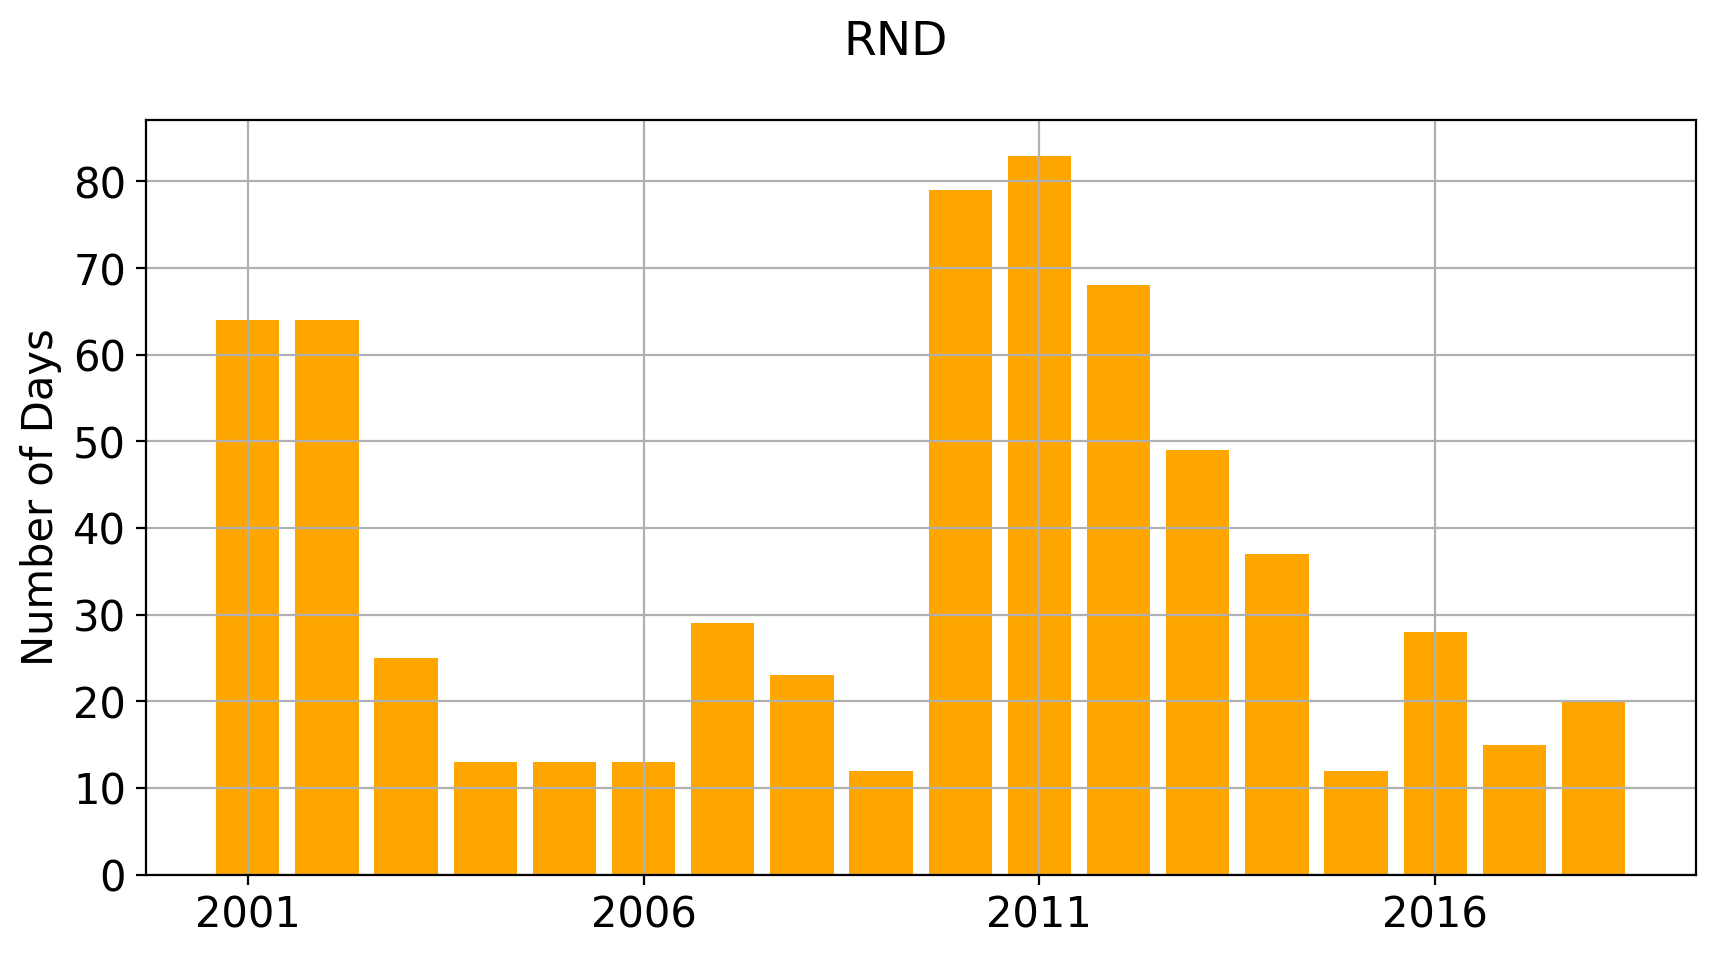

In [15]:
tex.range_metrics(database_temp,True)

RND
YEAR SEASON     
2001 1        22
     2        19
     3        11
     4        12
2002 1        12
...          ...
2017 4         4
2018 1         9
     2         7
     3         3
     4         1

[72 rows x 1 columns]

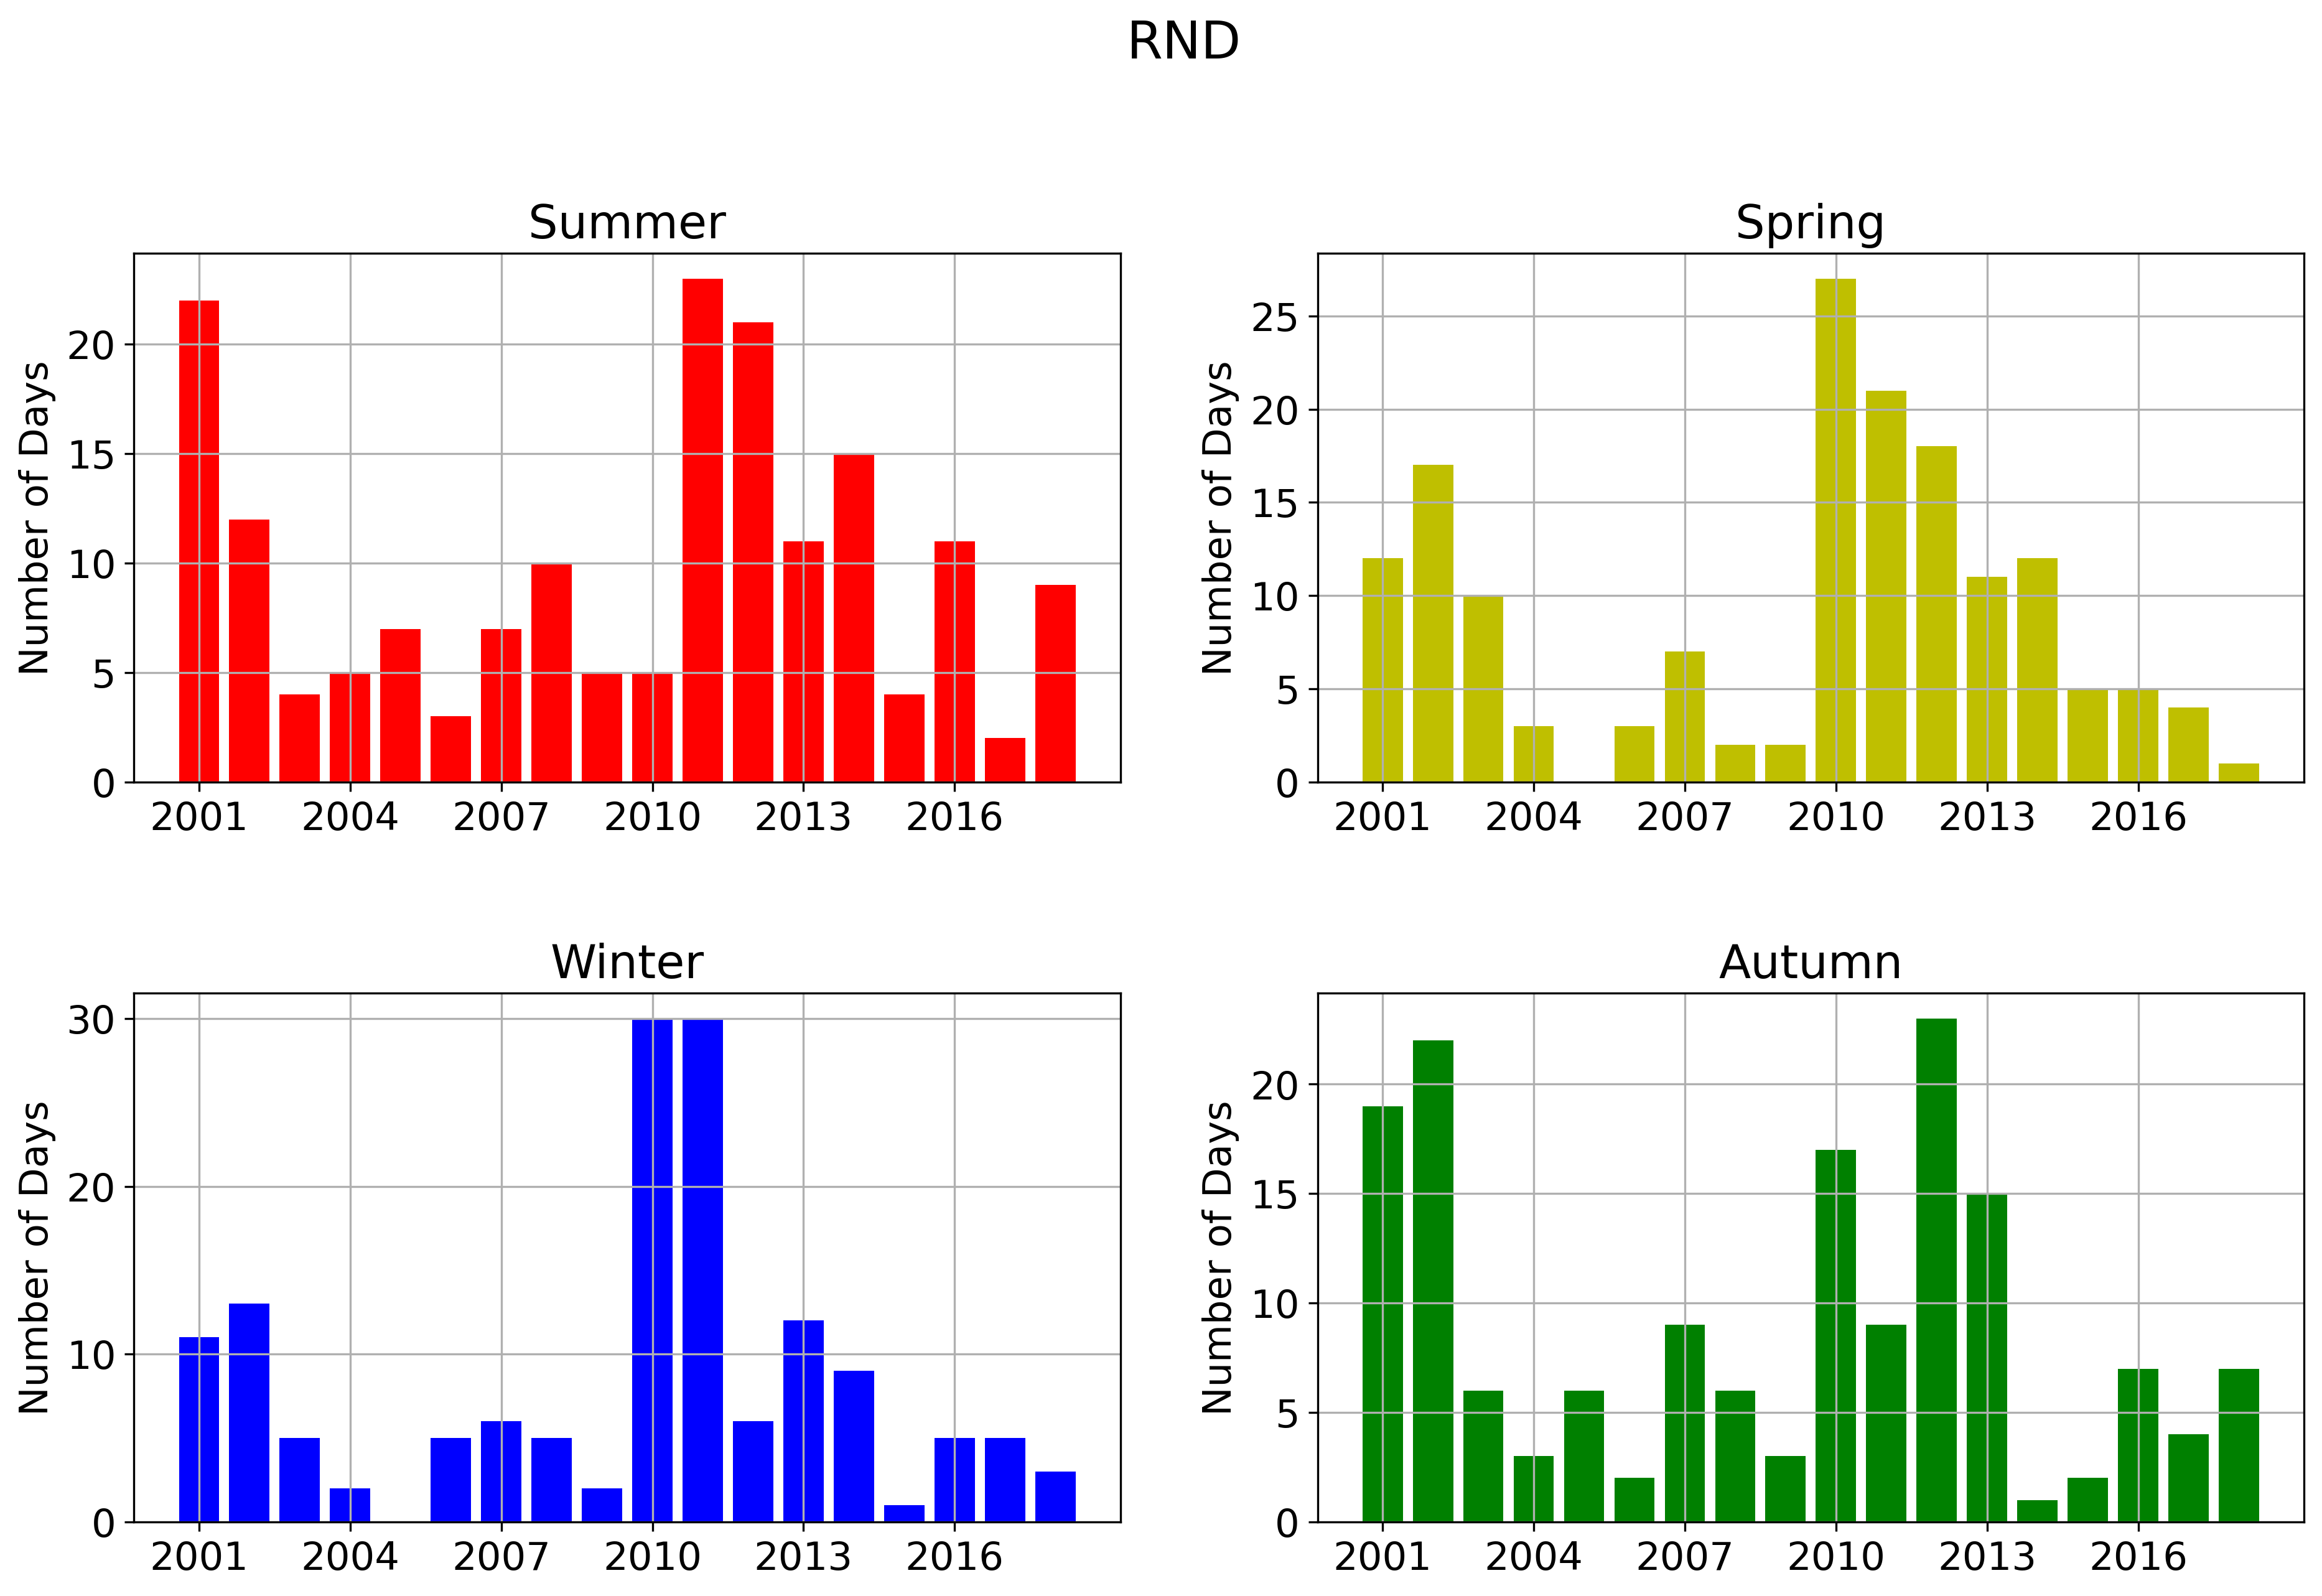

In [16]:
tex.range_seasonMetrics(database_temp,True)

### **Extreme temperature difference between days**


In [17]:
help(tex.check_Temperature_difdays)

Help on function check_Temperature_difdays in module climatex:

check_Temperature_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of temperature according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## temperature (Dif_max) between two subsequent days and for the difference between minimum
    ## temperature (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Cl

In [18]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum temperature difference
database_temp, df_pct = tex.check_Temperature_difdays(database_temp,'TMAX','TMIN',climatic_norm_temp,'TMAX','TMIN')

,DND
YEAR,
2001,9
2002,1
2003,6
2004,6
2005,8
2006,3
2007,6
2008,2
2009,7


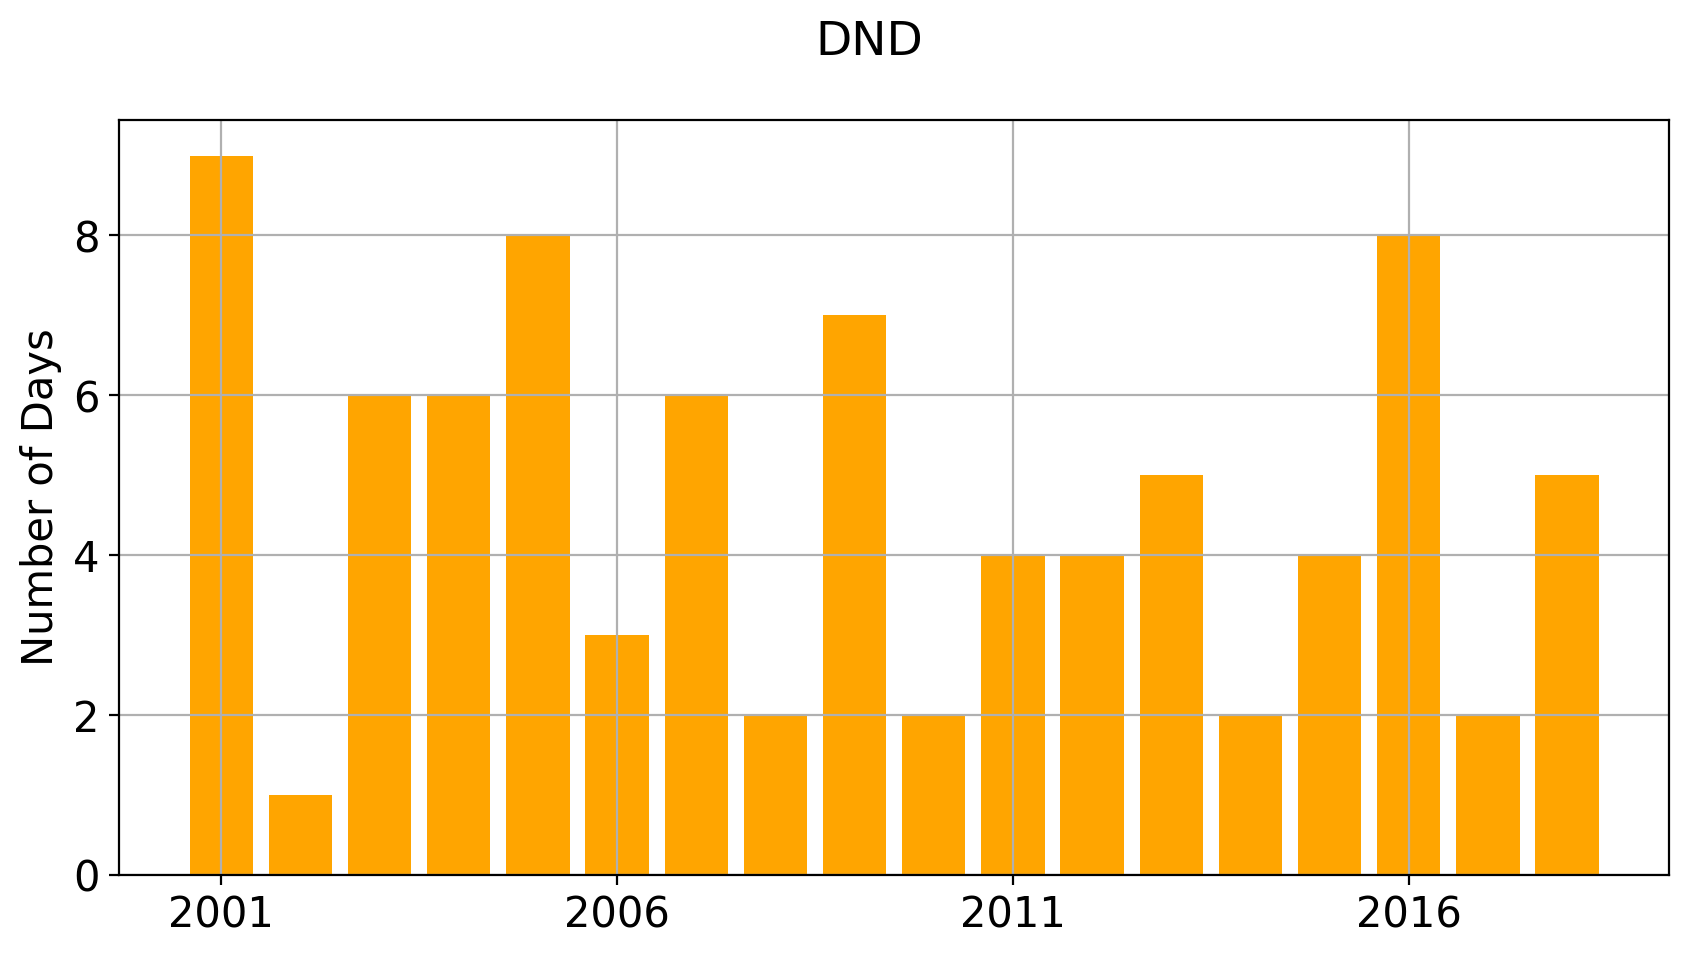

In [19]:
tex.dif_metrics(database_temp,True)

RND
YEAR SEASON     
2001 1         1
     2         1
     3         7
     4         0
2002 1         0
...          ...
2017 4         1
2018 1         2
     2         0
     3         1
     4         2

[72 rows x 1 columns]

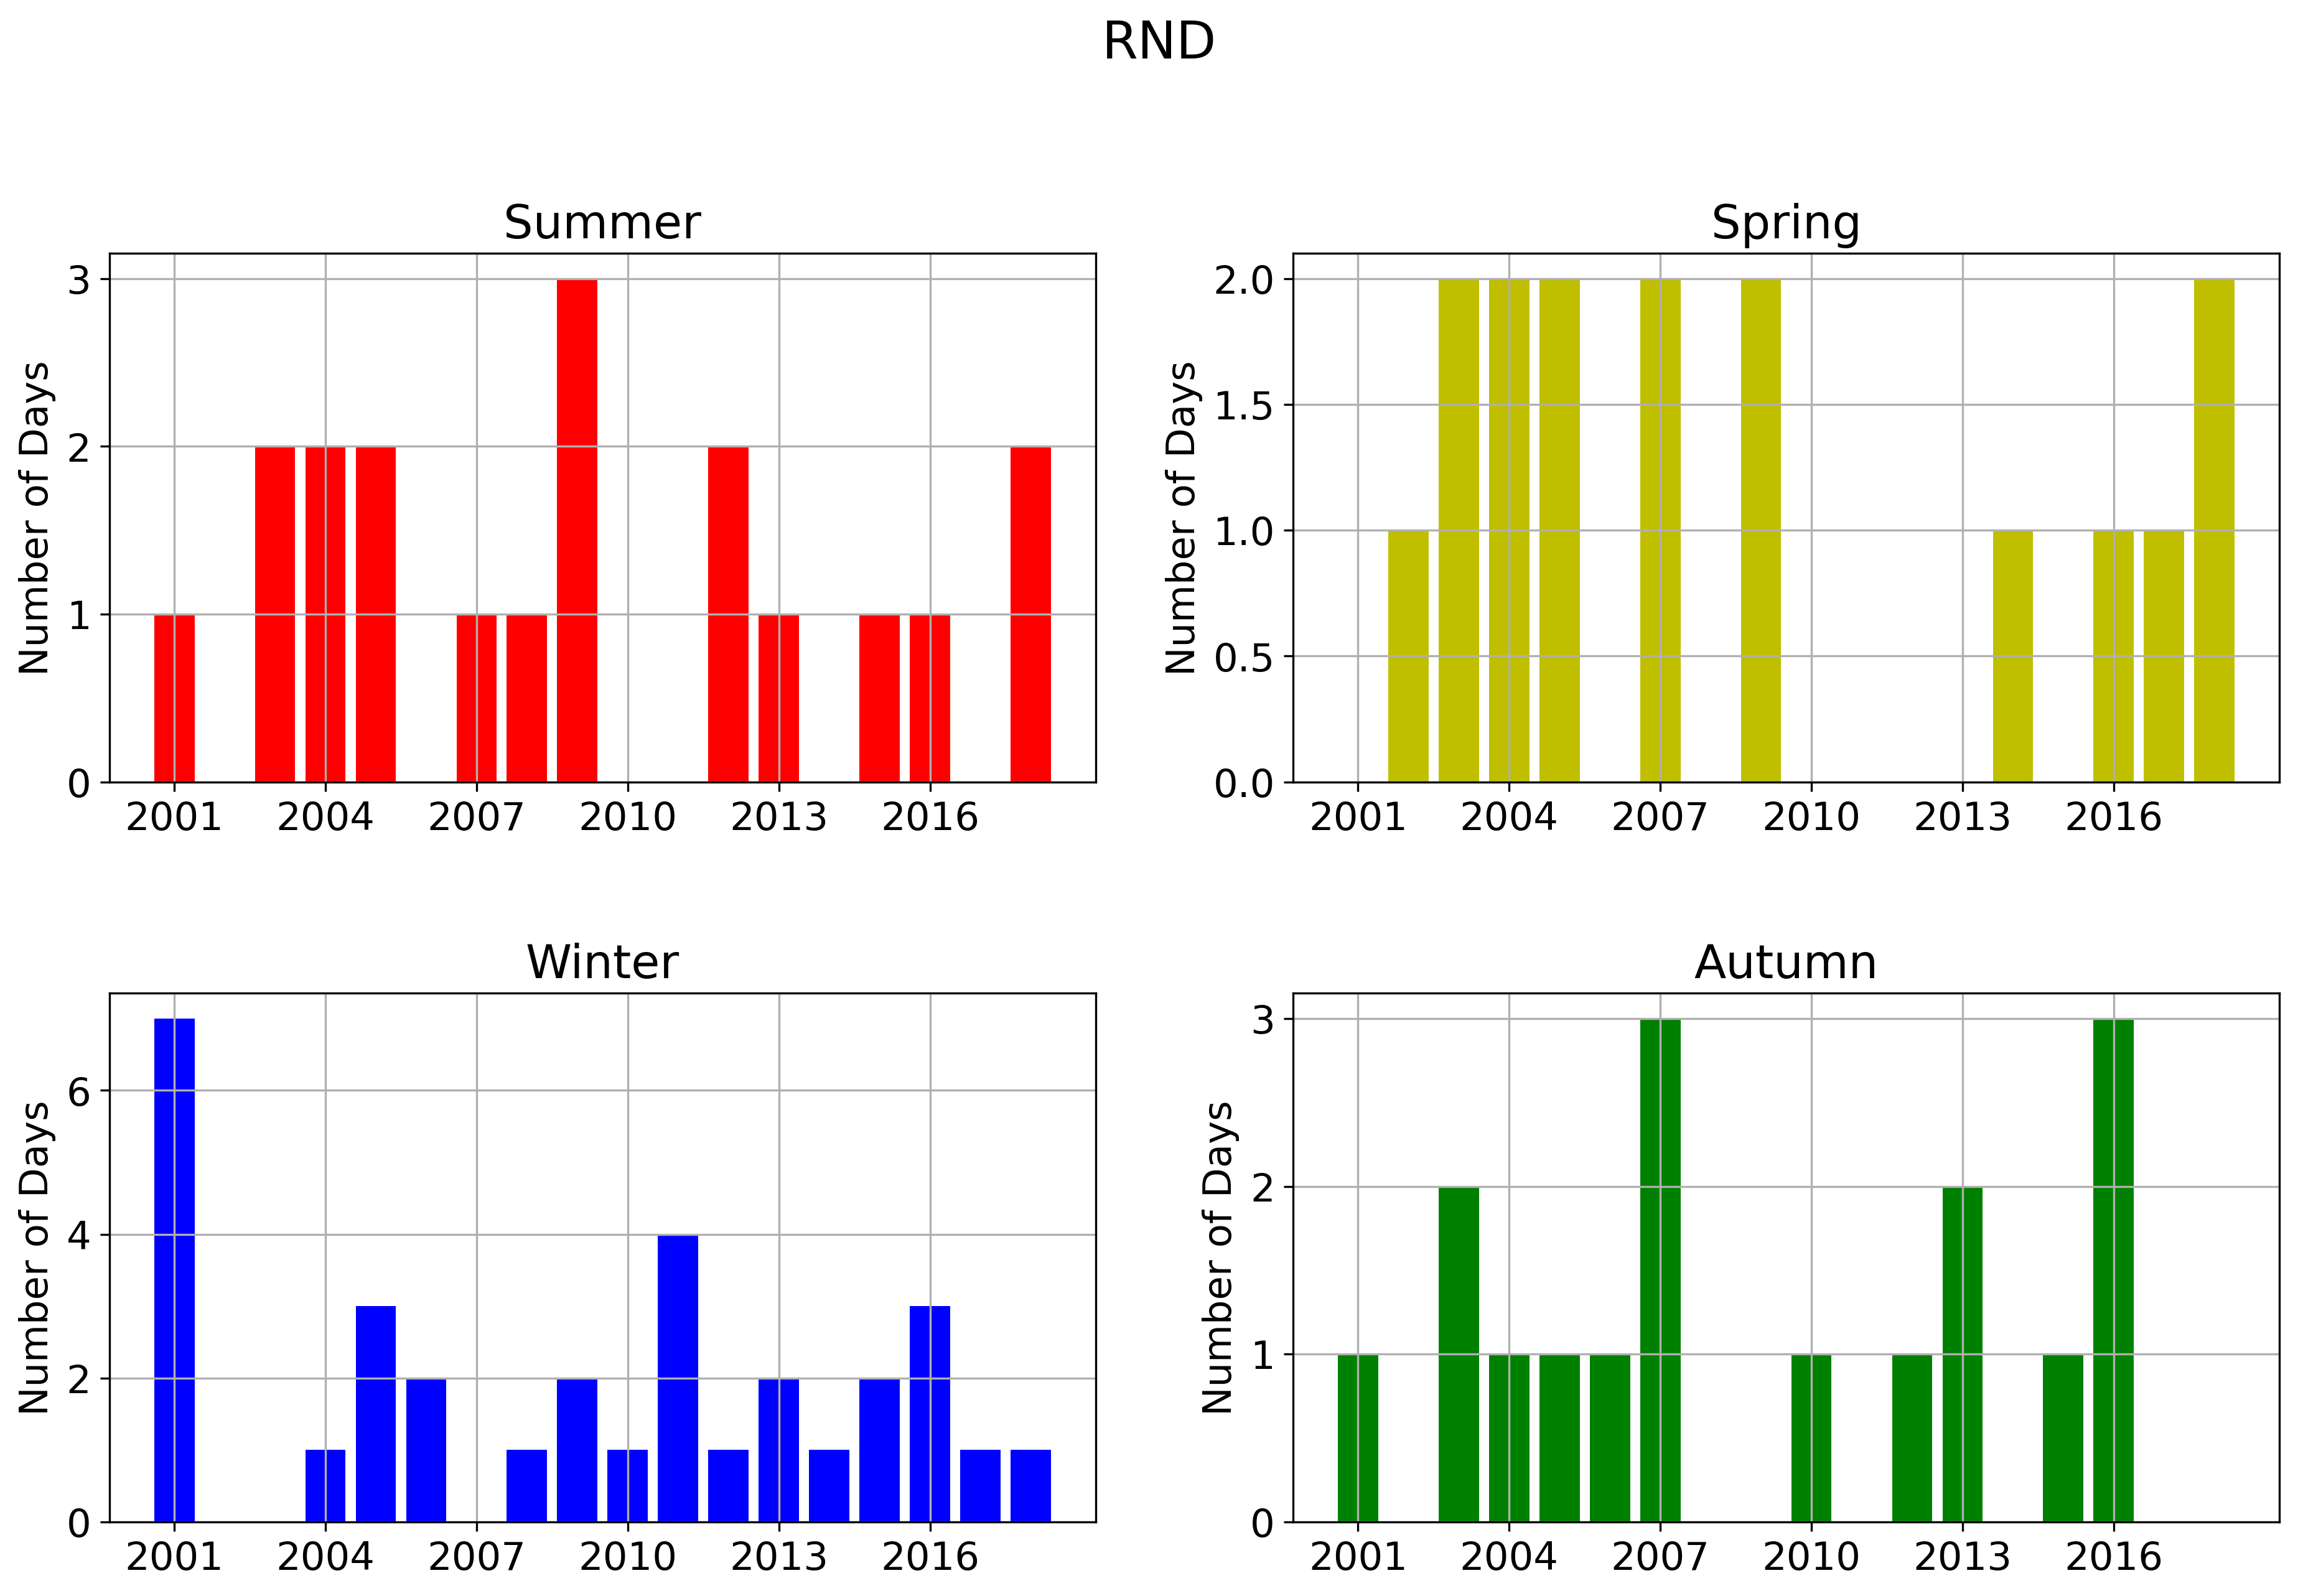

In [20]:
tex.dif_seasonMetrics(database_temp,True)

### Save

In [21]:
database_temp.to_csv('EV_temperature.csv')

## **Pressure**

As the database only have the average value of pressure for each day, this value was used as maximum and minimum parameter in the functions.


In [22]:
#Load pressure dataframe
df_pressure = pd.read_csv('viracopos_pressure.csv')
df_pressure = df_pressure.drop(columns = {'Unnamed: 0'})
df_pressure['DATE'] = pd.to_datetime(df_pressure['DATE']) #to datetime
df_pressure['YEAR'] = df_pressure['DATE'].dt.strftime('%Y') #create column for year

In [23]:
#define climatic normal for pressure
climatic_norm_pressure = df_pressure[(df_pressure['YEAR']>='1983') & (df_pressure['YEAR']<='2018')]
#define database for pressure
database_pressure = df_pressure[df_pressure['YEAR']>='2001']

### **Low Pressure Wave**


In [24]:
help(tex.check_LowPressureWave)

Help on function check_LowPressureWave in module climatex:

check_LowPressureWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Low Pressure Waves on the database according to the Climatic Normal
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for pressure waves .It obtains first a dataframe with the percentiles computed
    ## from the Climatic Normal according to the defined window size (df_pct). Then
    ## compares it with the database, to check if the maximum and minimum values of pressure
    ## are below the  corresponding percentile. If they are below the threshold, the column 'below_pct'
    ## receives 1. This column is then used to identify if there are 3 or mor

In [25]:
#get dataframe with columns 'below_pct' and 'LPW' indicating the occurence of a low pressure wave
#and the dataframe with the 10th percentile for pressure
database_pressure,df_pct = tex.check_LowPressureWave(database_pressure,'AVGPRESSURE','AVGPRESSURE',climatic_norm_pressure,'AVGPRESSURE','AVGPRESSURE')

,LPWN,LPWD,LPWF
YEAR,,,
2001,4.0,5.0,15.0
2002,1.0,3.0,3.0
2003,3.0,5.0,13.0
2004,3.0,7.0,17.0
2005,4.0,6.0,16.0
2006,4.0,6.0,18.0
2007,5.0,5.0,19.0
2008,8.0,7.0,33.0
2009,6.0,7.0,24.0


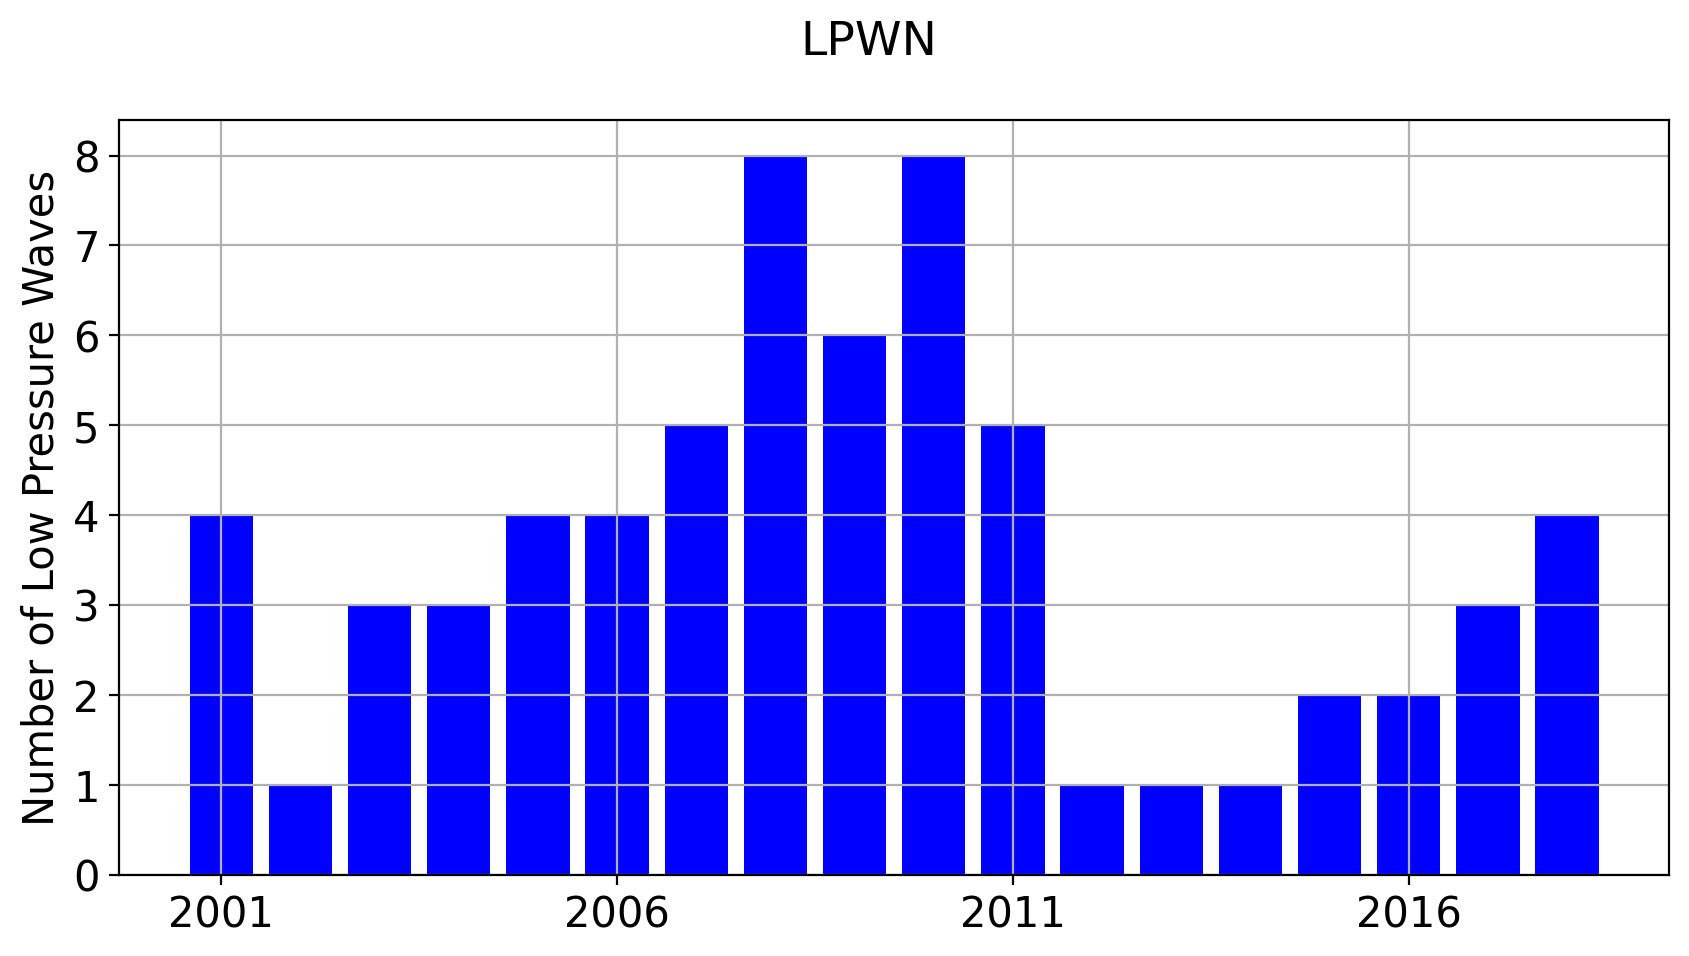

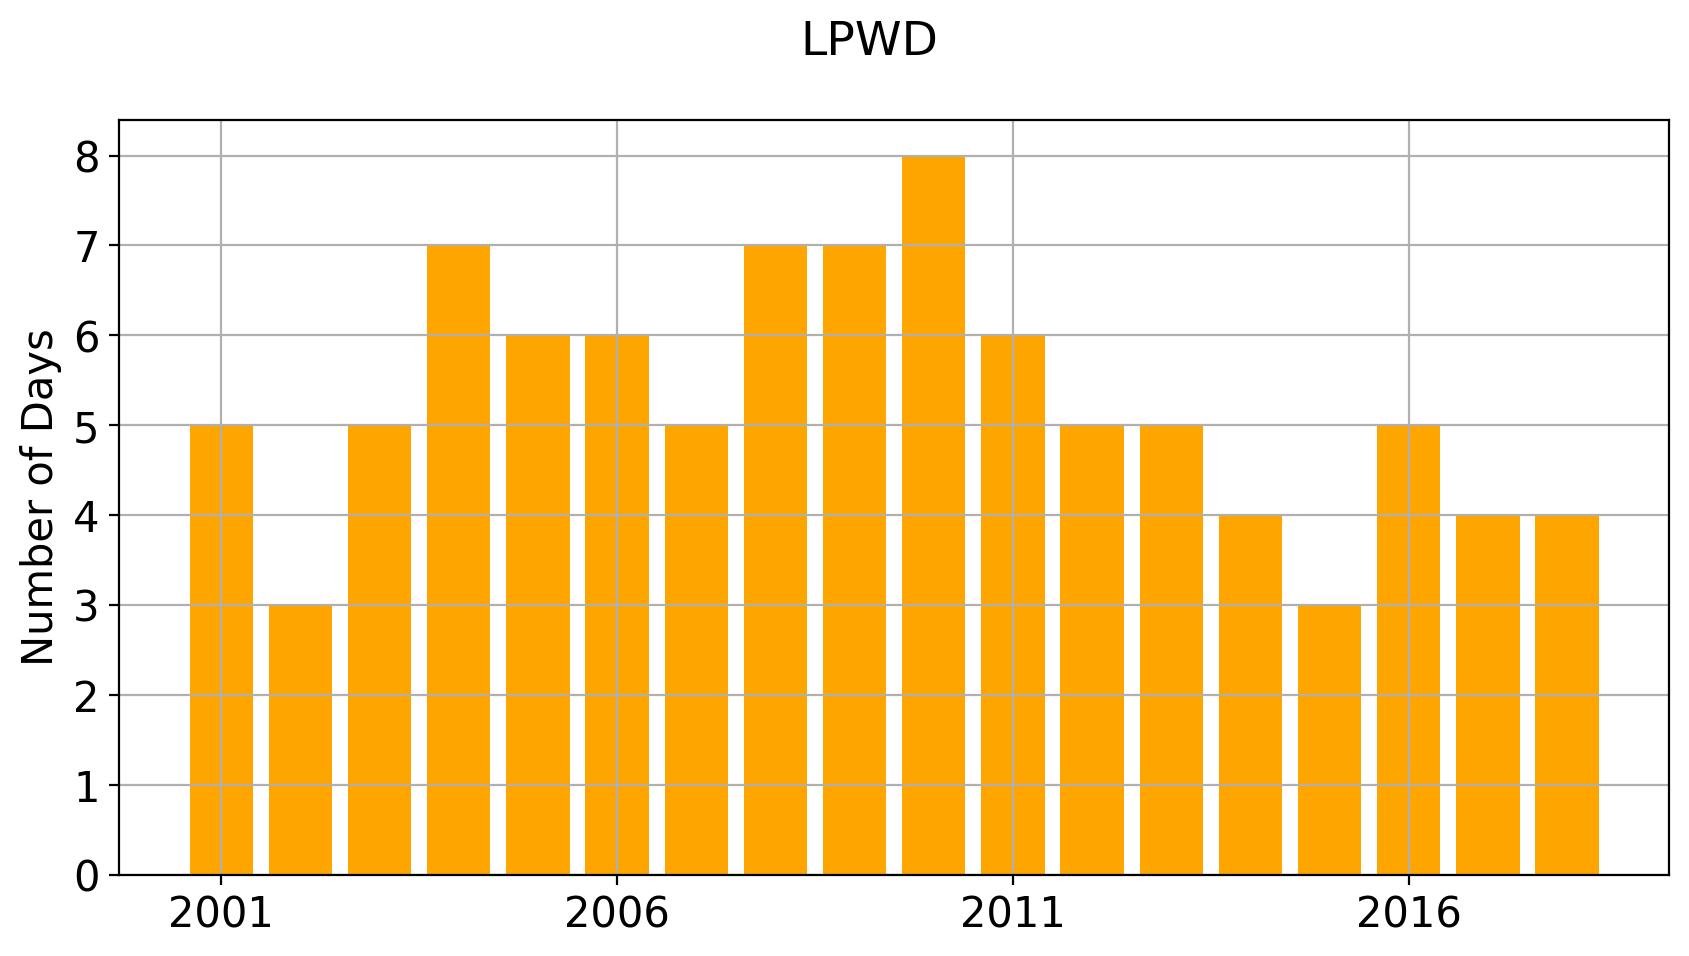

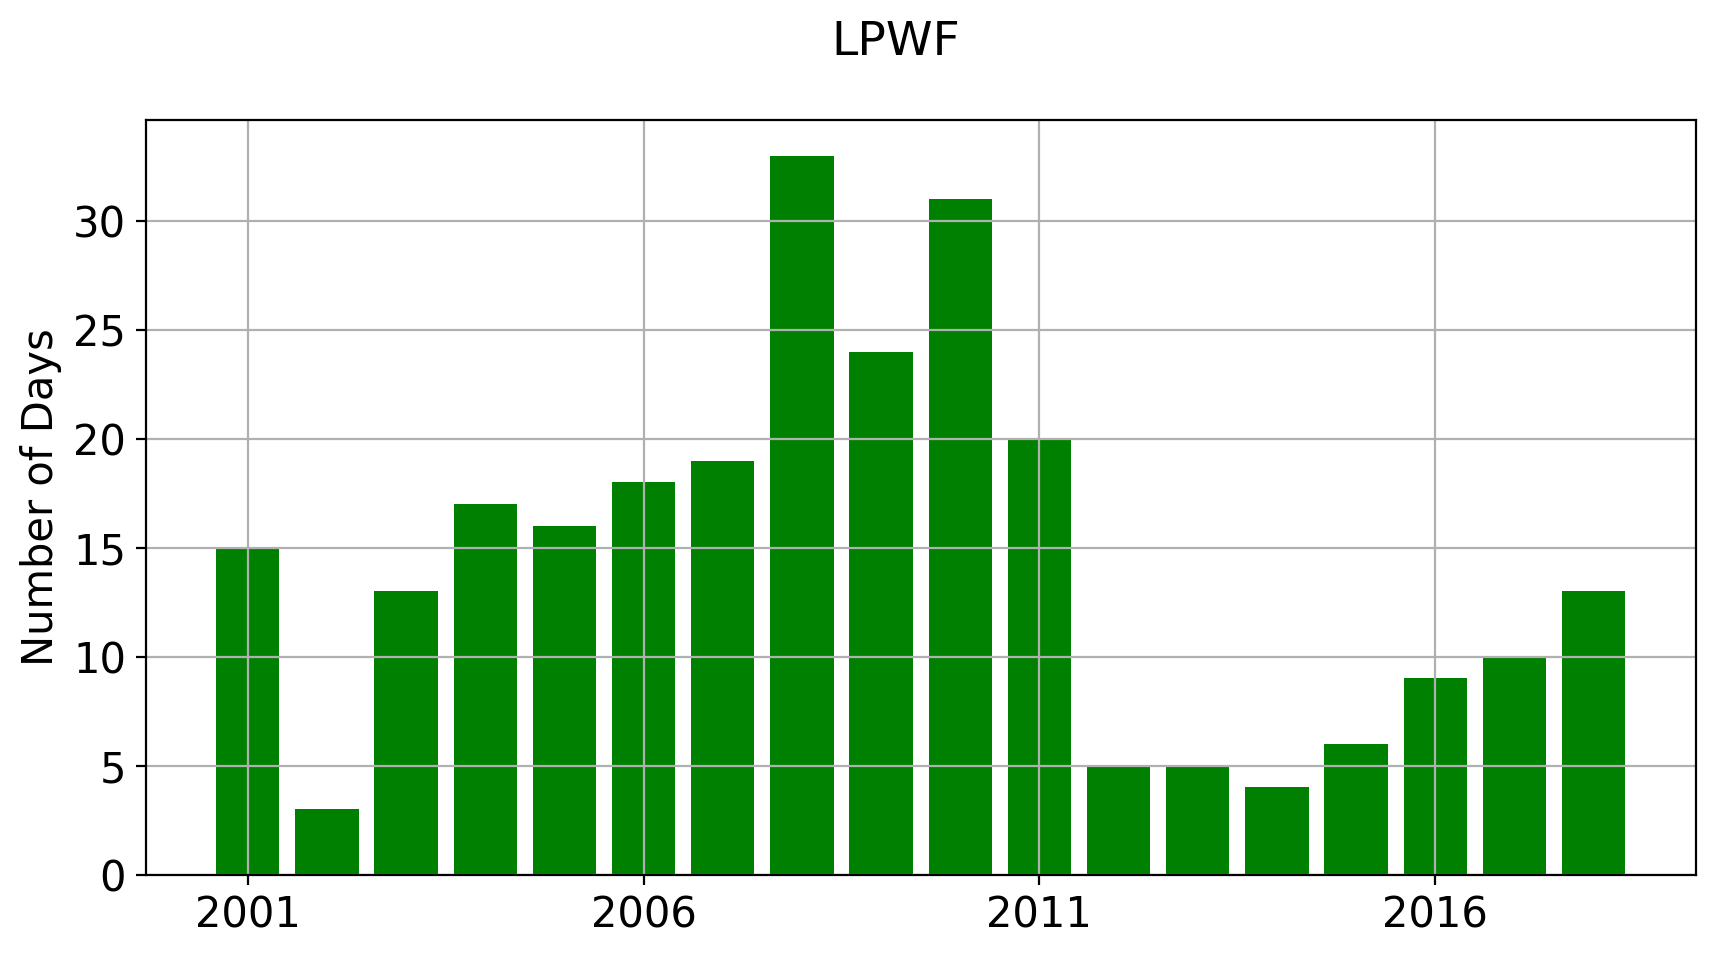

In [26]:
tex.wave_metrics(database_pressure,'LPW',True)

LPWN  LPWD  LPWF
YEAR SEASON                  
2001 1        0.0   0.0   0.0
     2        1.0   3.0   3.0
     3        0.0   0.0   0.0
     4        1.0   4.0   4.0
2002 1        3.0   5.0  11.0
...           ...   ...   ...
2017 4        2.0   3.0   6.0
2018 1        2.0   4.0   7.0
     2        2.0   4.0   7.0
     3        0.0   0.0   0.0
     4        1.0   3.0   3.0

[72 rows x 3 columns]

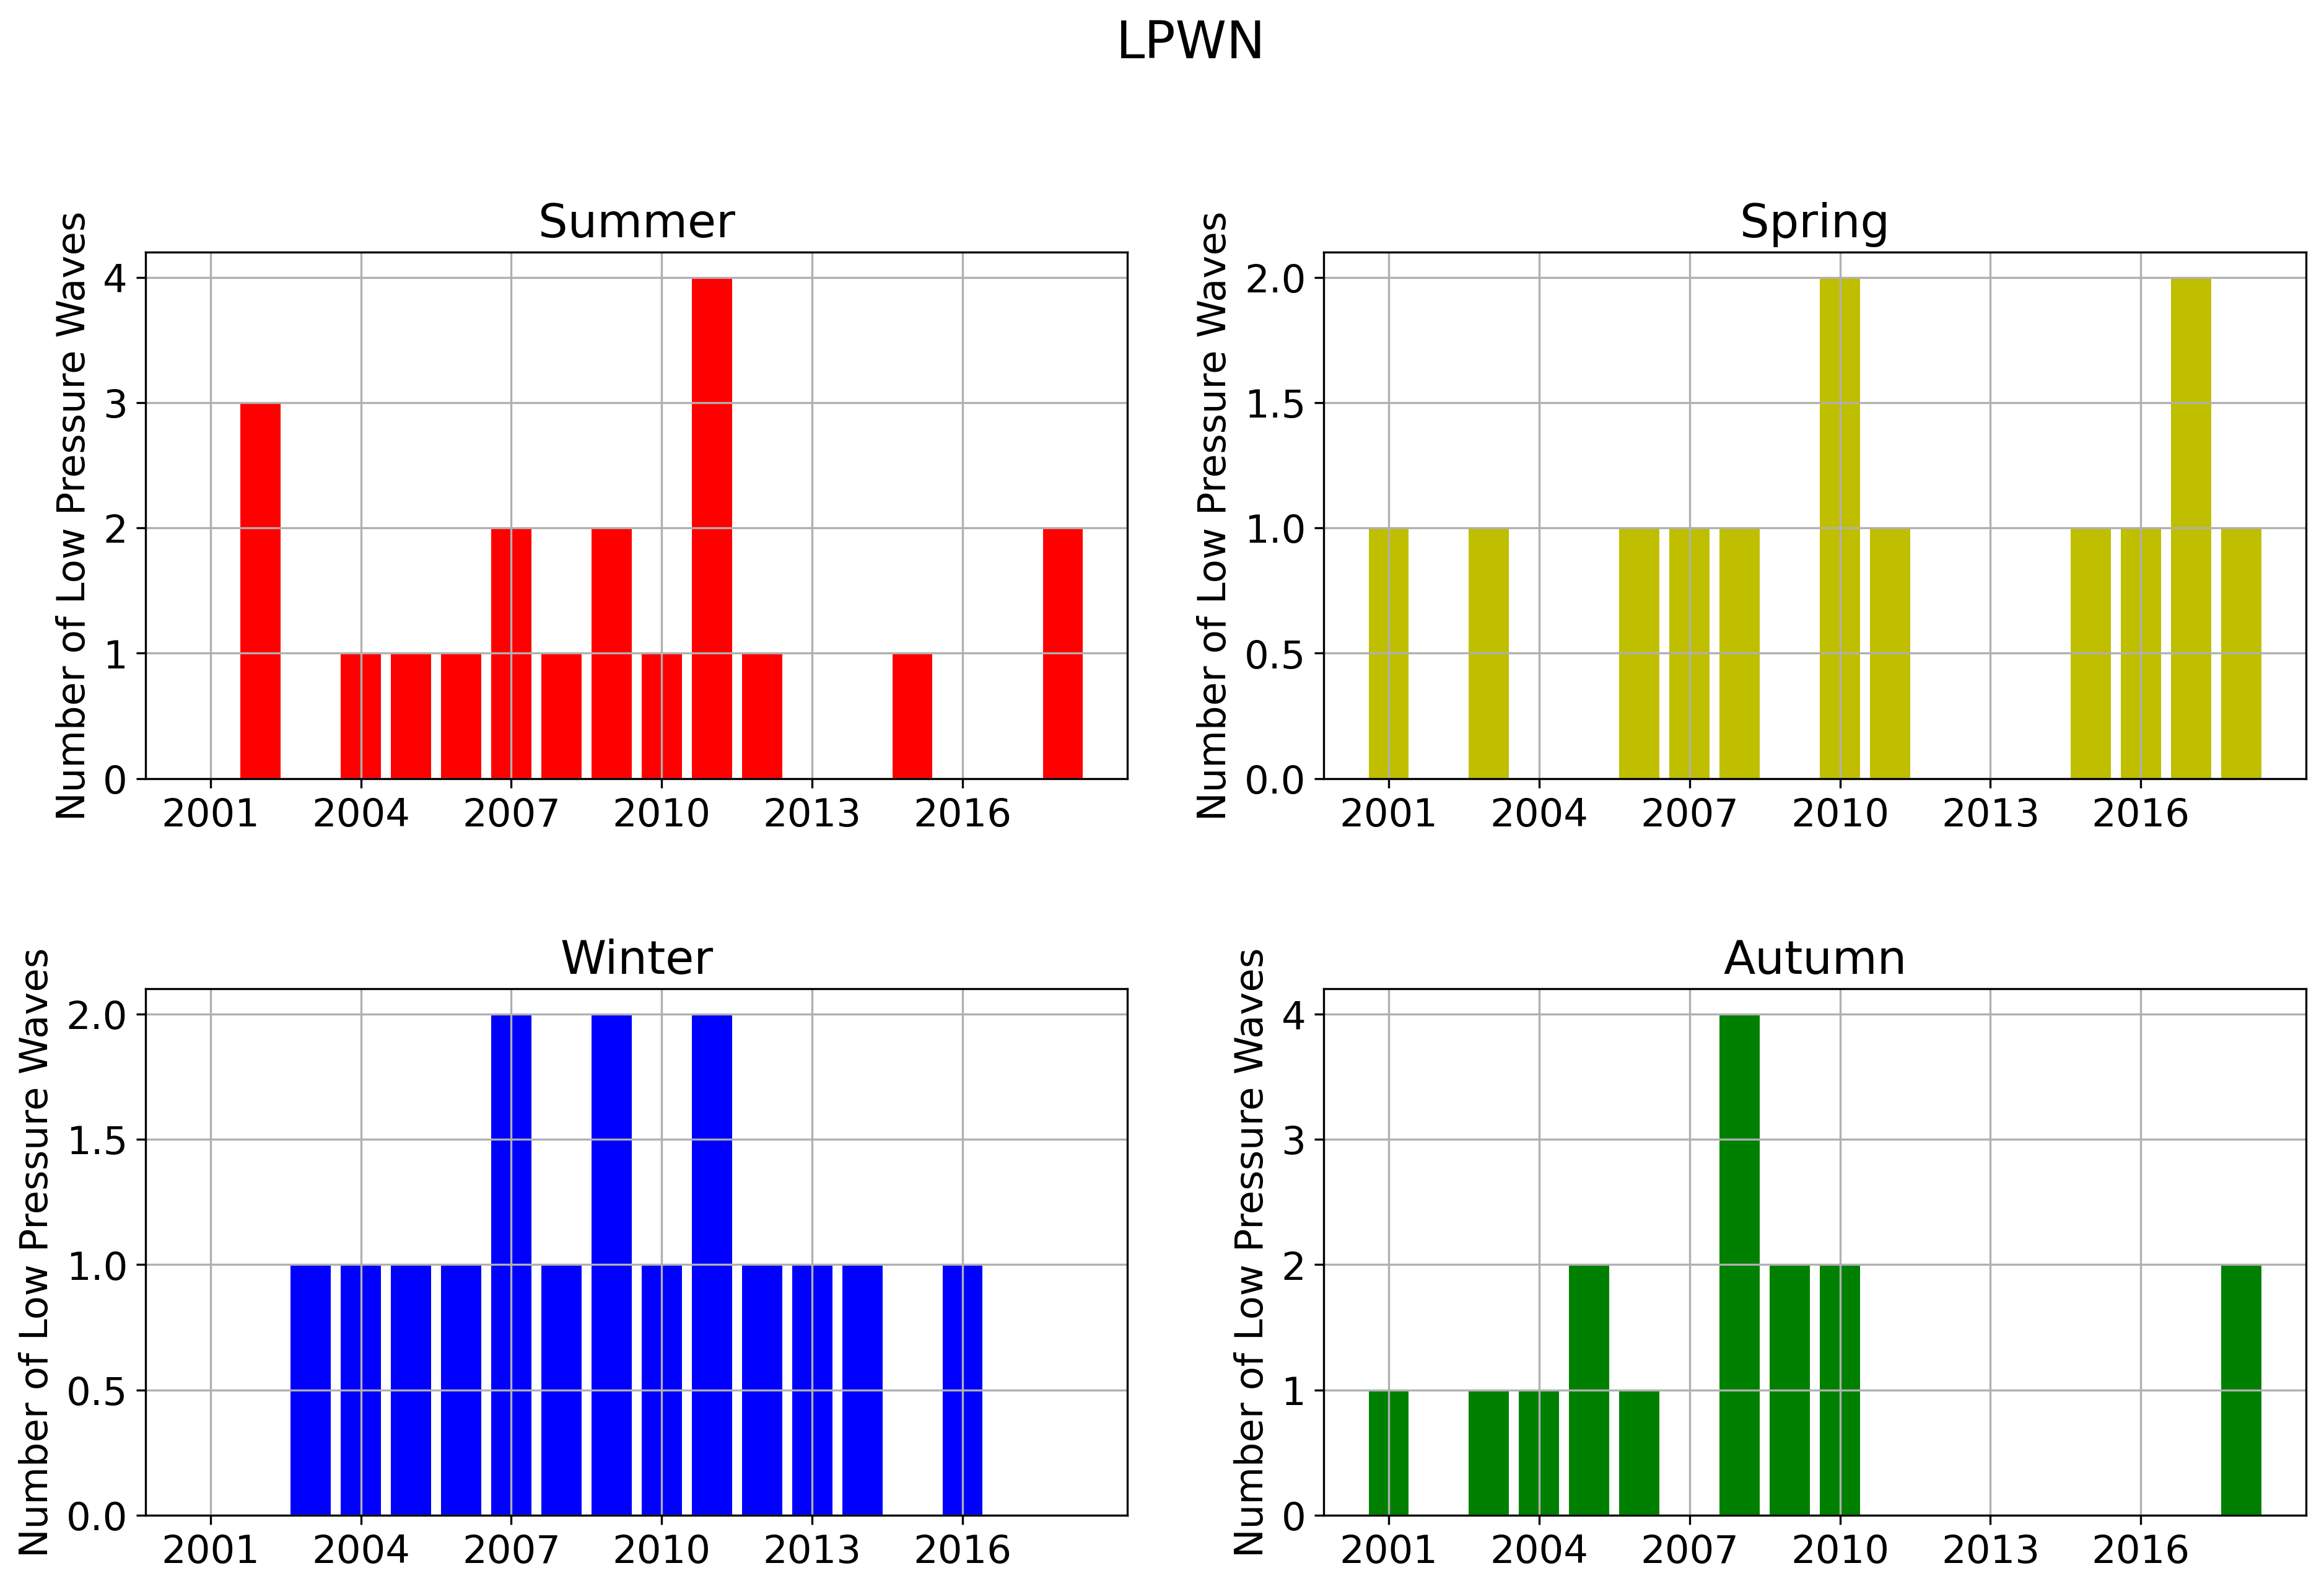

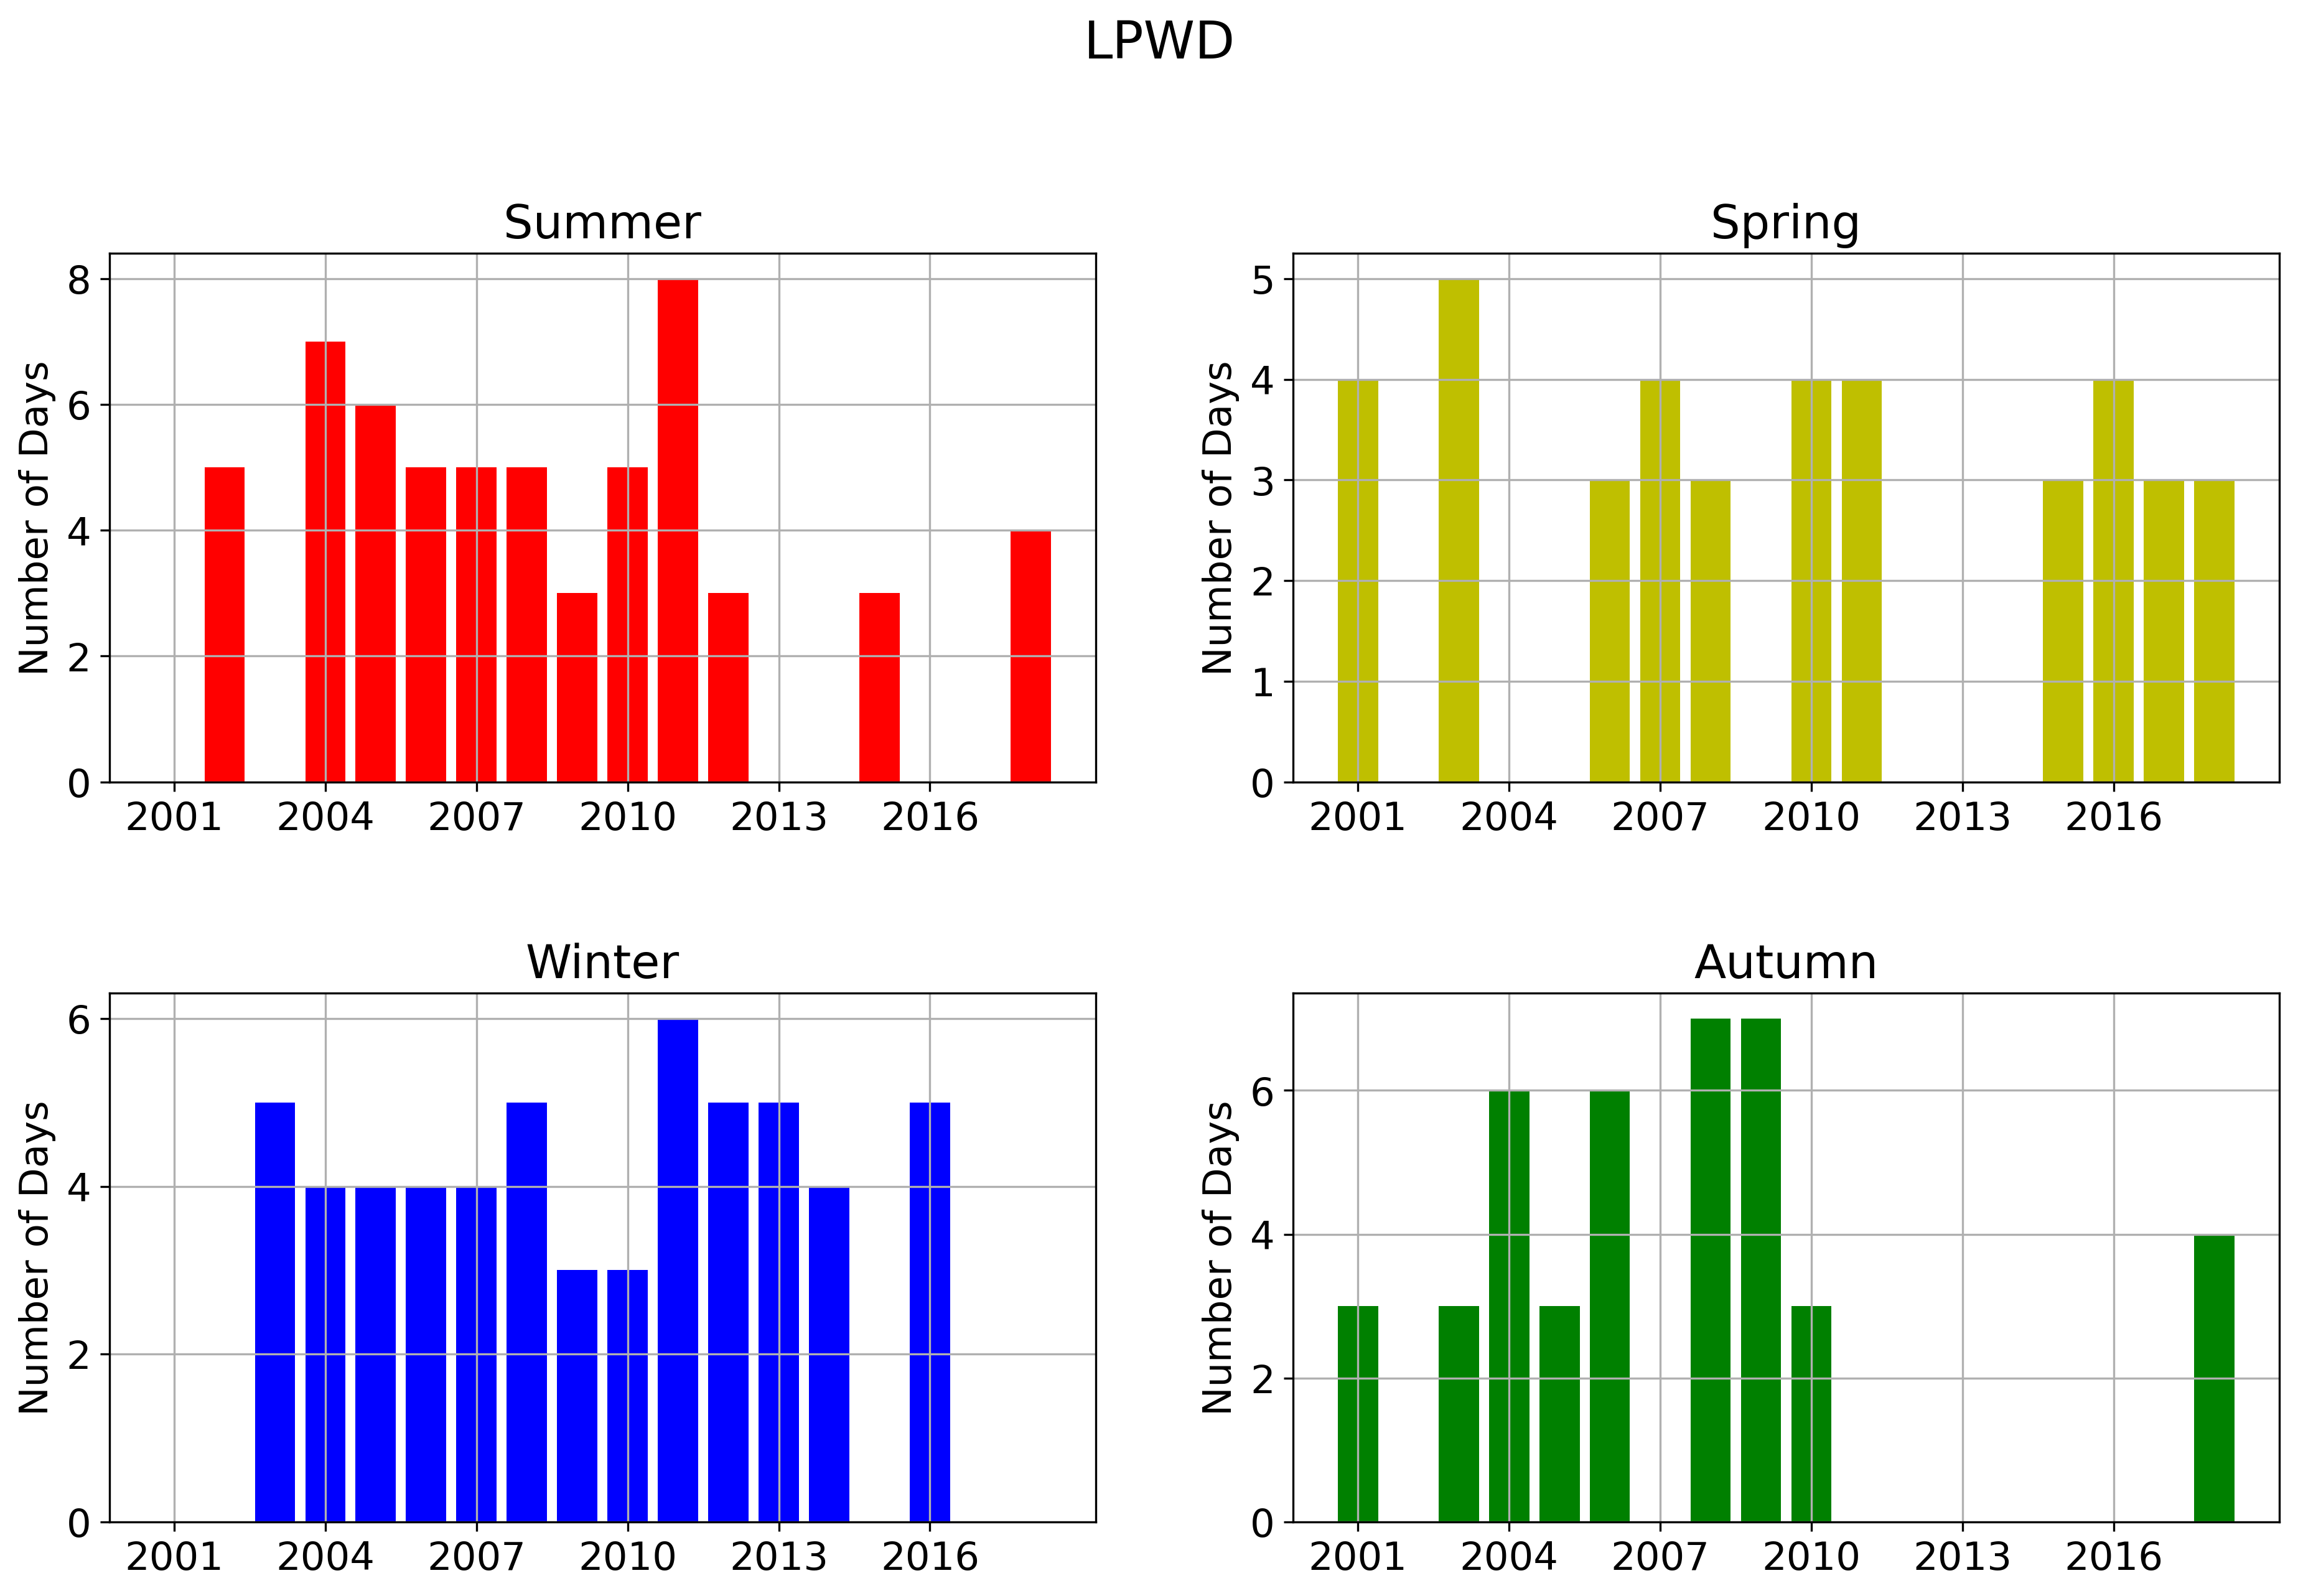

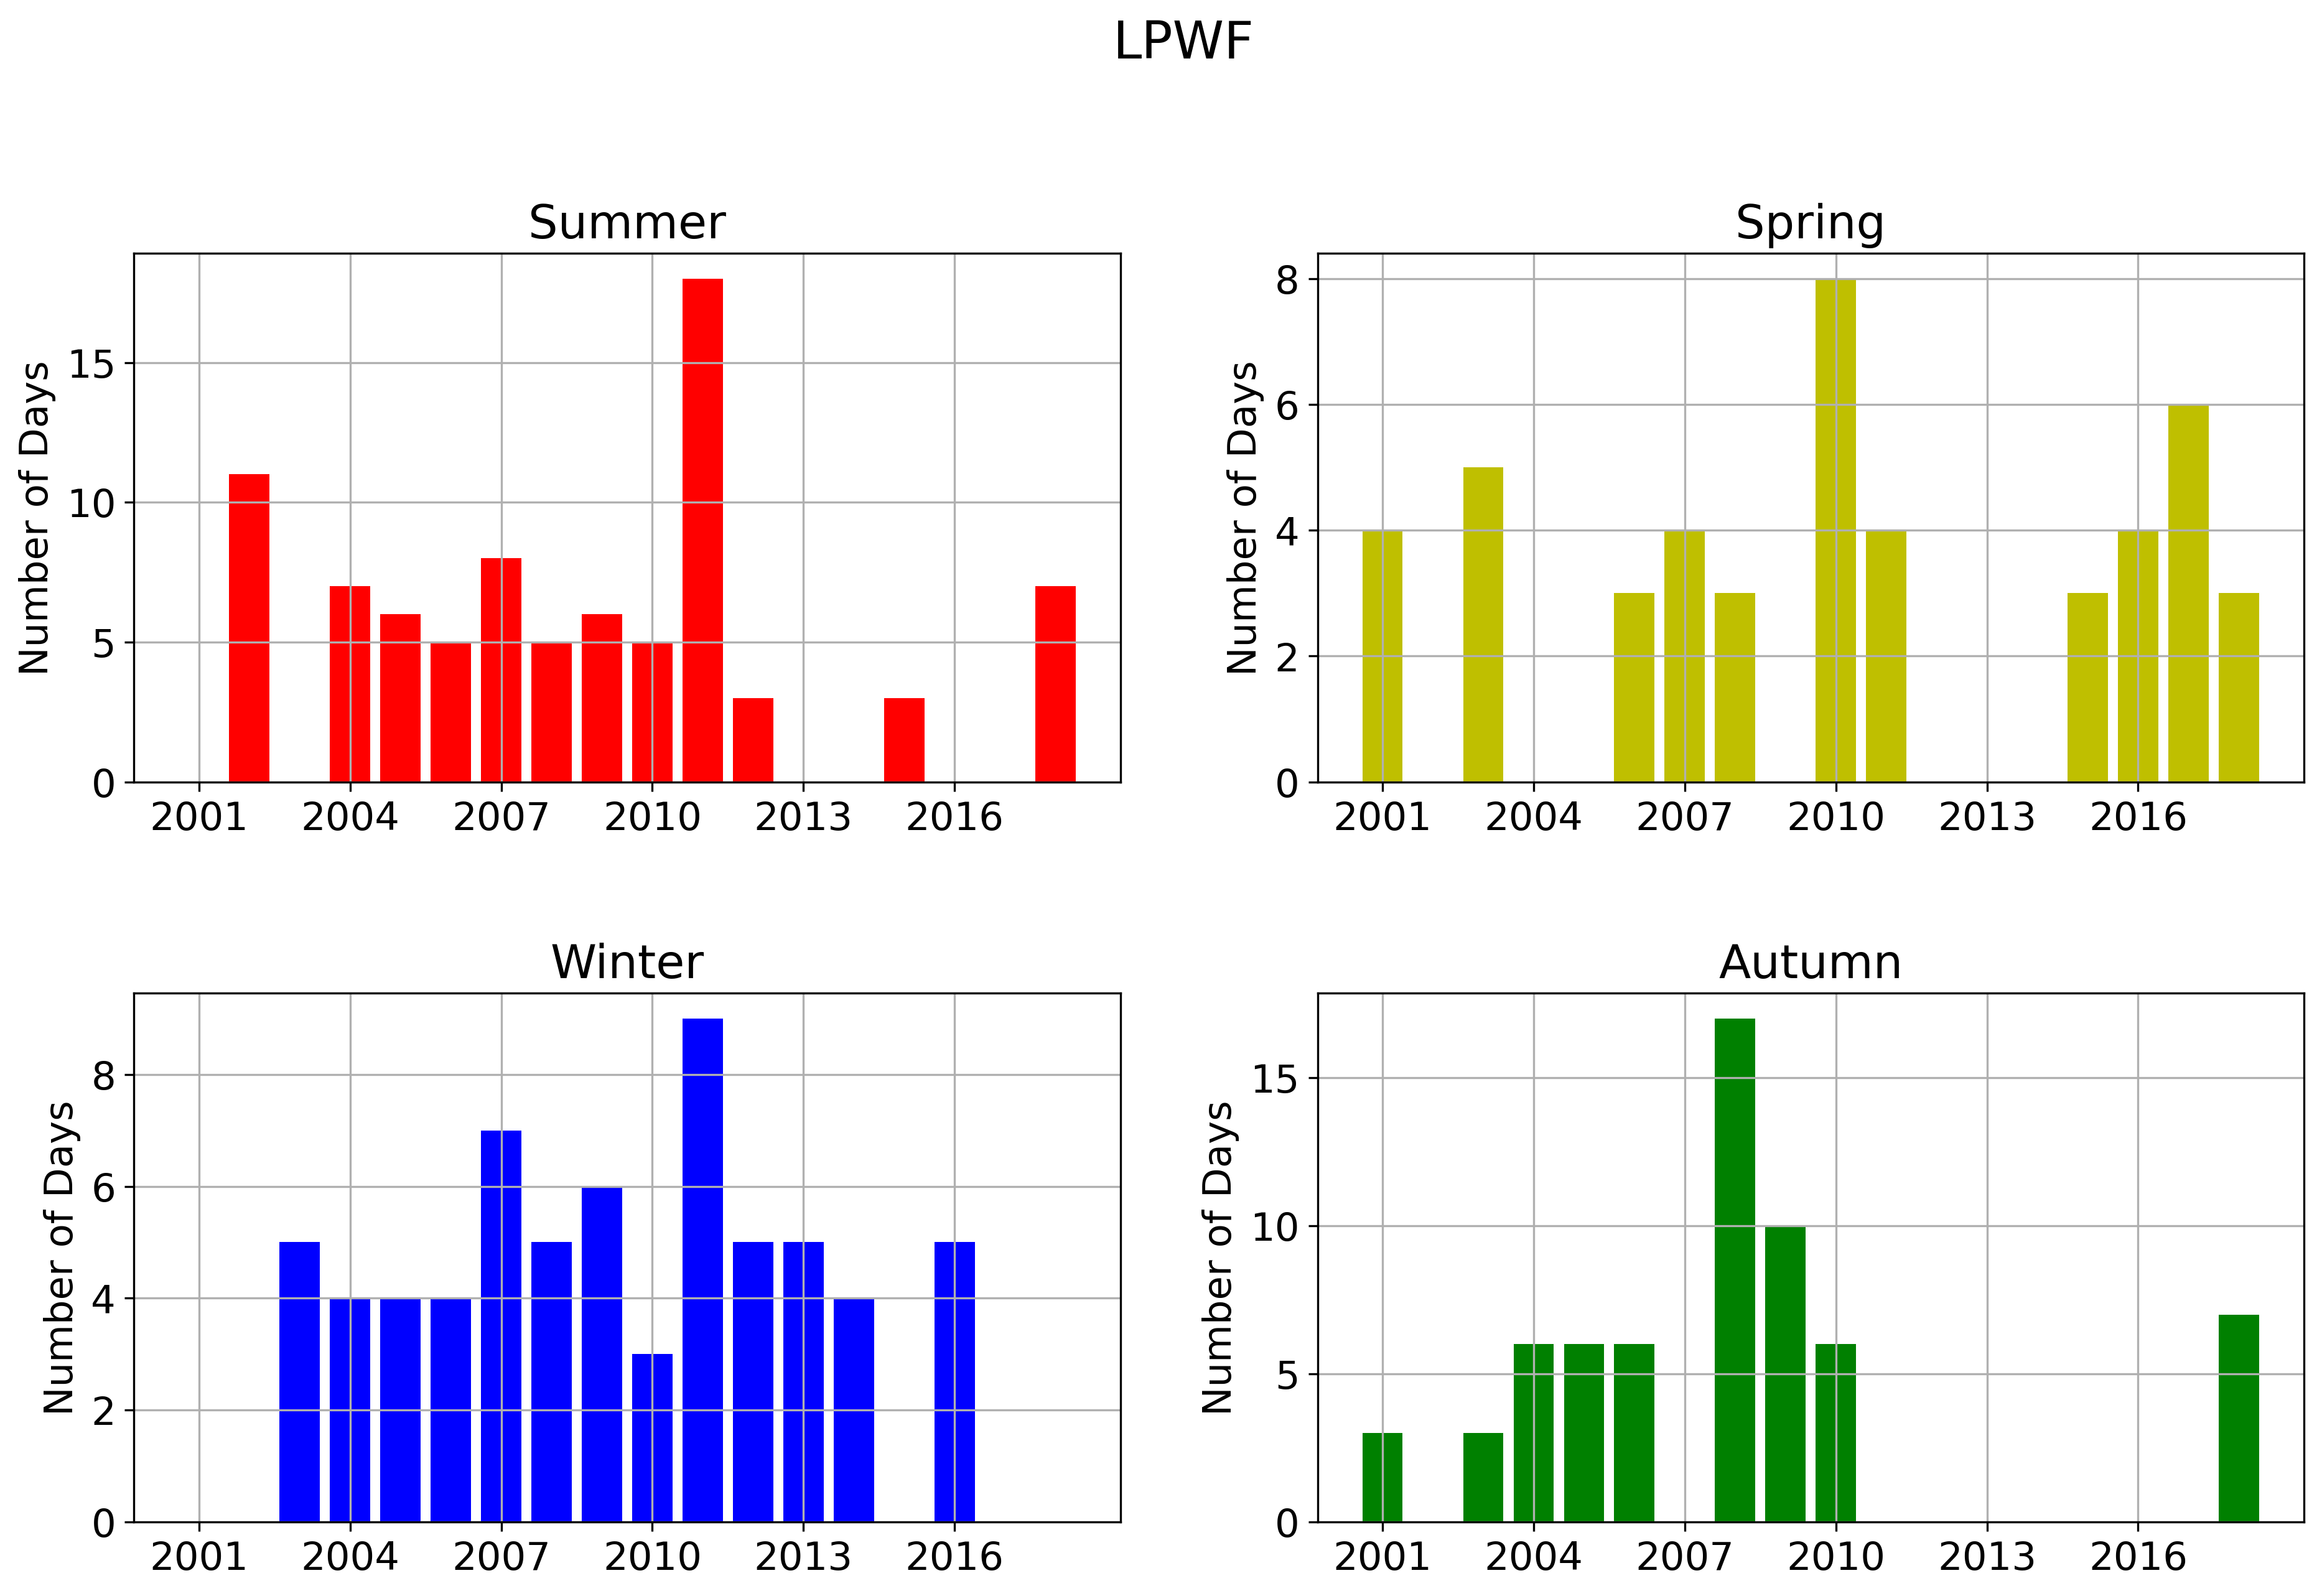

In [27]:
tex.wave_seasonMetrics(database_pressure,'LPW',plot=True)

### **High Pressure Wave**

In [28]:
help(tex.check_HighPressureWave)

Help on function check_HighPressureWave in module climatex:

check_HighPressureWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for High Pressure Waves on the database according to the Climatic Normal 
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for pressure waves. It obtains first a dataframe with the percentiles computed from
    ## the Climatic Normal according to the defined window size (df_pct). Then compares
    ## it with the database, to check if the maximum and minimum values of pressure are
    ## above the corresponding percentile. If they are above the threshold, the column
    ## 'above_pct' receives 1. This column is then used to identify if there are 3 or 

In [29]:
#get dataframe with columns 'above_pct' and 'HPW' indicating the occurence of a high pressure wave
#and the dataframe with the 90th percentile for pressure
database_pressure,df_pct = tex.check_HighPressureWave(database_pressure,'AVGPRESSURE','AVGPRESSURE',climatic_norm_pressure,'AVGPRESSURE','AVGPRESSURE')

,HPWN,HPWD,HPWF
YEAR,,,
2001,6.0,10.0,27.0
2002,3.0,5.0,12.0
2003,5.0,4.0,18.0
2004,7.0,8.0,35.0
2005,6.0,7.0,29.0
2006,2.0,4.0,7.0
2007,5.0,4.0,16.0
2008,3.0,3.0,9.0
2009,2.0,3.0,6.0


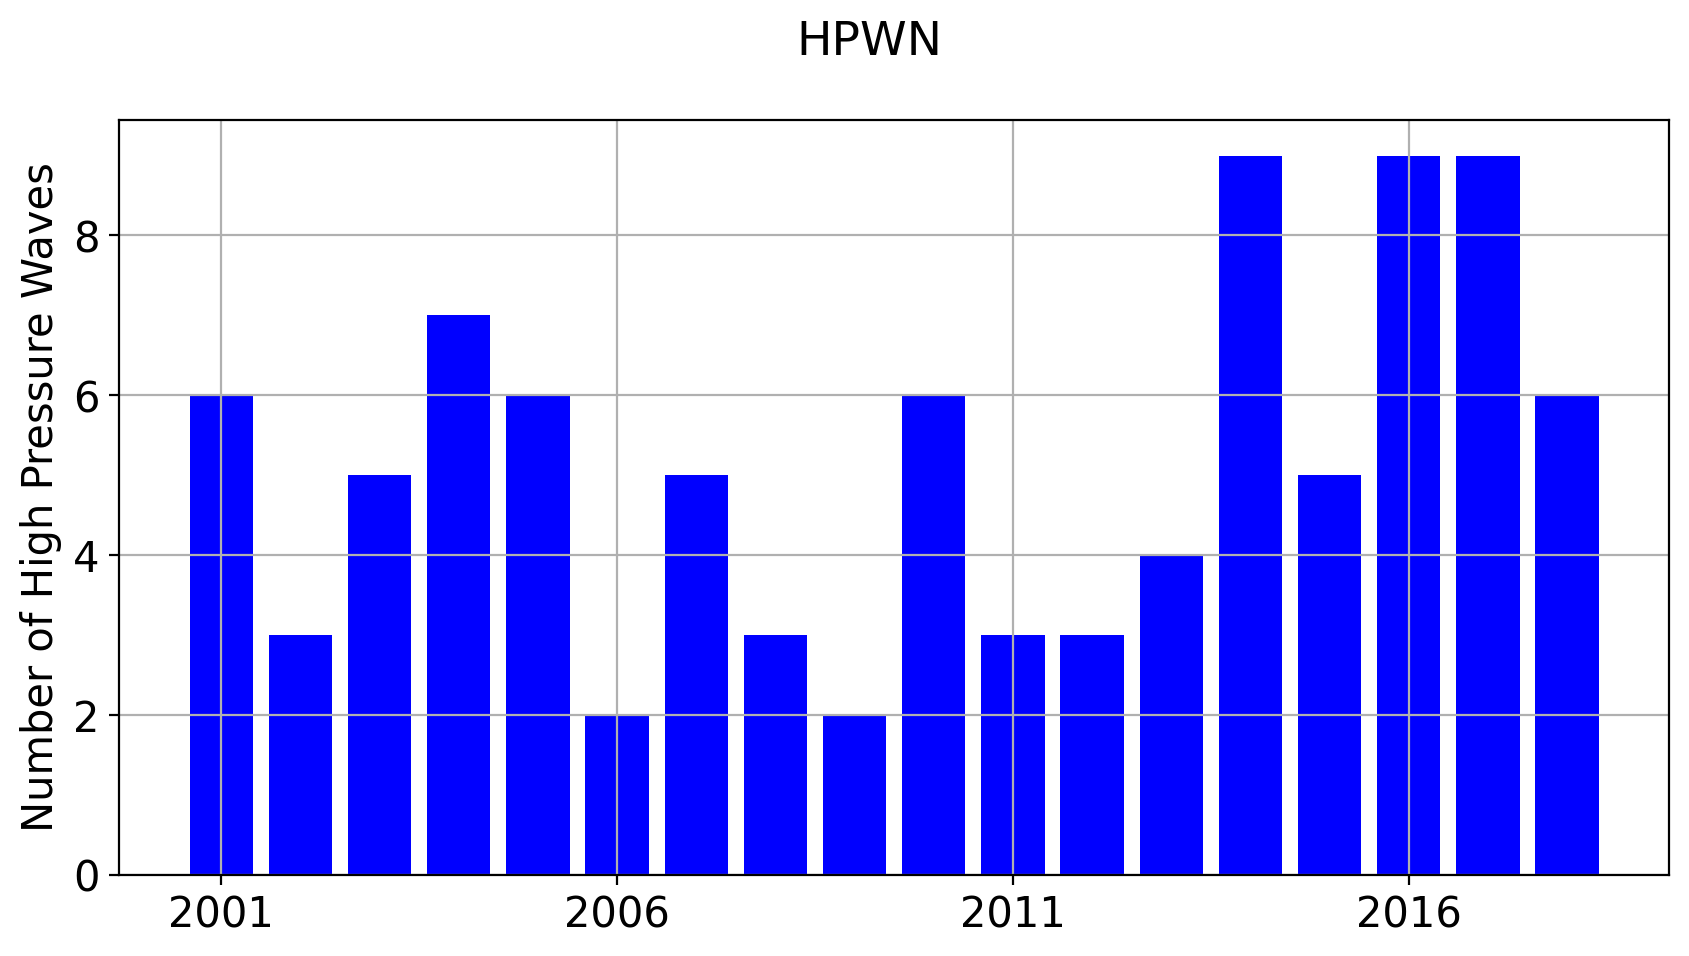

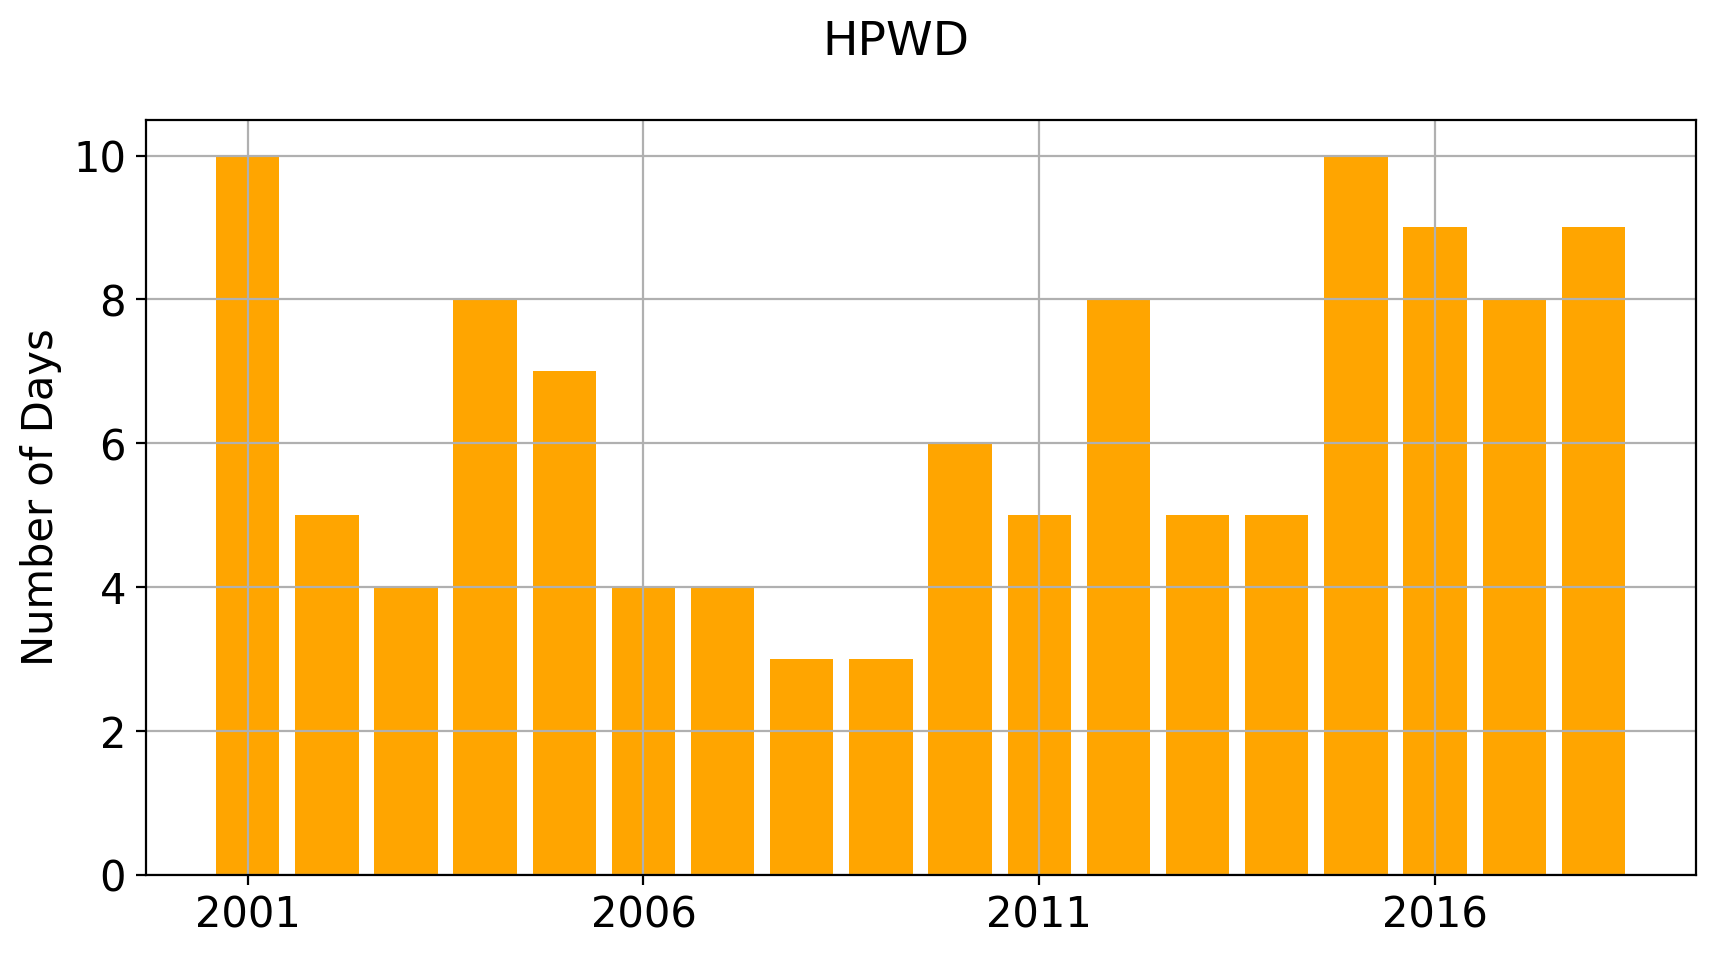

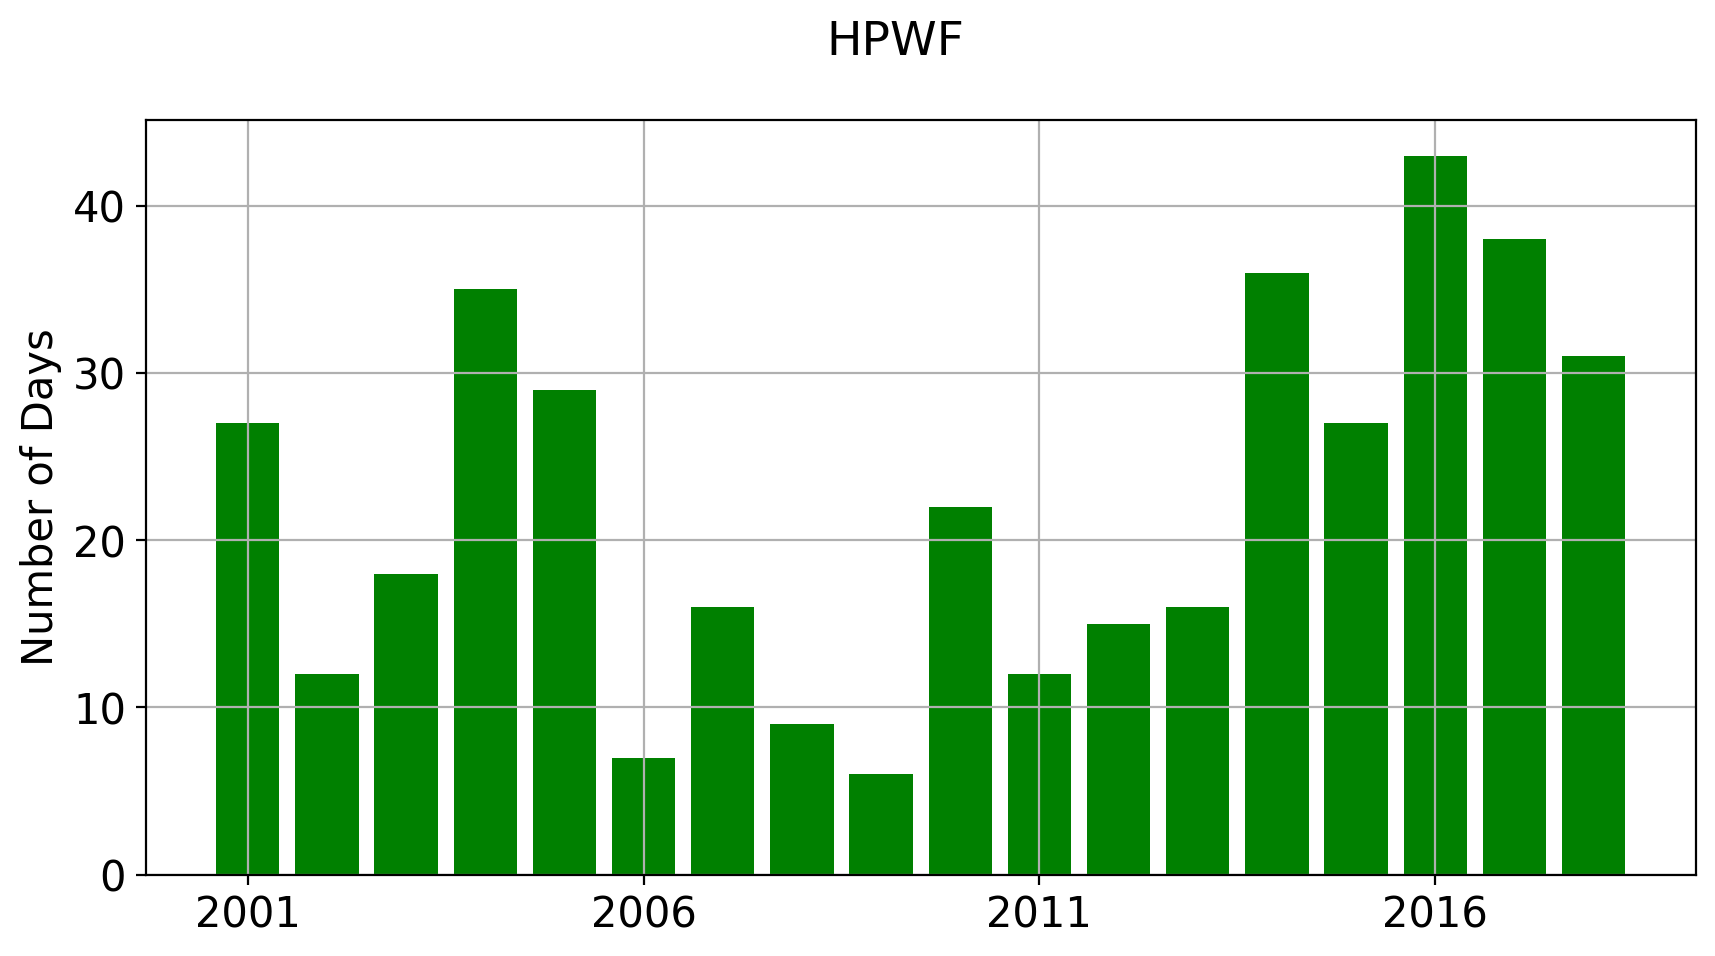

In [30]:
tex.wave_metrics(database_pressure,'HPW',True)

HPWN  HPWD  HPWF
YEAR SEASON                  
2001 1        1.0  10.0  10.0
     2        0.0   0.0   0.0
     3        3.0   4.0  11.0
     4        1.0   3.0   3.0
2002 1        2.0   4.0   7.0
...           ...   ...   ...
2017 4        1.0   3.0   3.0
2018 1        2.0   4.0   7.0
     2        2.0   8.0  11.0
     3        1.0   4.0   4.0
     4        0.0   0.0   0.0

[72 rows x 3 columns]

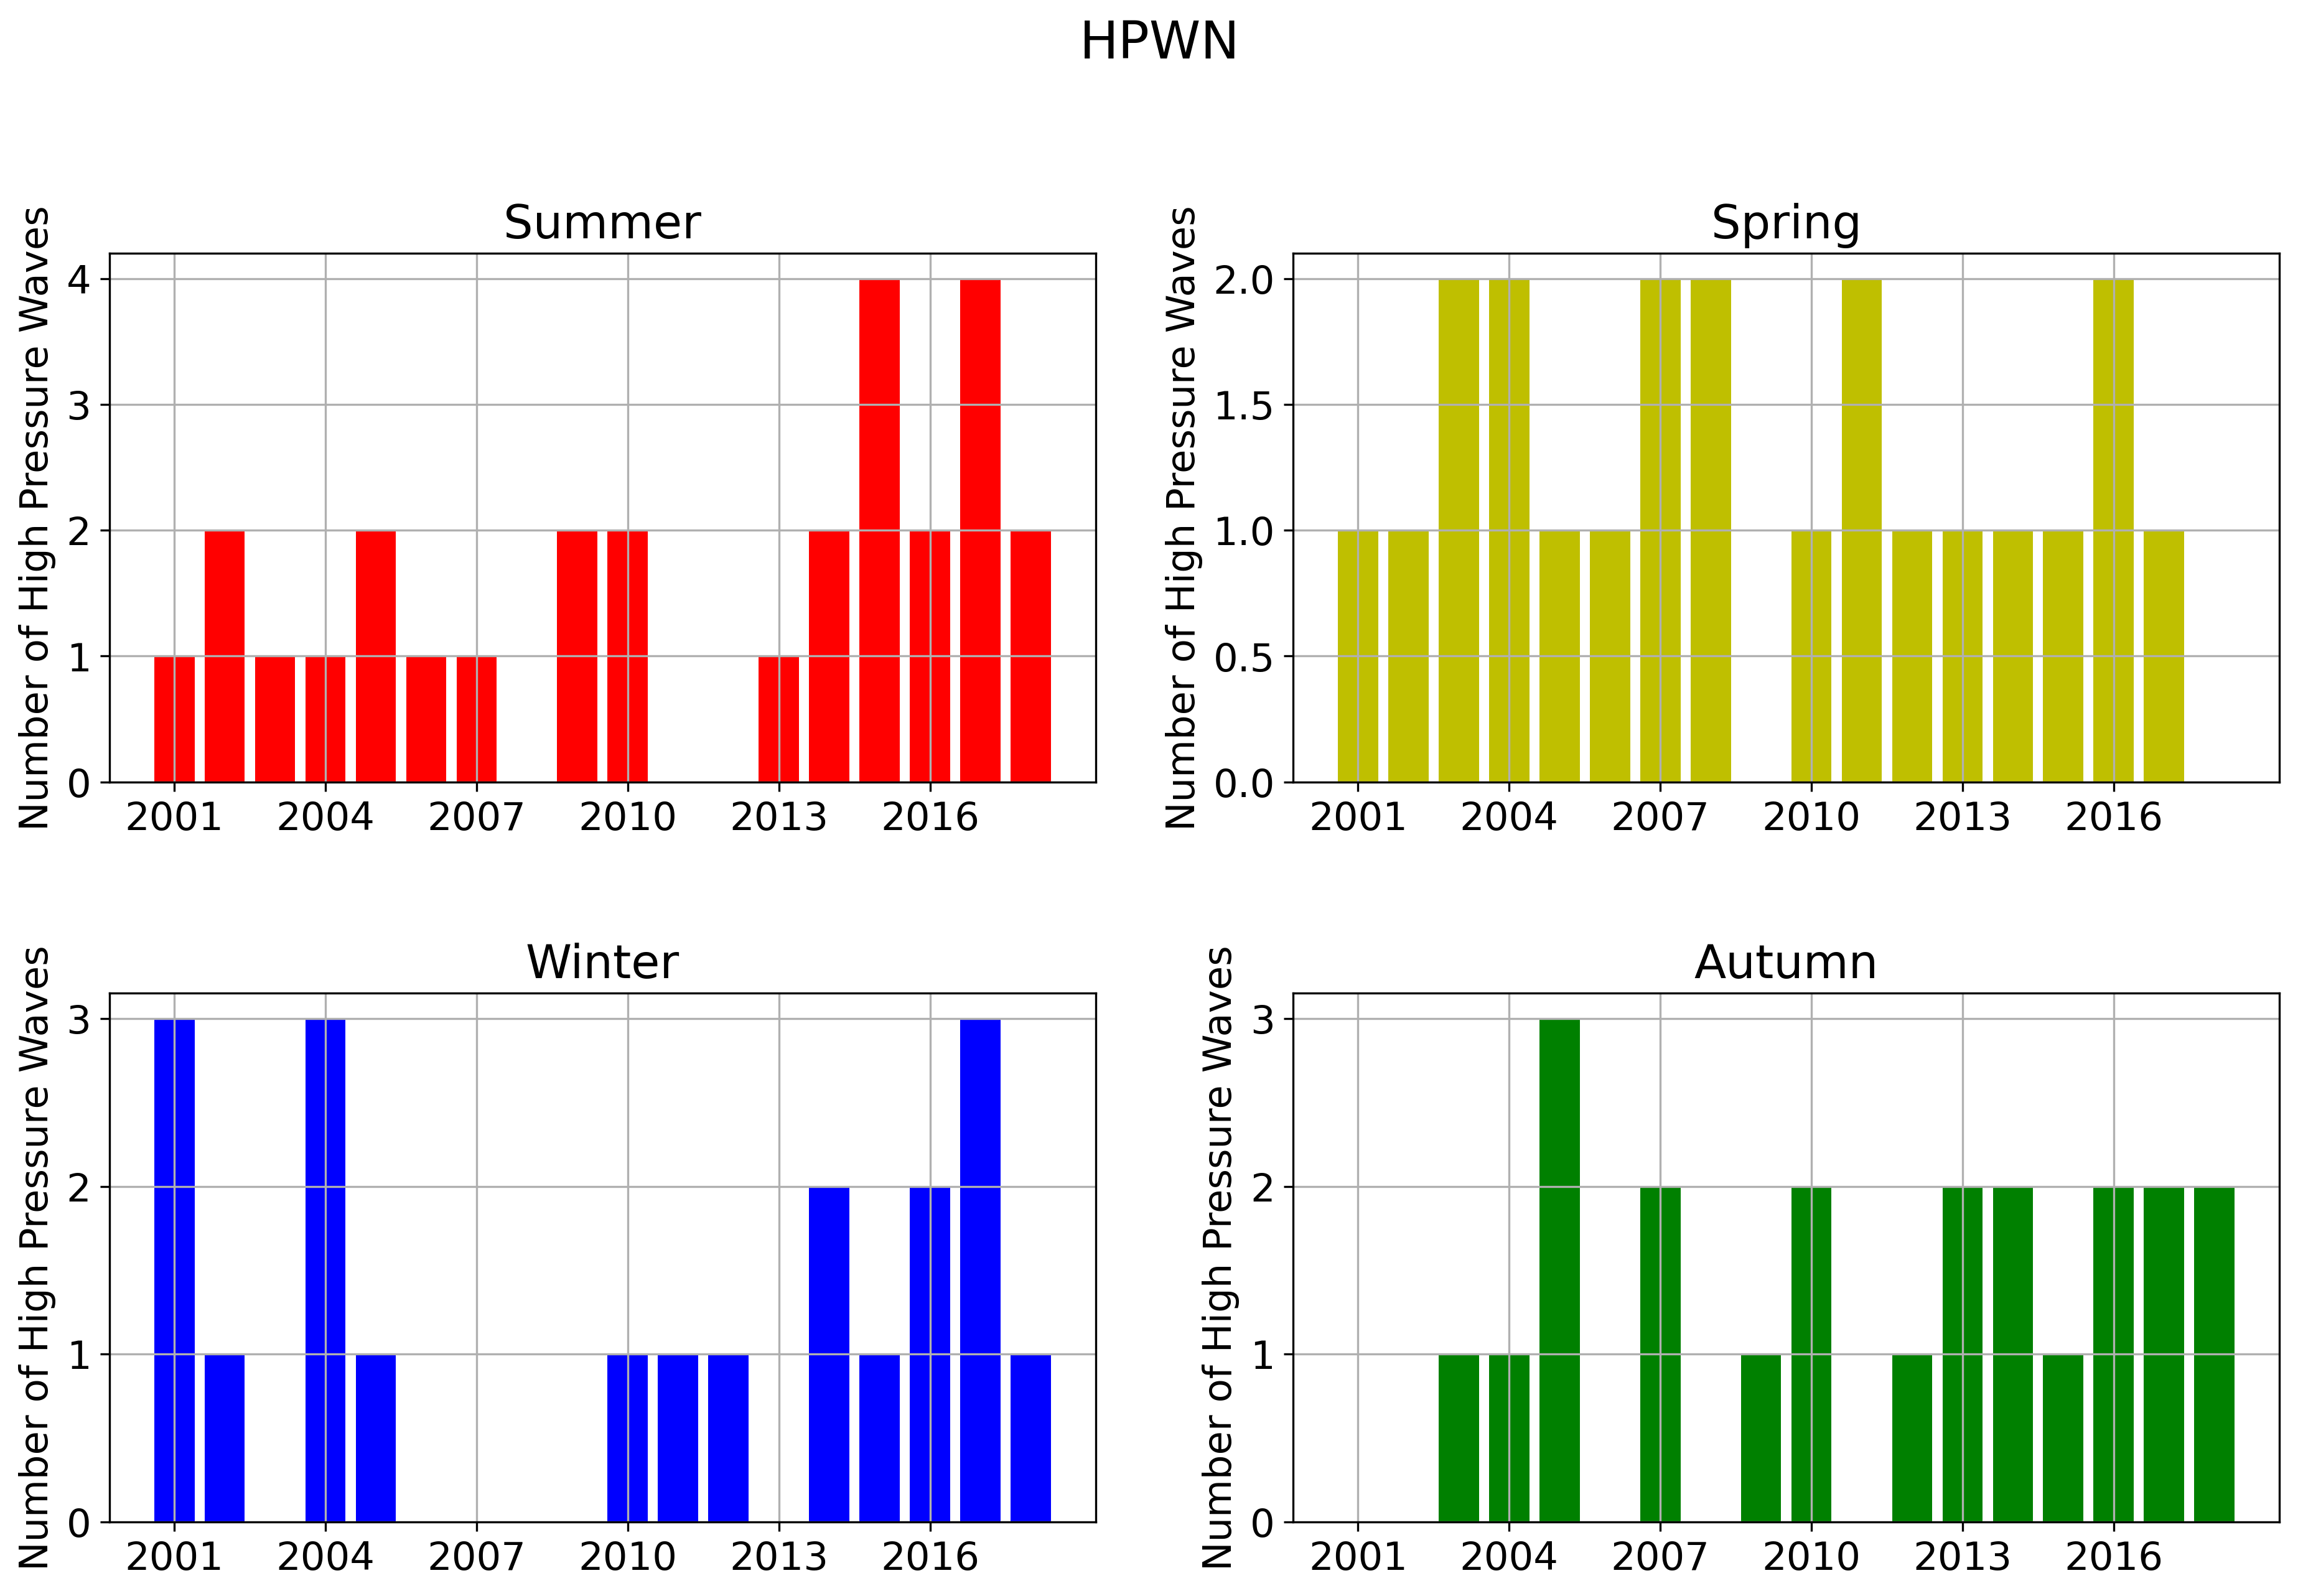

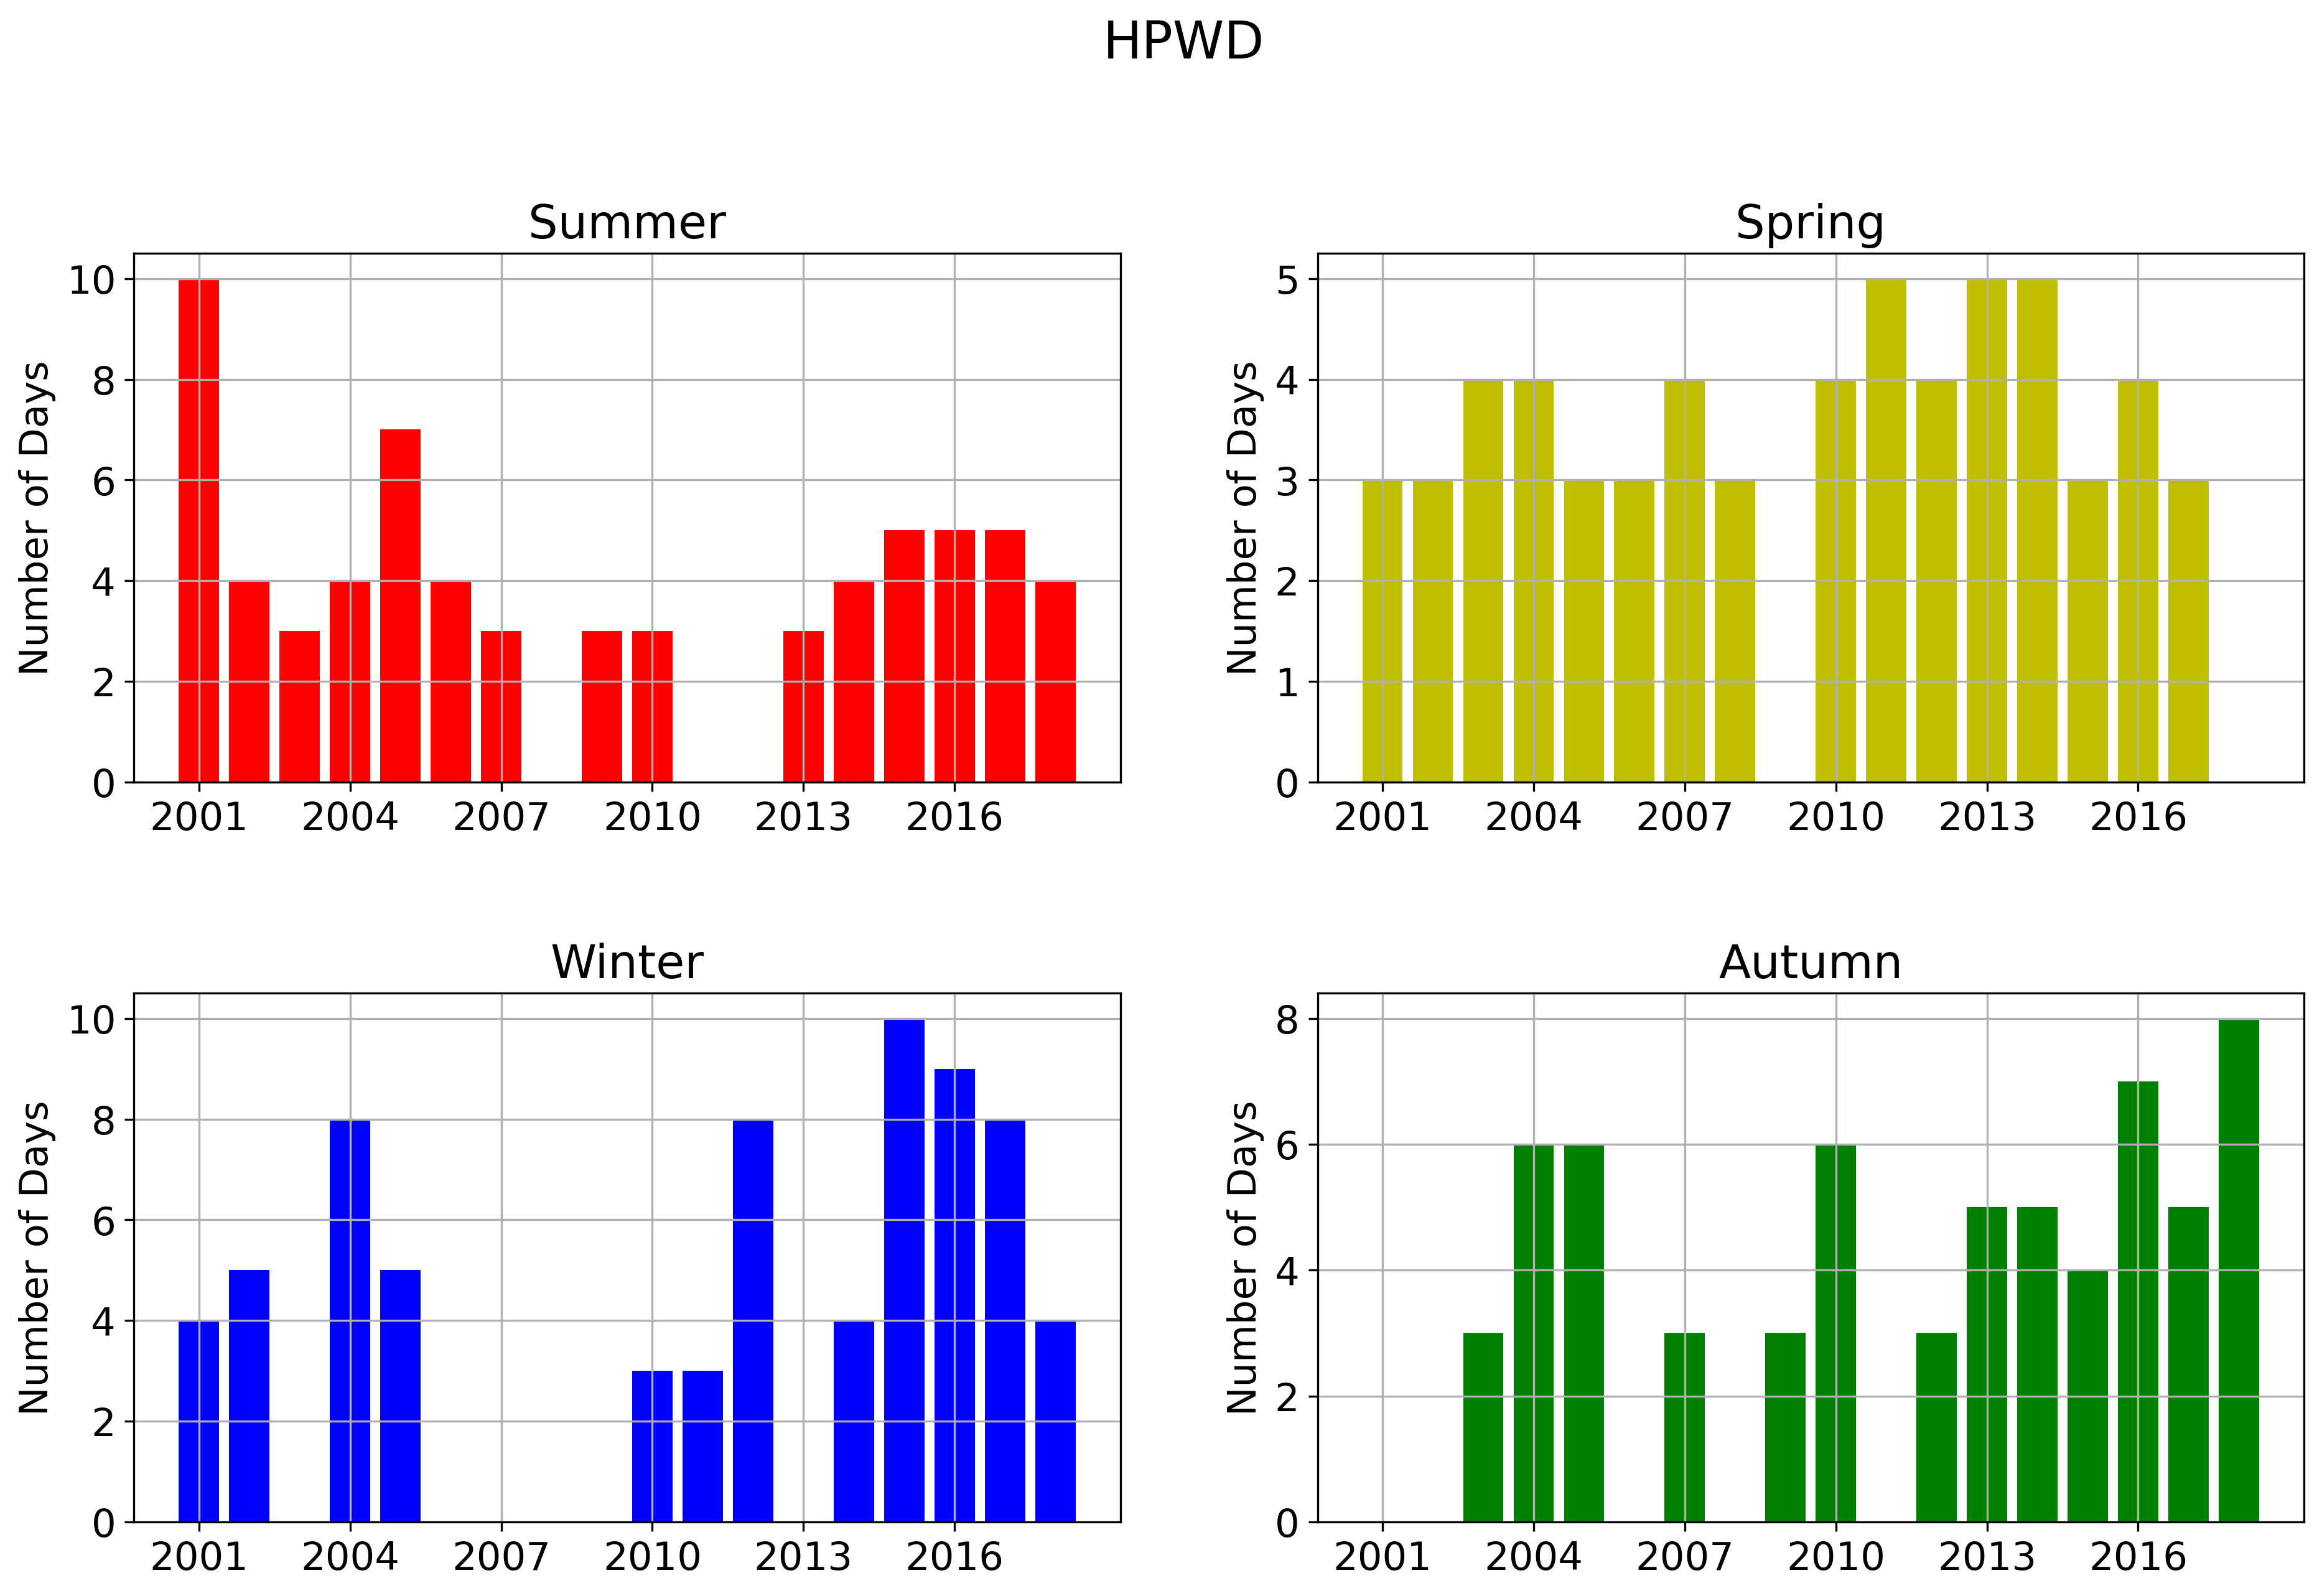

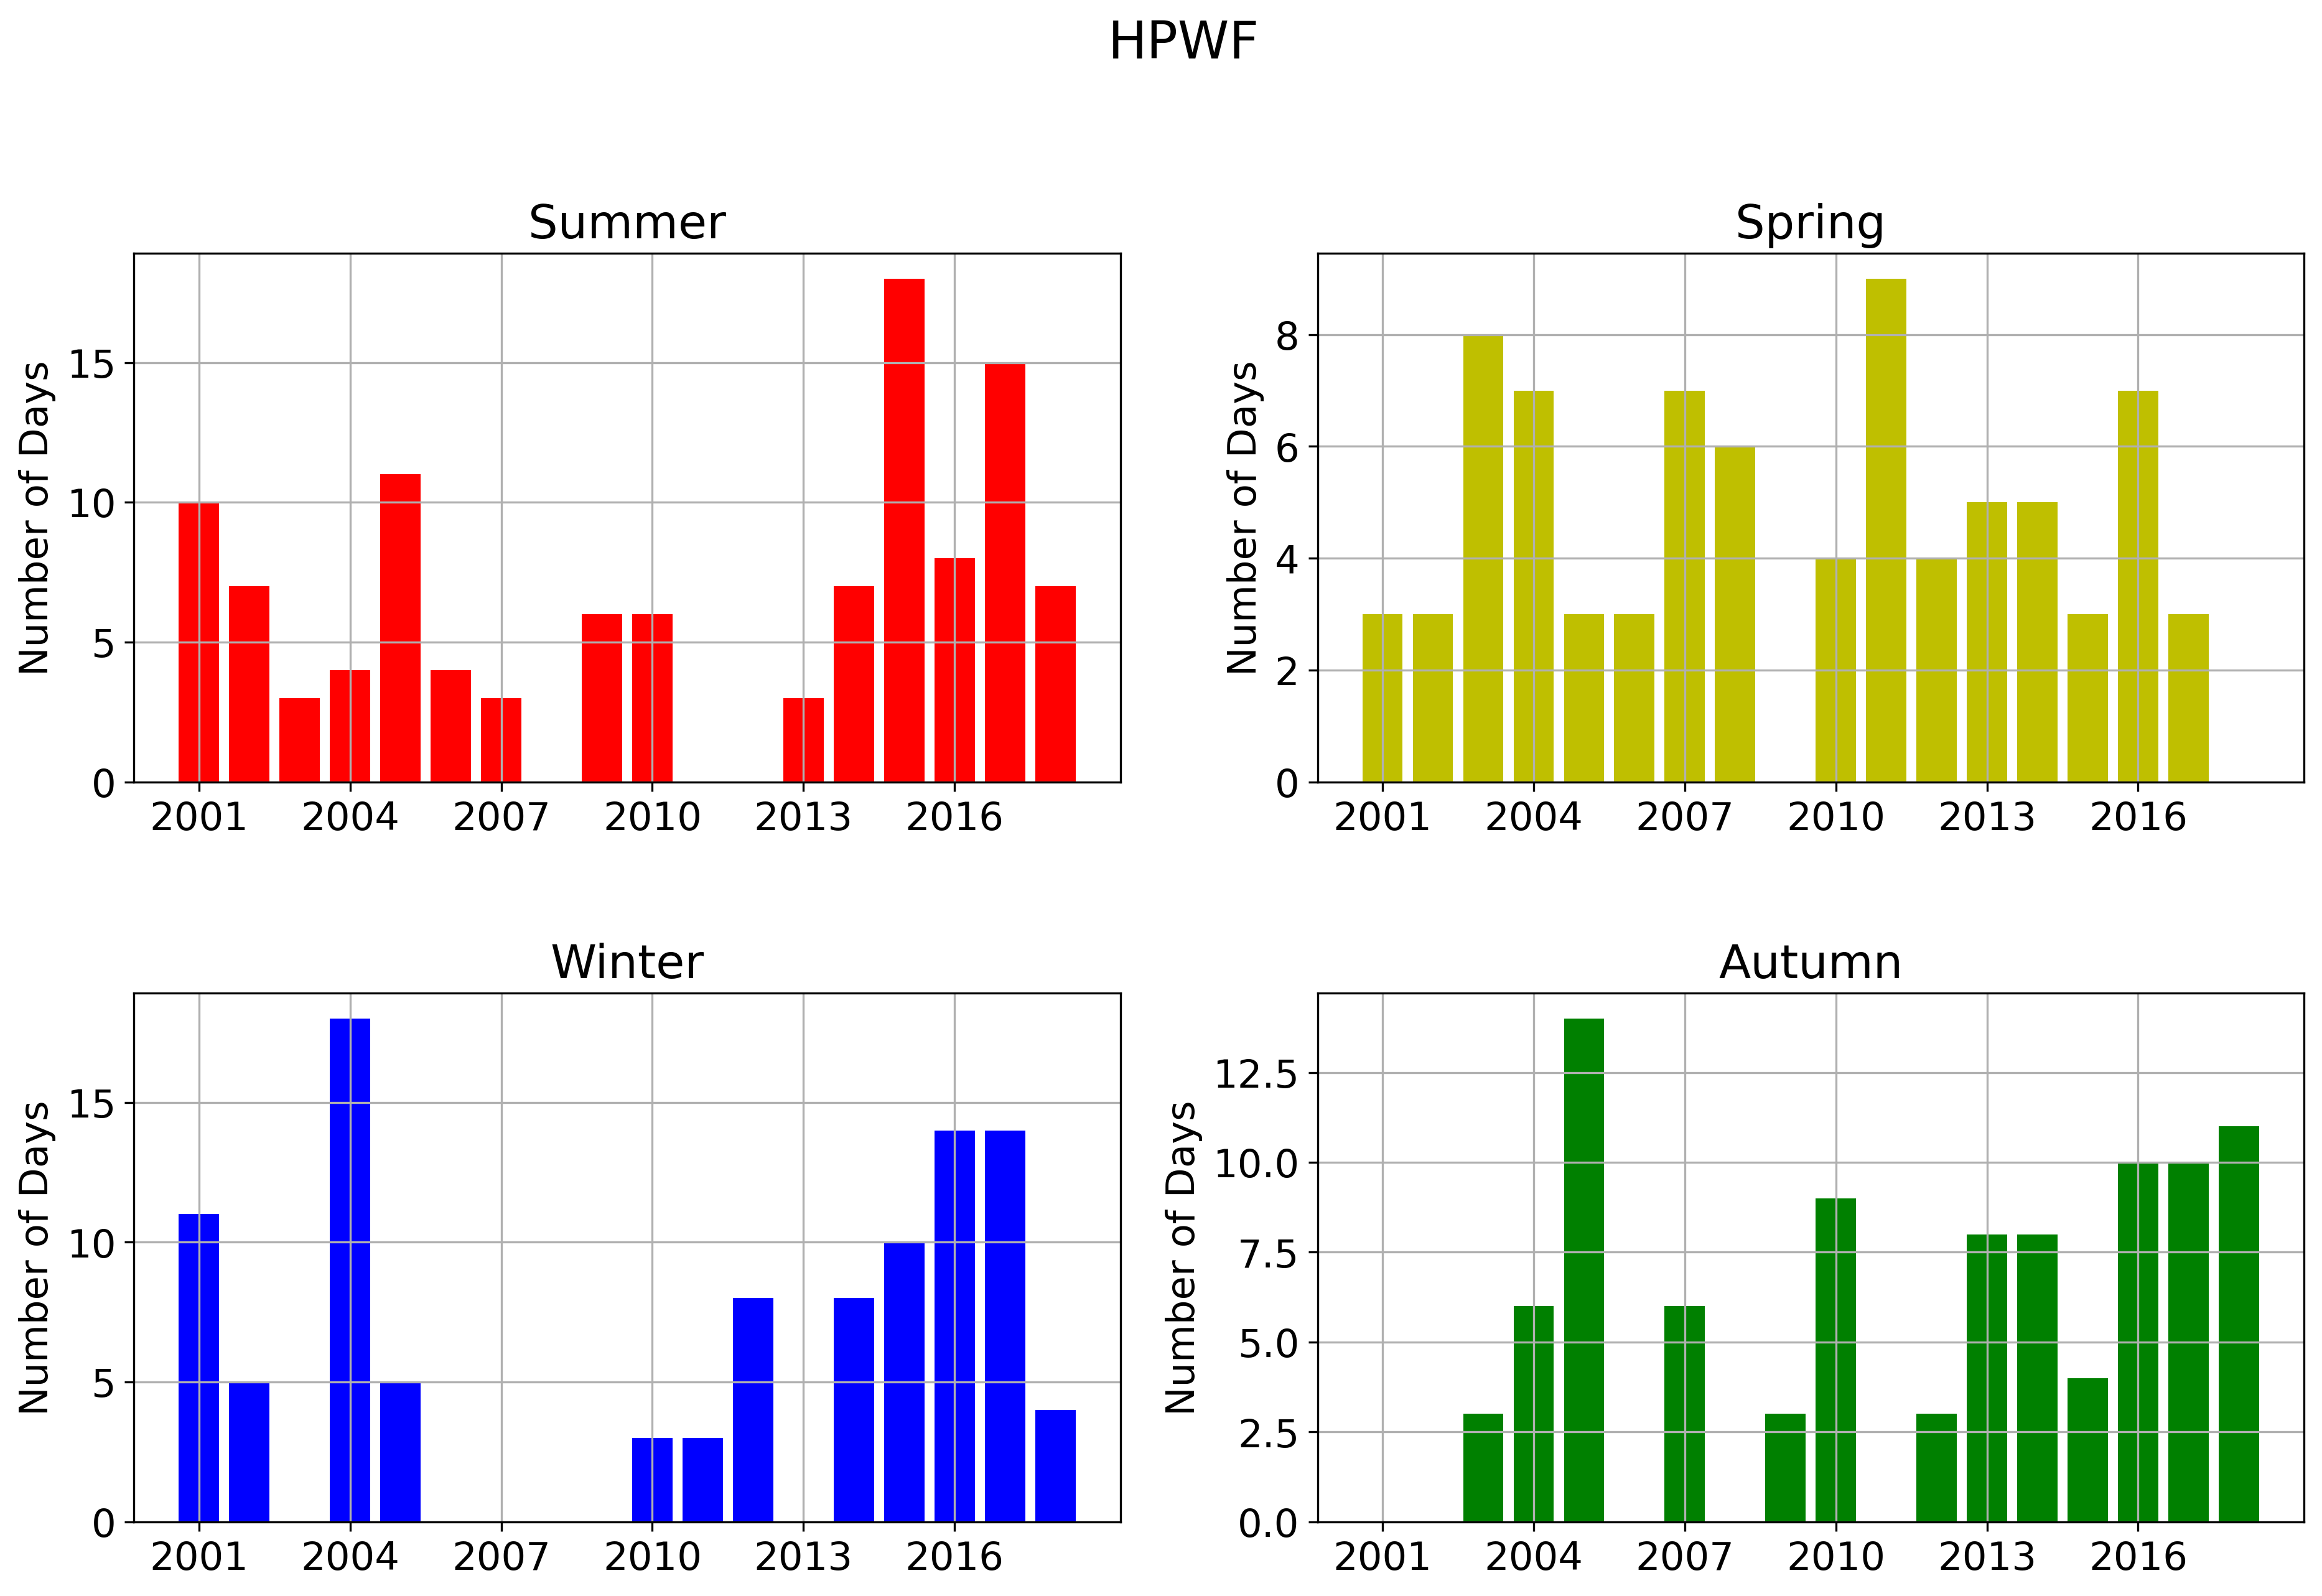

In [31]:
tex.wave_seasonMetrics(database_pressure,'HPW',True)

### **Extreme pressure difference between days**


In [32]:
help(tex.check_Pressure_difdays)

Help on function check_Pressure_difdays in module climatex:

check_Pressure_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of pressure according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## pressure (Dif_max) between two subsequent days and for the difference between minimum
    ## pressure (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Climatic Normal a

In [33]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum pressure difference
database_pressure, df_pct = tex.check_Pressure_difdays(database_pressure,'AVGPRESSURE','AVGPRESSURE',climatic_norm_pressure,'AVGPRESSURE','AVGPRESSURE')

,DND
YEAR,
2001,39
2002,31
2003,34
2004,40
2005,28
2006,26
2007,37
2008,35
2009,26


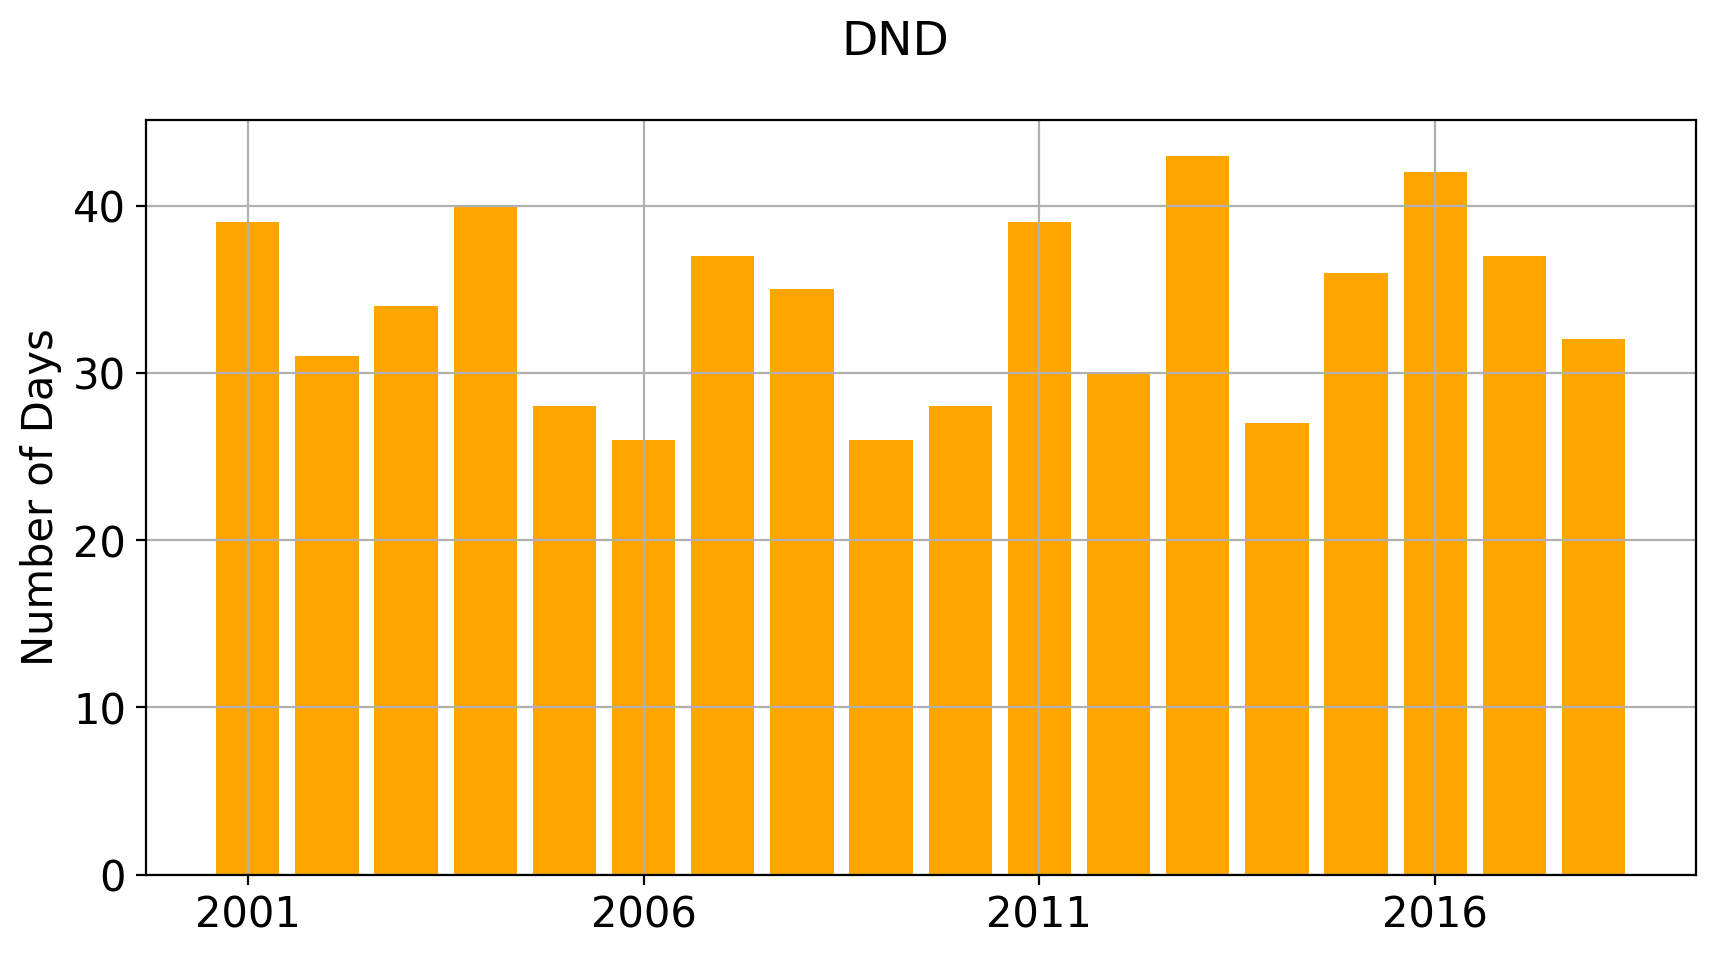

In [34]:
tex.dif_metrics(database_pressure,True)

RND
YEAR SEASON     
2001 1         6
     2        15
     3         8
     4        10
2002 1        14
...          ...
2017 4         8
2018 1        12
     2         3
     3         9
     4         8

[72 rows x 1 columns]

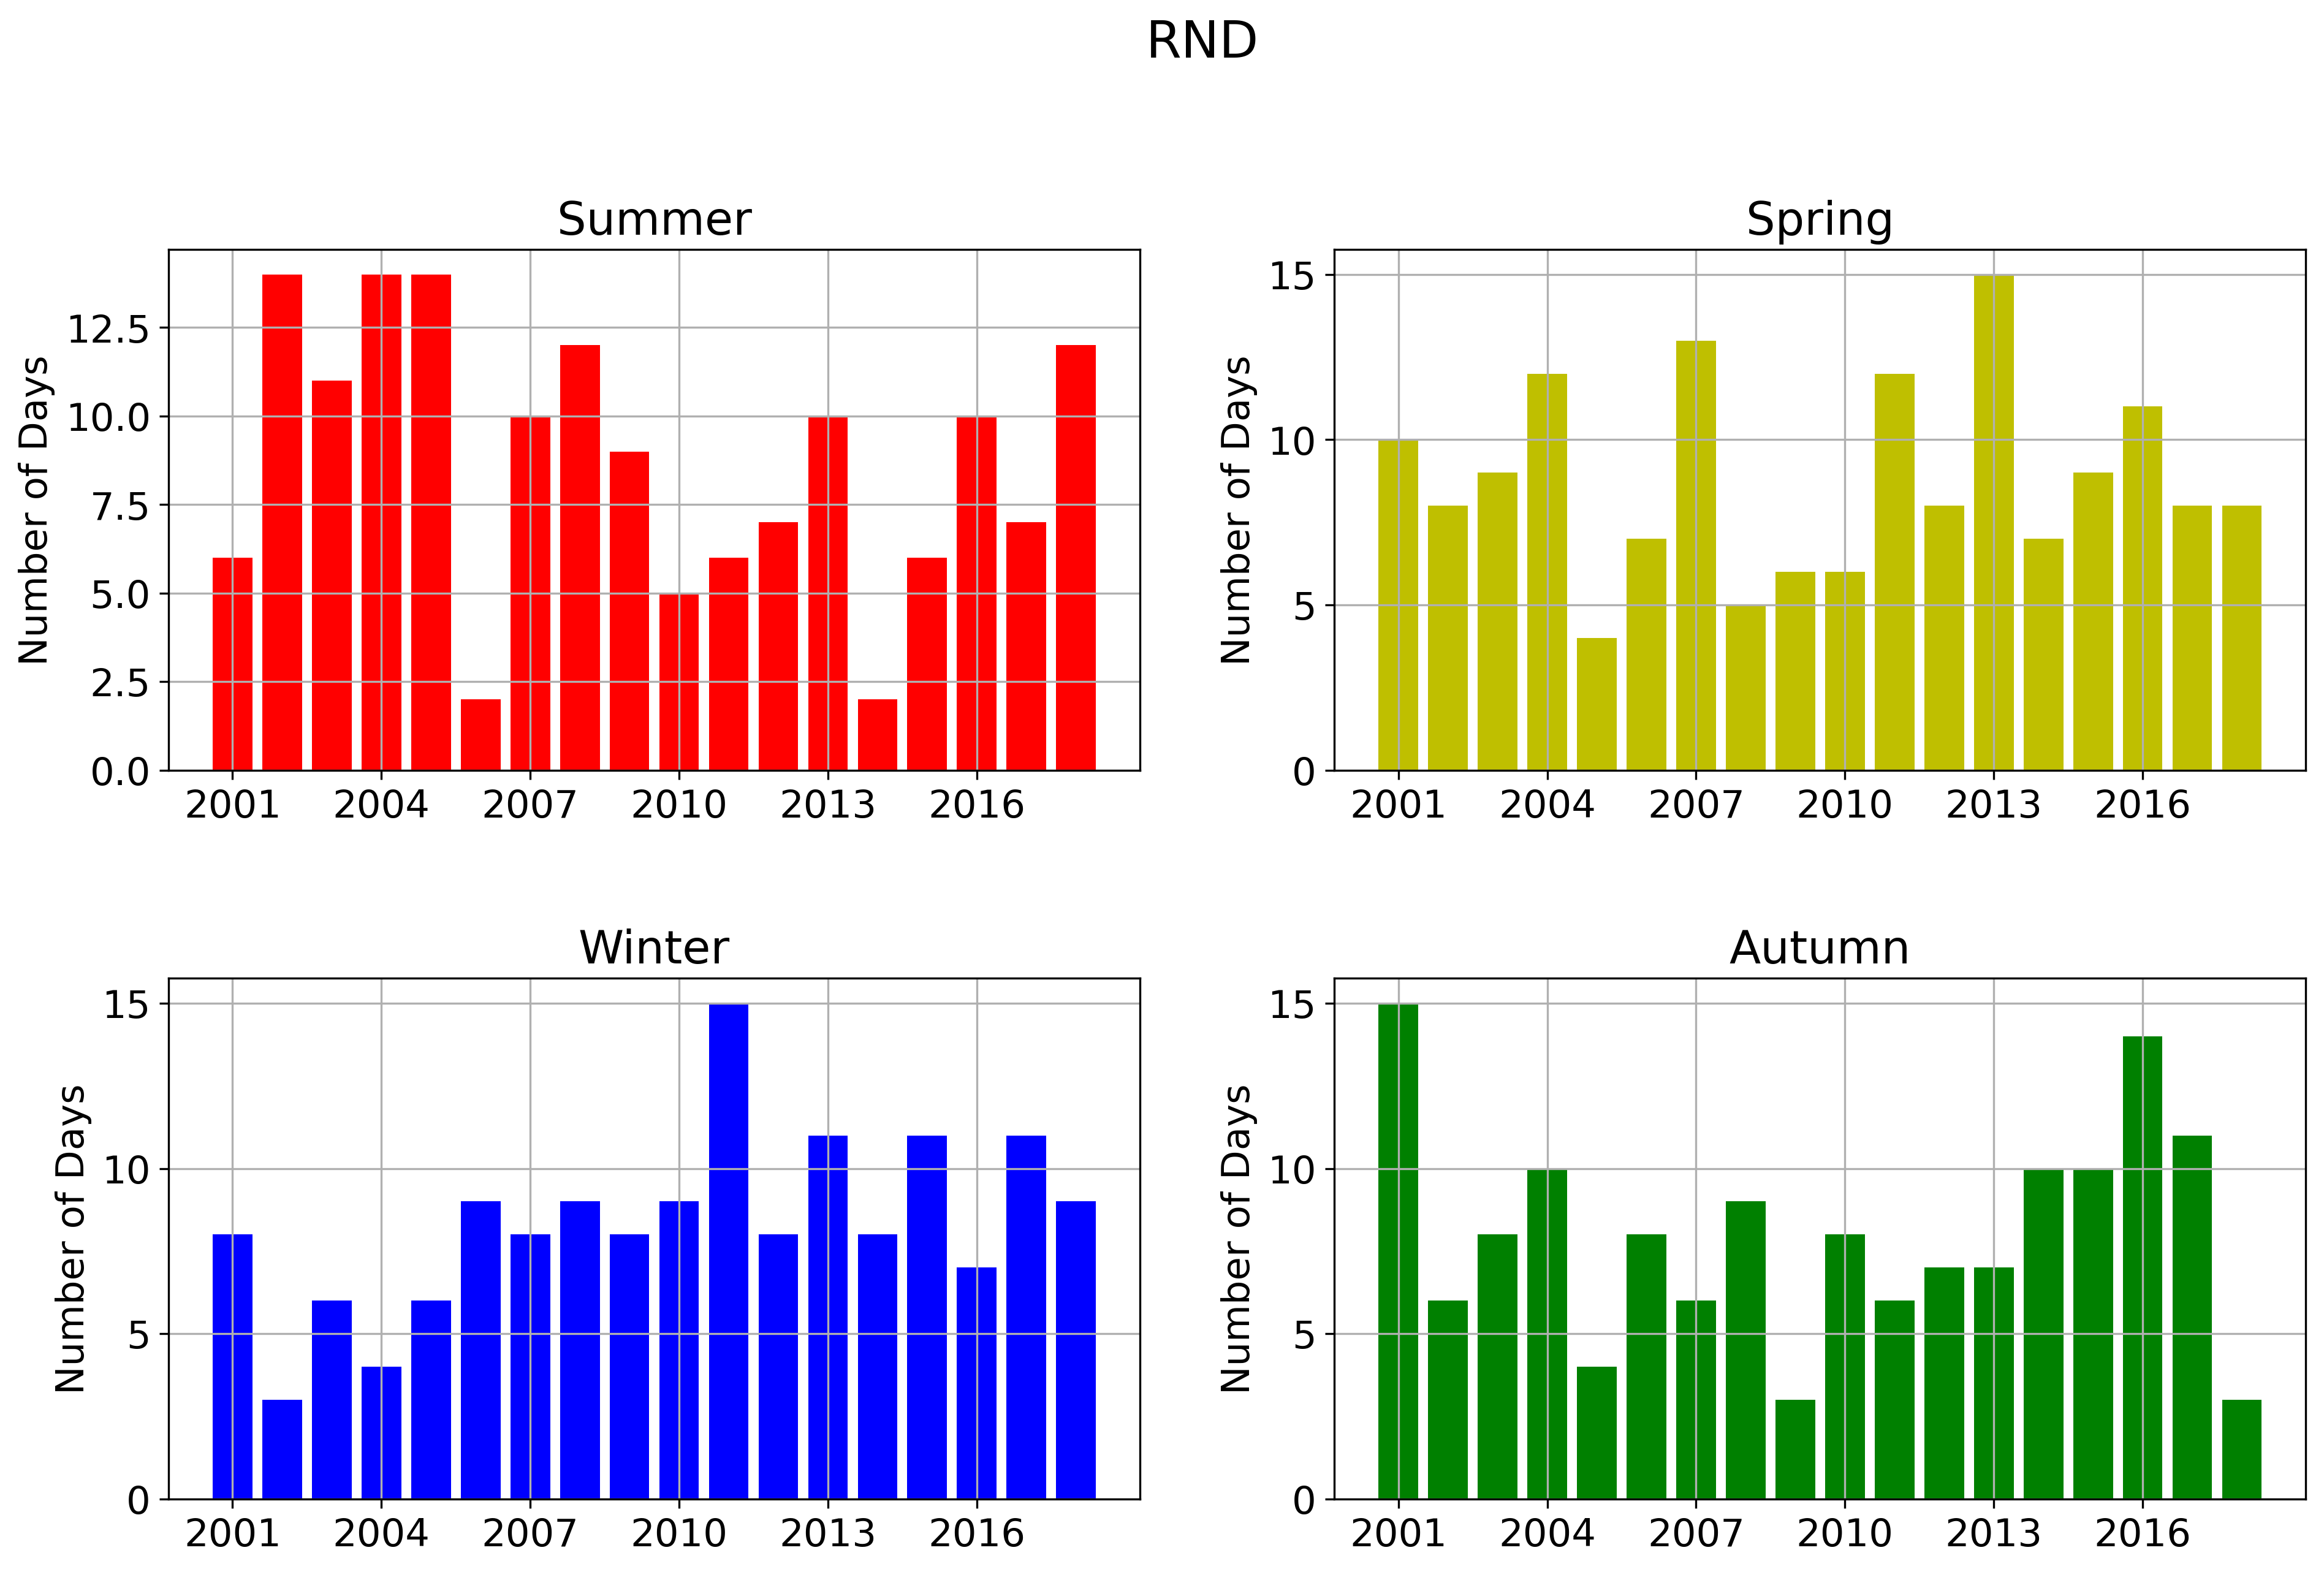

In [35]:
tex.dif_seasonMetrics(database_pressure,True)

### Save

In [36]:
database_pressure.to_csv('EV_pressure.csv')

## **Humidity**

Discard data from the first 5 months of 2017 due to an inconsistence in the data. 

In [37]:
#Load humidity dataframe
df_humidity = pd.read_csv('viracopos_humidity.csv')
df_humidity = df_humidity.drop(columns = {'Unnamed: 0'})
df_humidity['DATE'] = pd.to_datetime(df_humidity['DATE']) #to datetime
df_humidity['YEAR'] = df_humidity['DATE'].dt.strftime('%Y') #create column for year
df_humidity = df_humidity[(df_humidity['DATE']<='2016-12-31') | (df_humidity['DATE']>='2017-06-01')]

In [38]:
#define climatic normal for humidity
climatic_norm_humidity = df_humidity[(df_humidity['YEAR']>='1983') & (df_humidity['YEAR']<='2018')]
#define database for humidity
database_humidity = df_humidity[df_humidity['YEAR']>='2001']

### **Low humidity waves**



In [39]:
help(tex.check_LowHumidityWave)

Help on function check_LowHumidityWave in module climatex:

check_LowHumidityWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Low Humidity Waves on the database according to the Climatic Normal
    ##
    ## ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for humidity waves. It obtains first a dataframe with the percentiles 
    ## computed from the Climatic Normal according to the defined window size (df_pct).
    ## Then compares it with the database, to check if the maximum and minimum values
    ## of humidity are below the corresponding percentile. If they are below the threshold,
    ## the column 'below_pct' receives 1. This column is then used to identify if there
    ## ar

In [40]:
#get dataframe with columns 'below_pct' and 'LHW' indicating the occurence of a low humidity wave
#and the dataframe with the 10th percentile for maximum and minimum humidity
database_humidity,df_pct = tex.check_LowHumidityWave(database_humidity,'HMAX','HMIN',climatic_norm_humidity,'HMAX','HMIN')

,LHWN,LHWD,LHWF
YEAR,,,
2001,0.0,0.0,0.0
2002,1.0,4.0,4.0
2003,2.0,4.0,7.0
2004,0.0,0.0,0.0
2005,1.0,3.0,3.0
2006,1.0,7.0,7.0
2007,1.0,3.0,3.0
2008,0.0,0.0,0.0
2009,0.0,0.0,0.0


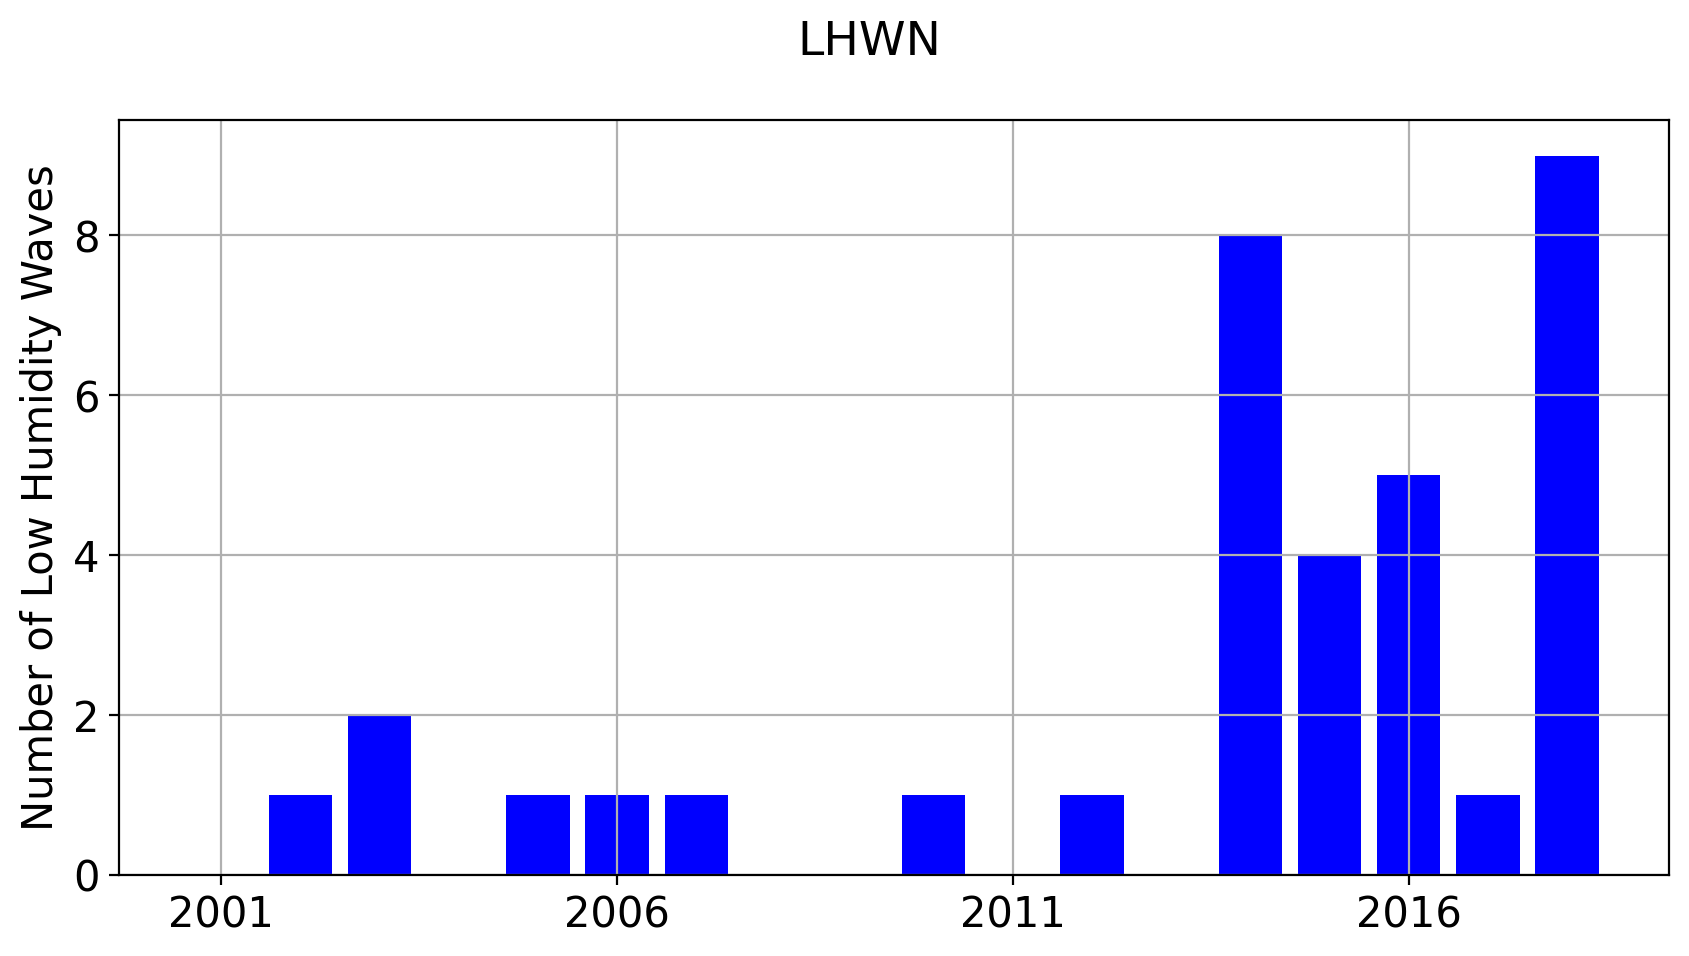

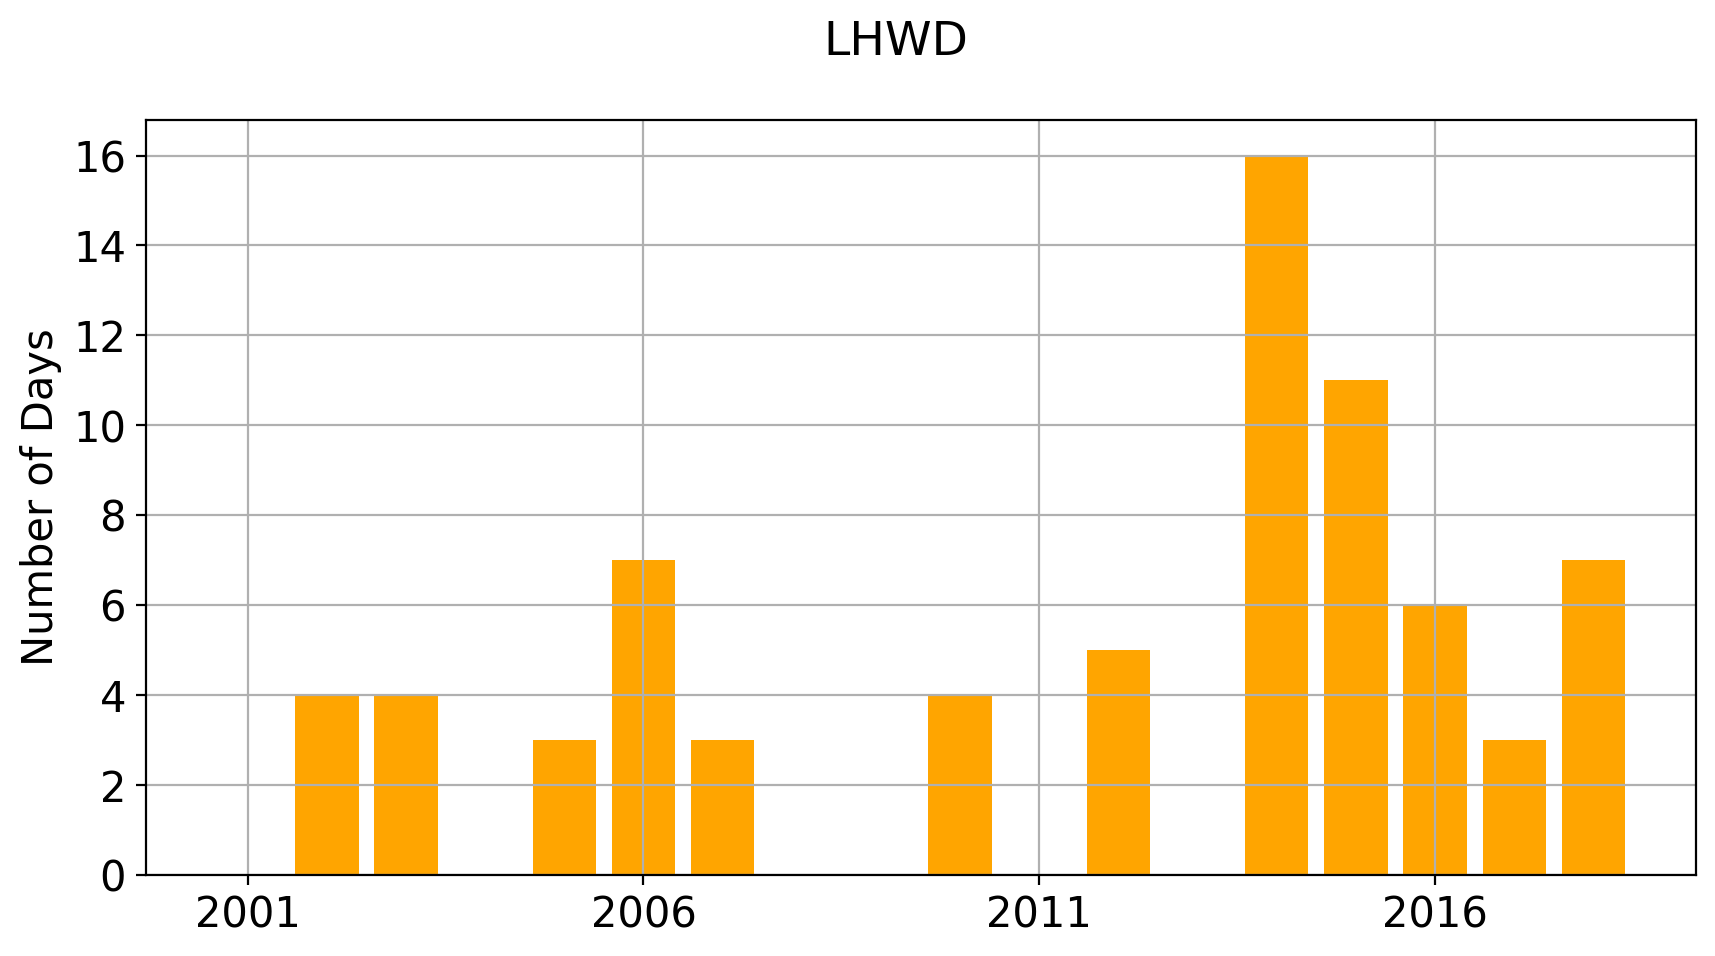

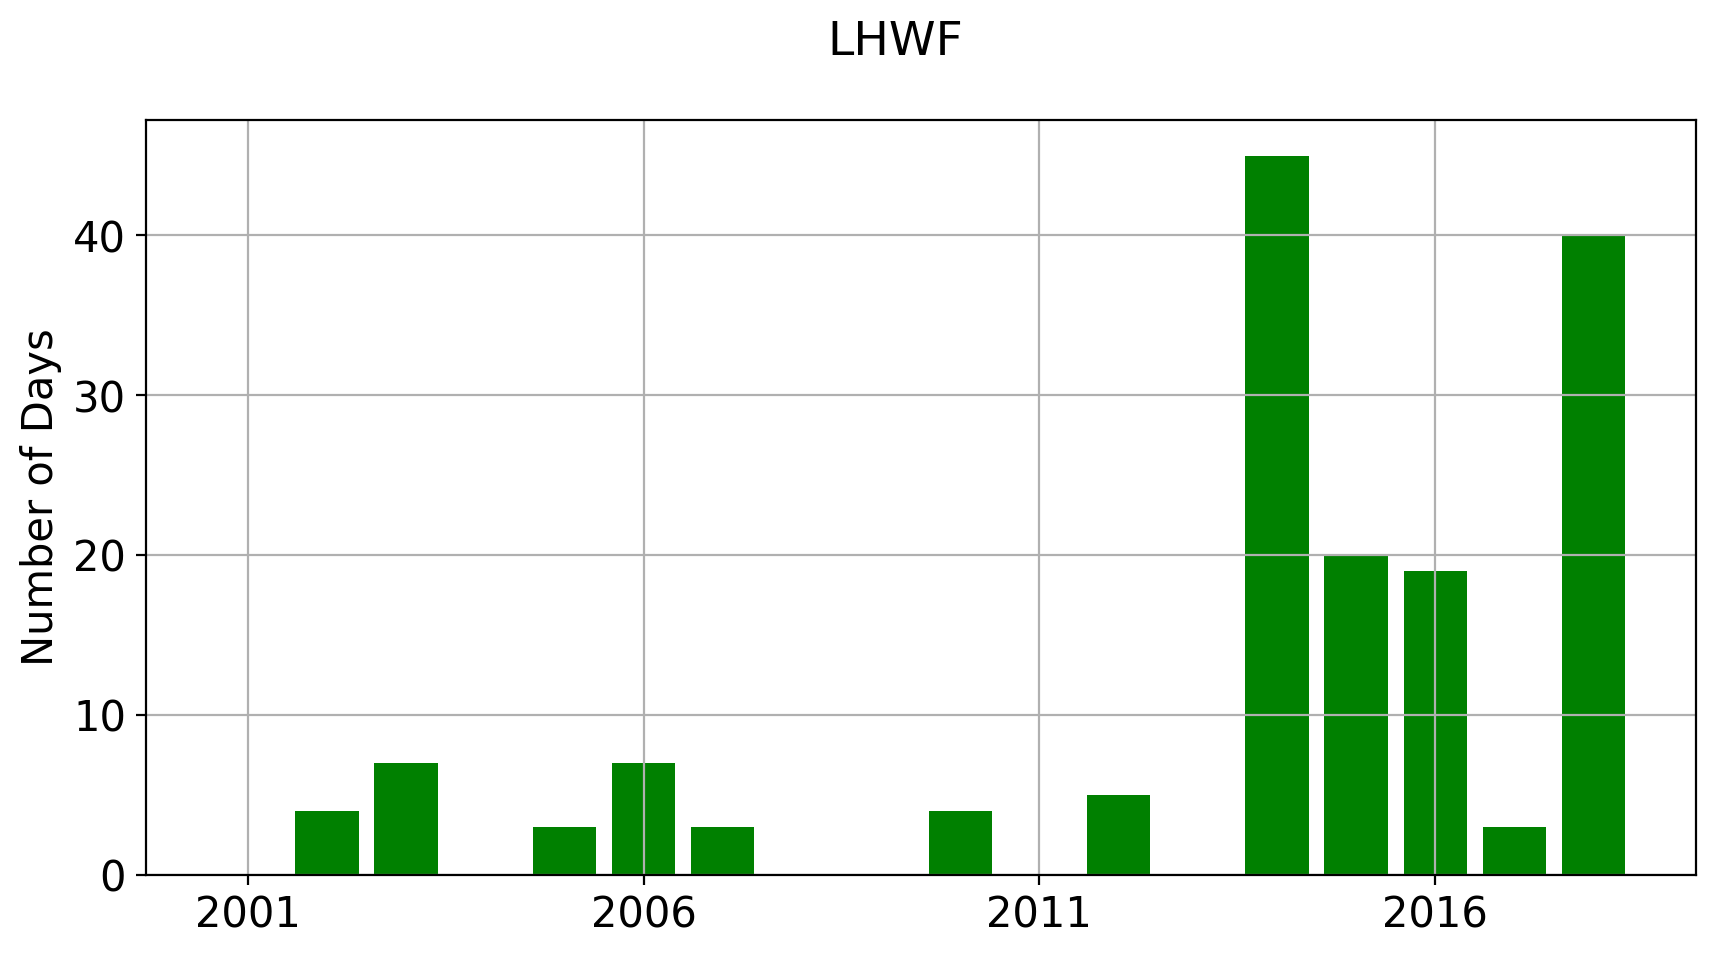

In [41]:
tex.wave_metrics(database_humidity,'LHW',True)

LHWN  LHWD  LHWF
YEAR SEASON                  
2001 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2002 1        0.0   0.0   0.0
...           ...   ...   ...
2017 4        1.0   3.0   3.0
2018 1        0.0   0.0   0.0
     2        4.0   7.0  17.0
     3        4.0   5.0  17.0
     4        0.0   0.0   0.0

[72 rows x 3 columns]

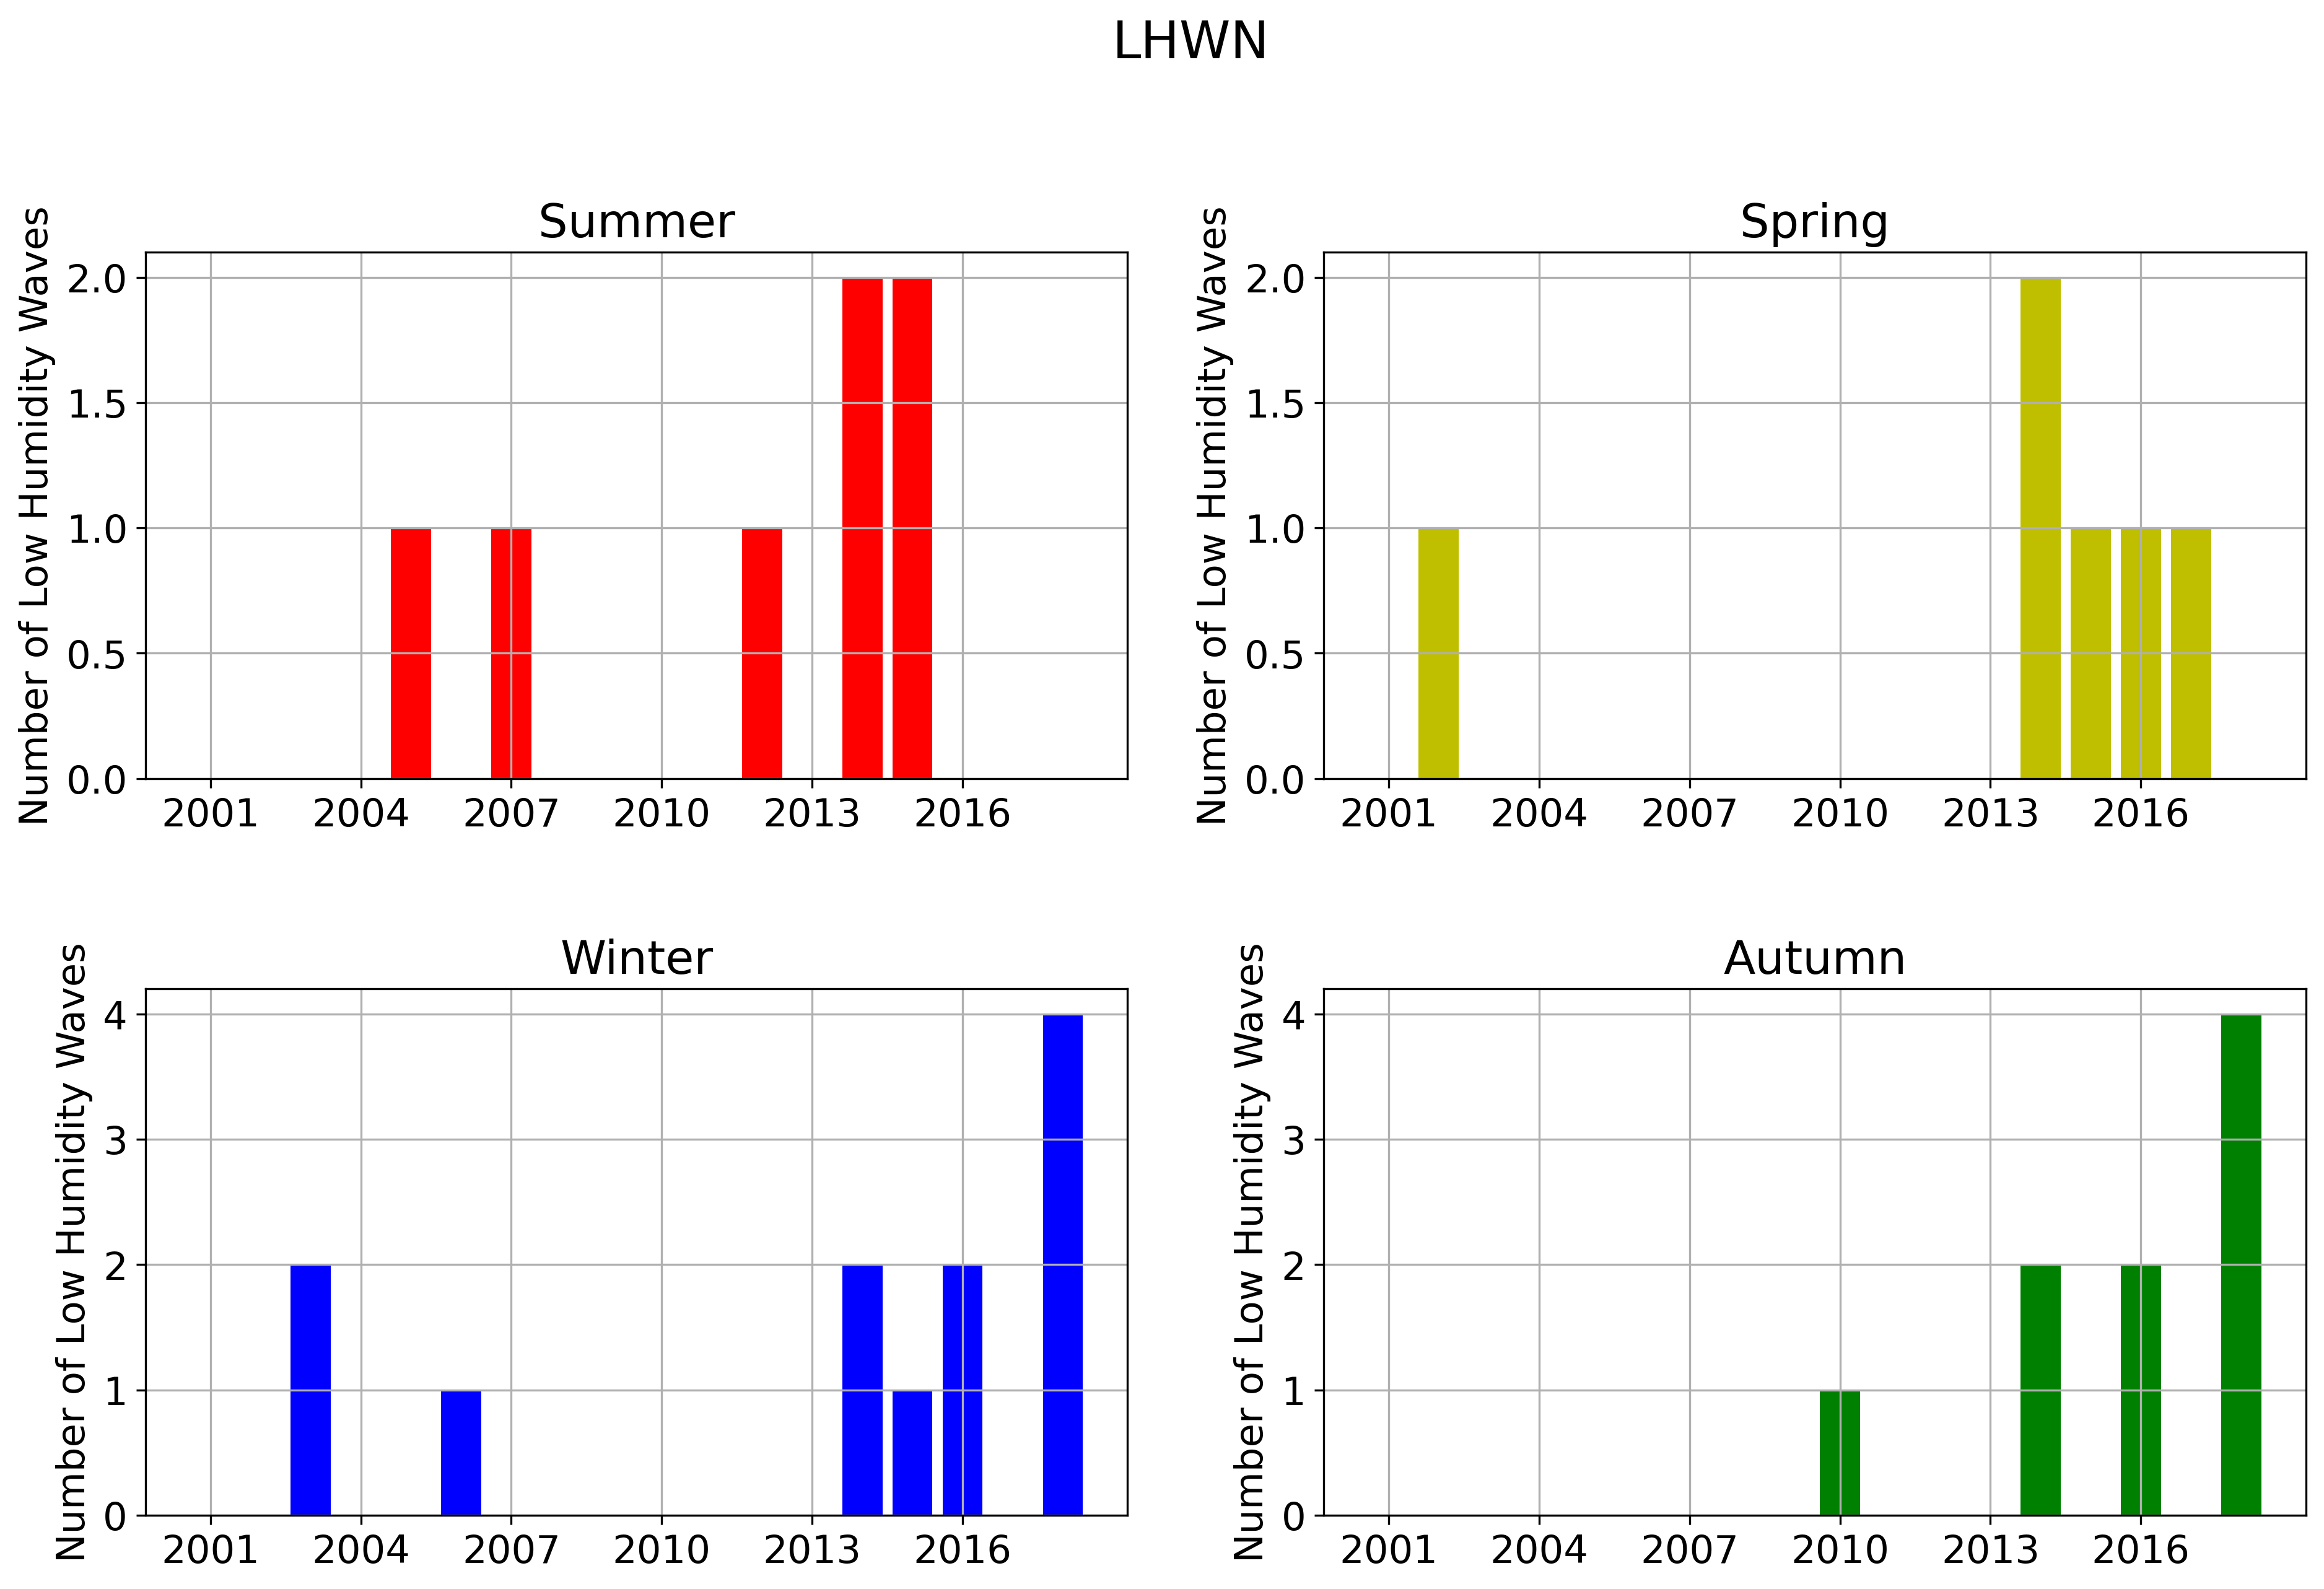

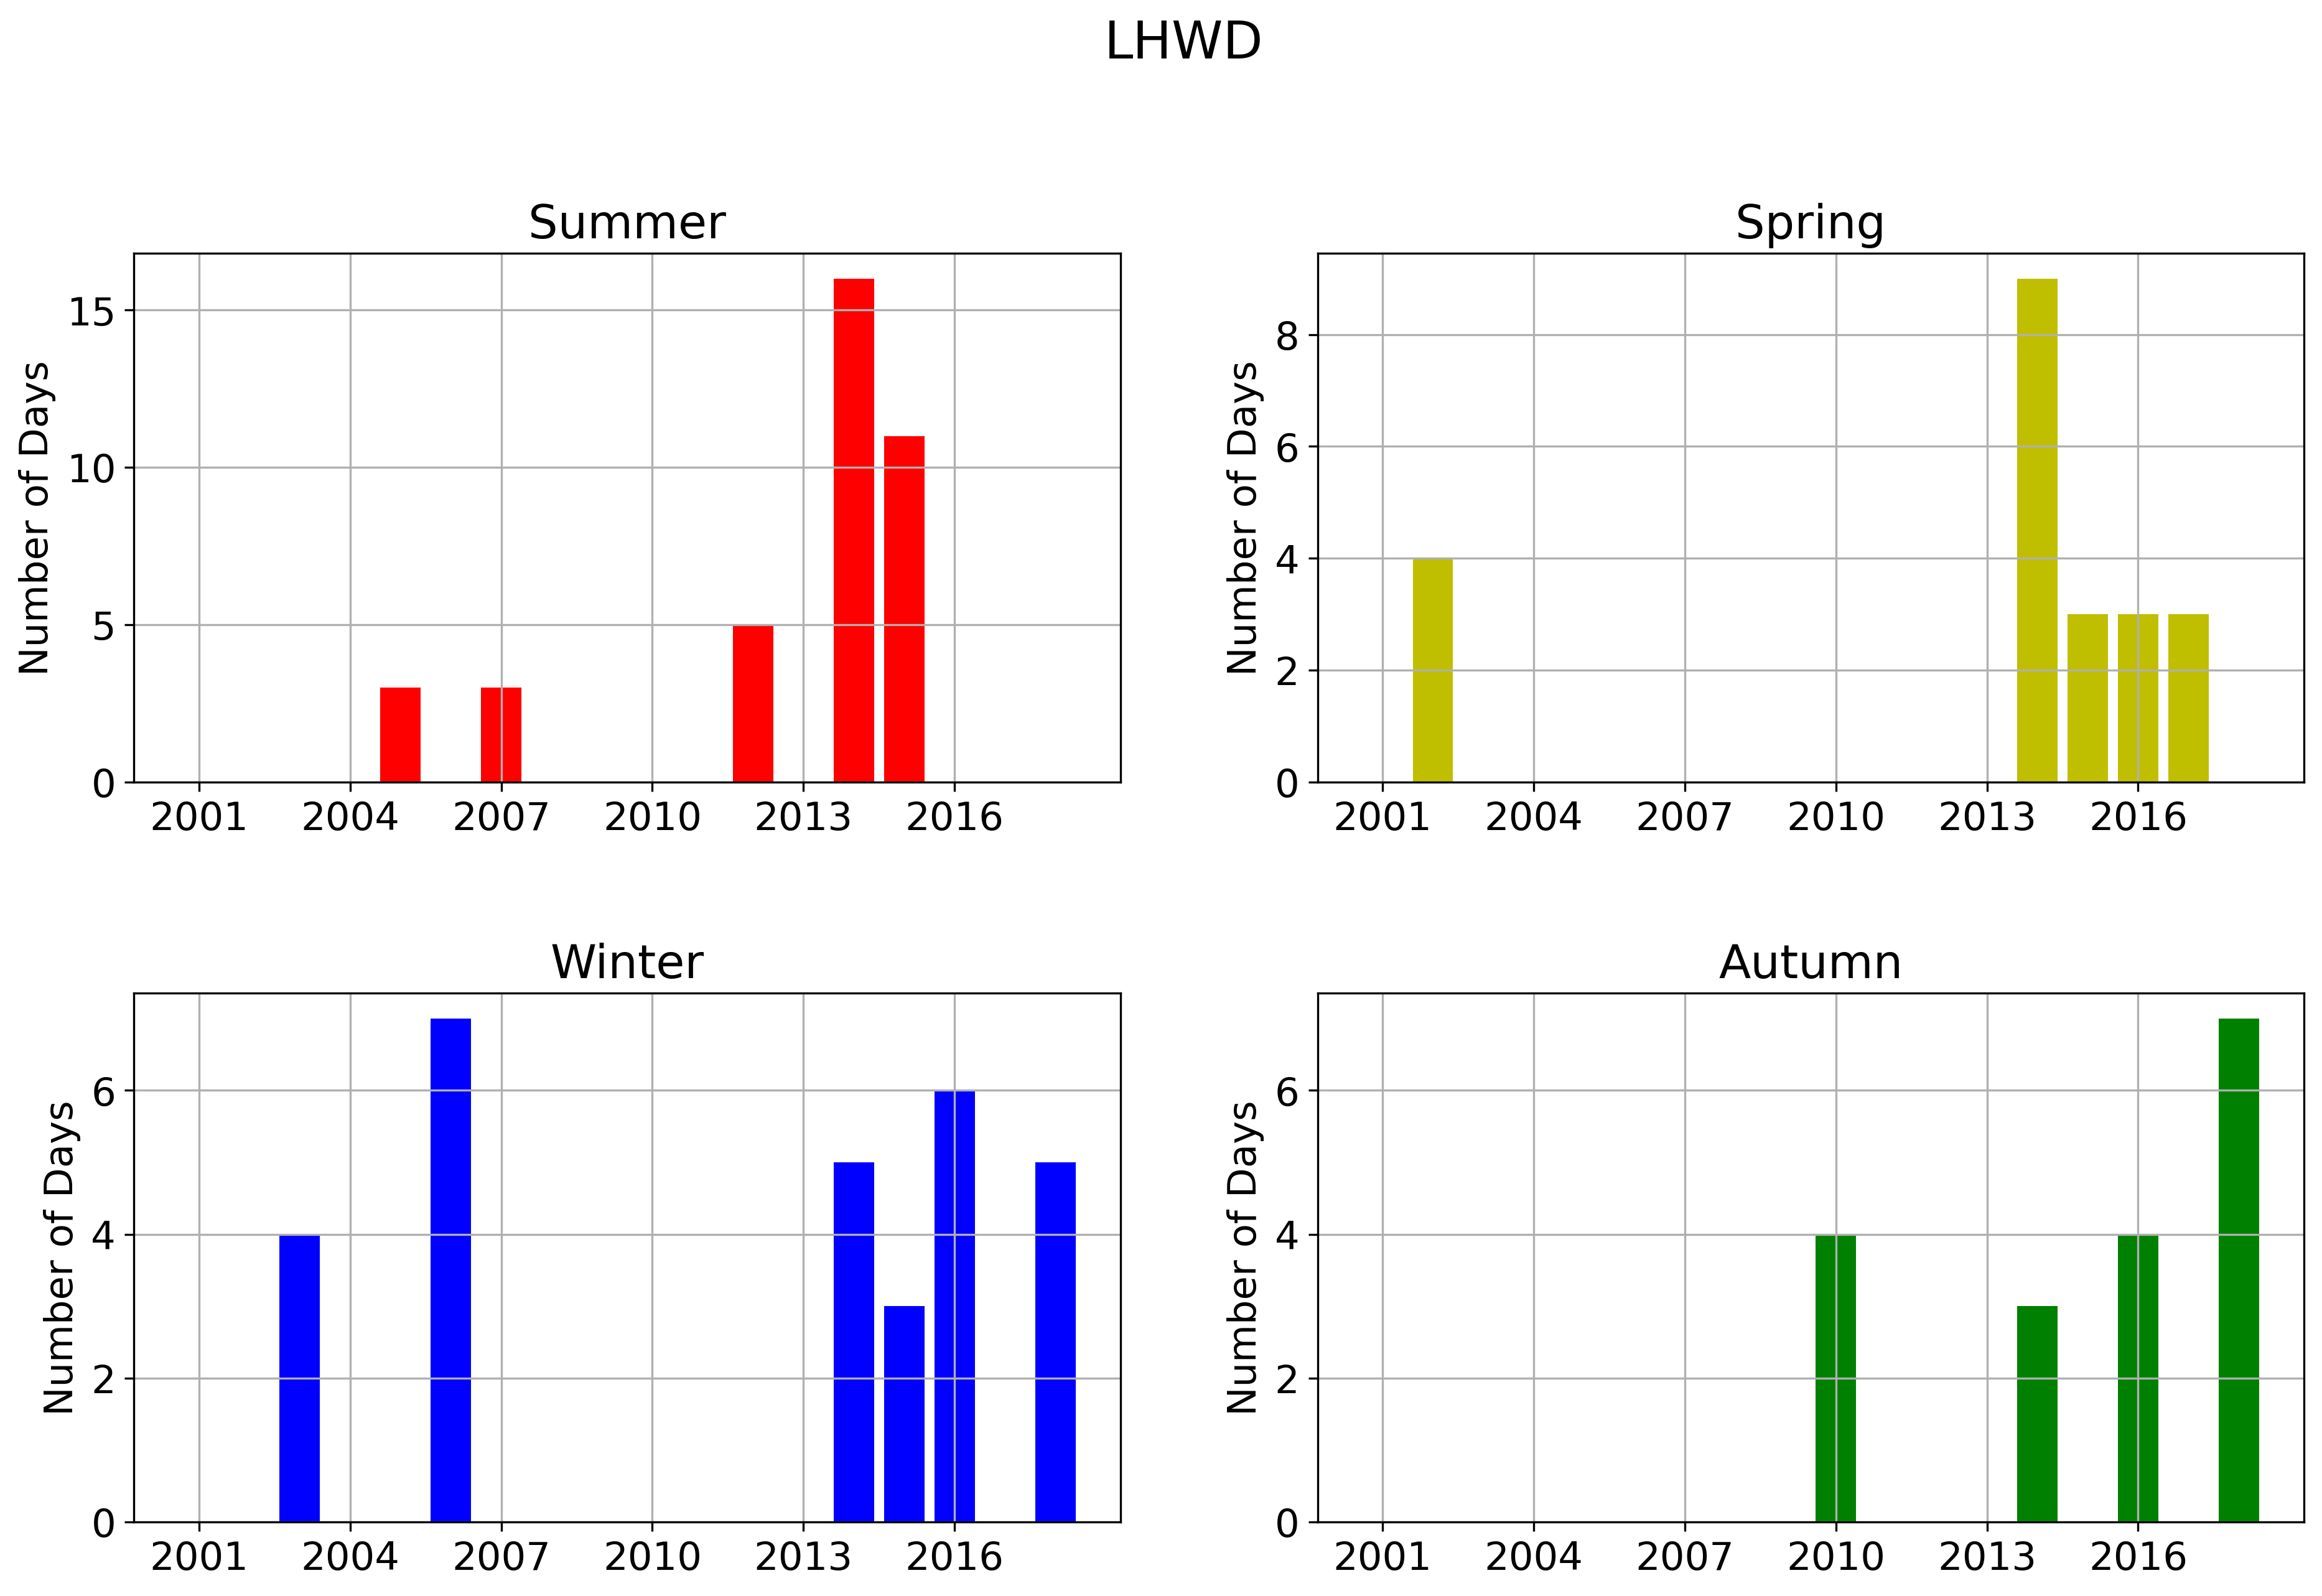

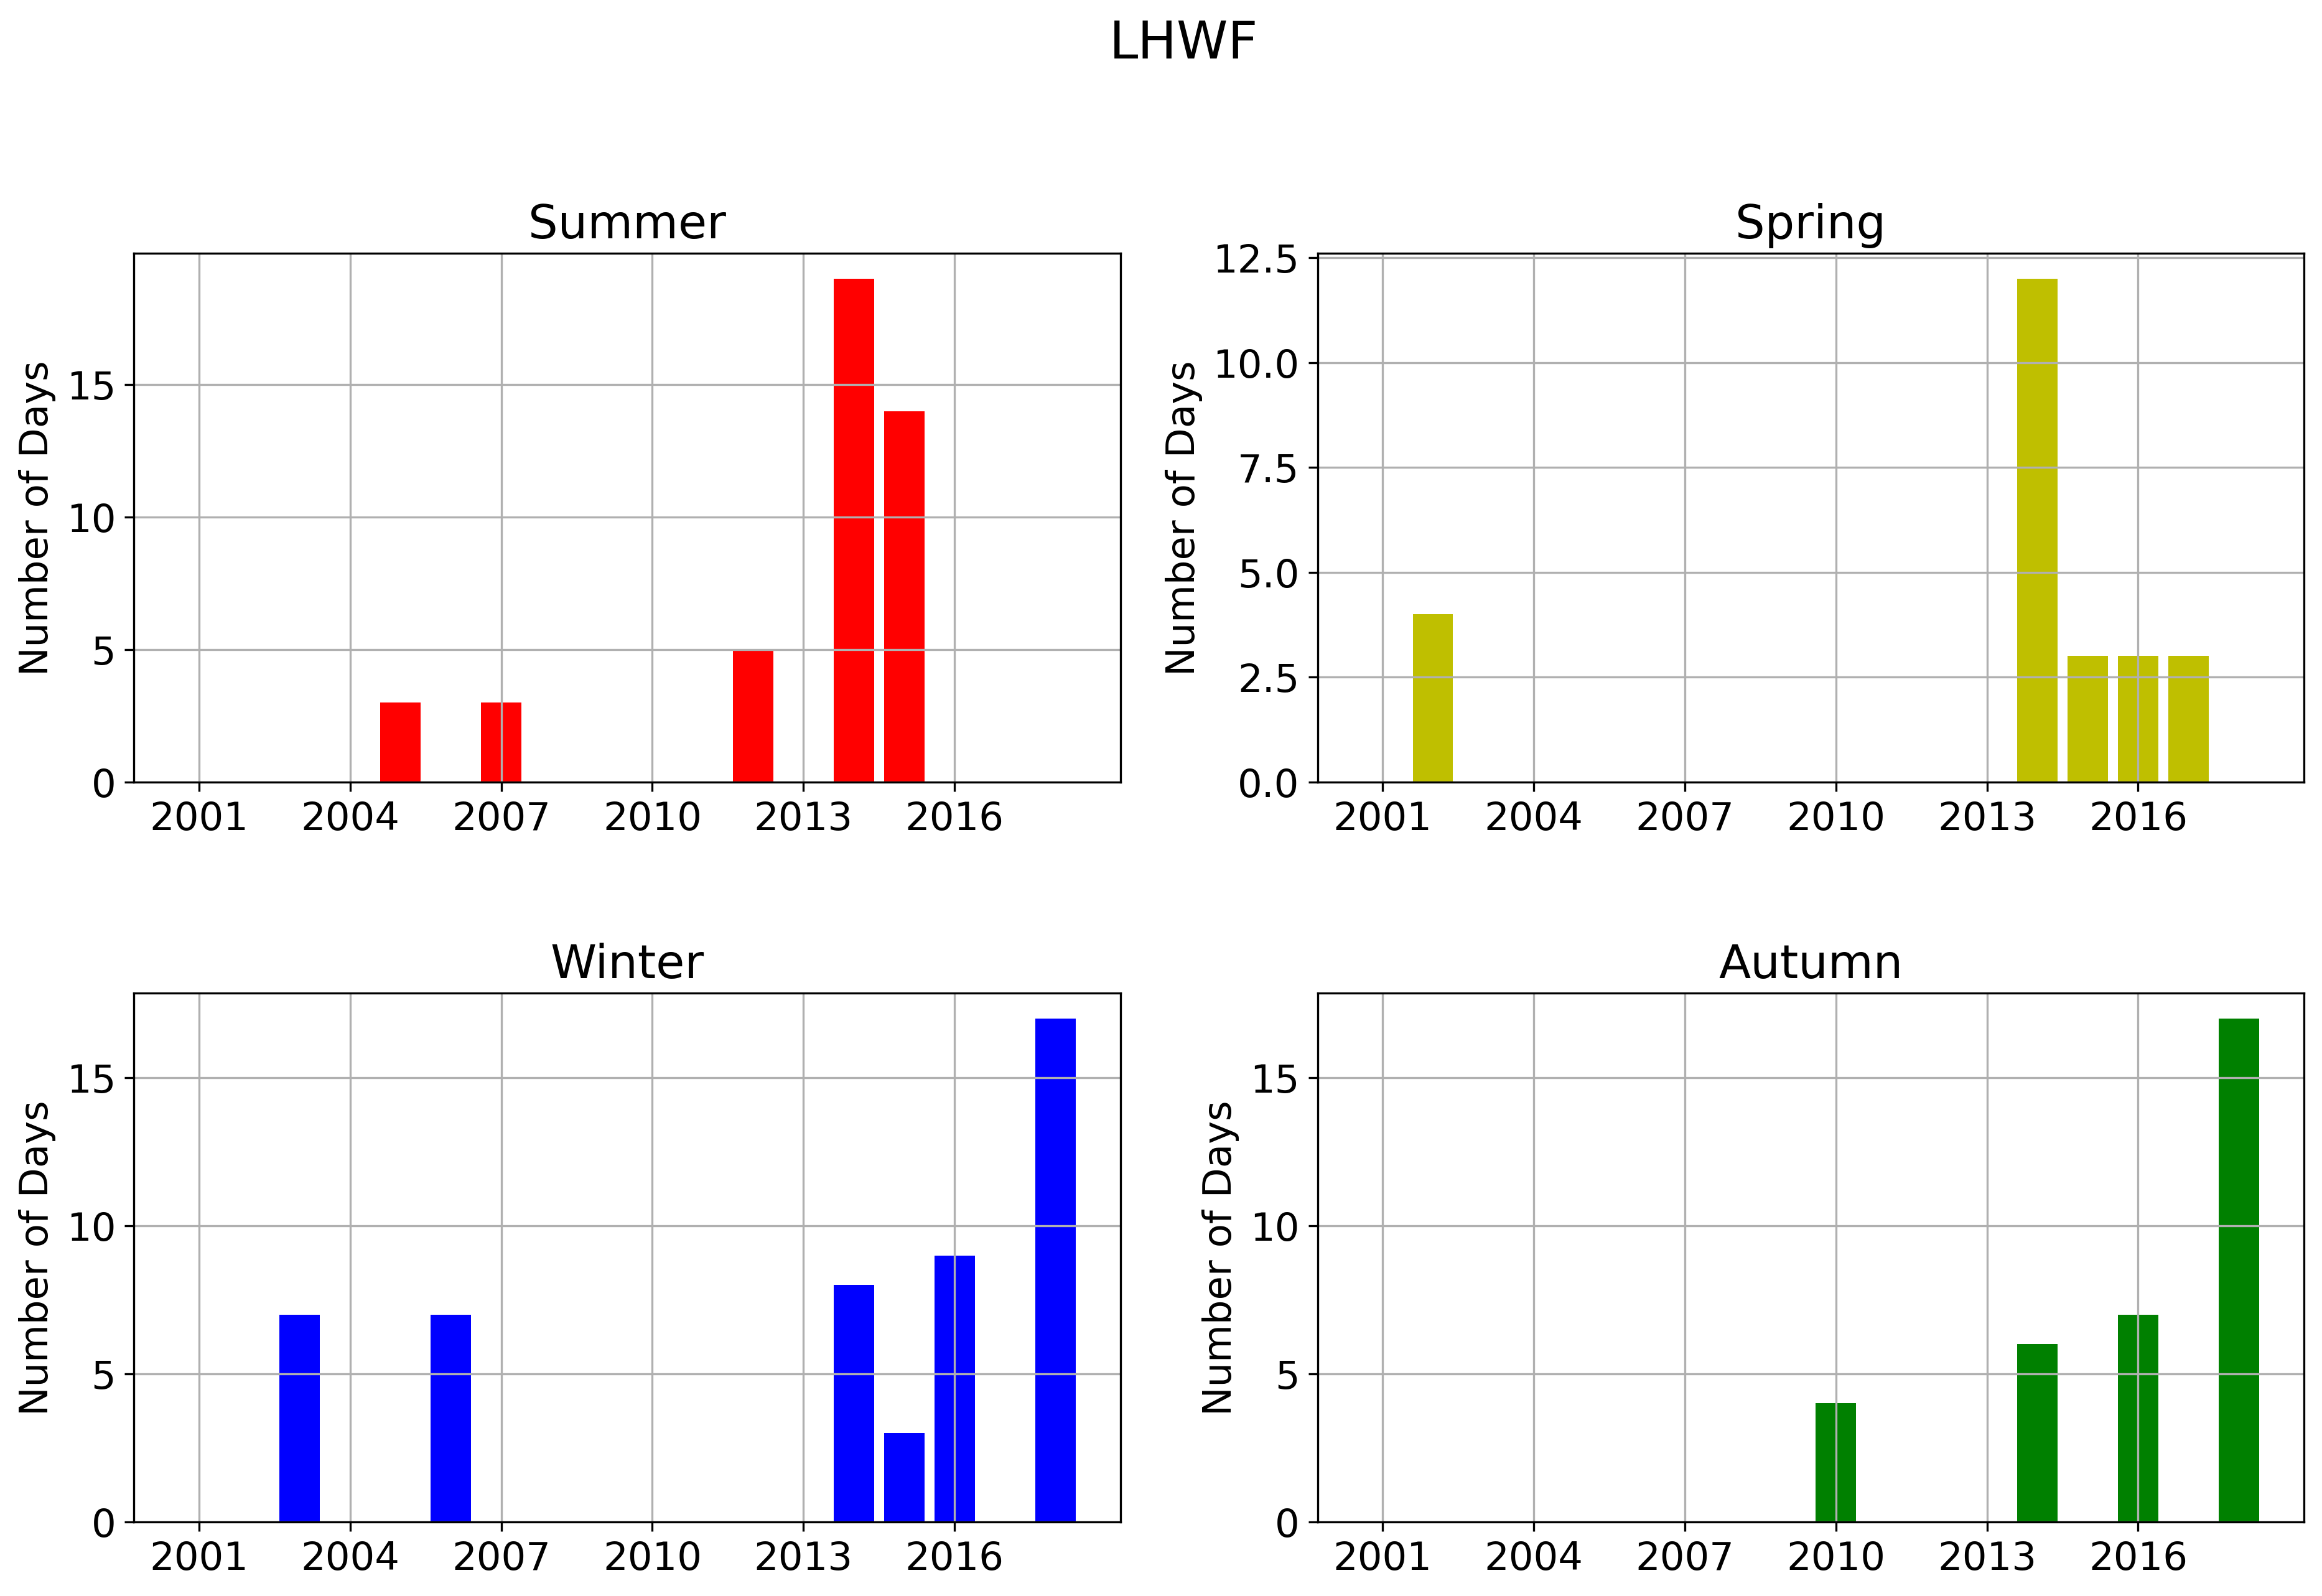

In [42]:
tex.wave_seasonMetrics(database_humidity,'LHW',True)

### **High Humidity Waves**

In [43]:
help(tex.check_HighHumidityWave)

Help on function check_HighHumidityWave in module climatex:

check_HighHumidityWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for High Humidity Waves on the database according to the Climatic Normal 
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for humidity waves. It obtains first a dataframe with the percentiles computed from the Climatic Normal 
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the maximum and minimum values of humidity are above the corresponding percentile.
    ## If they are above the threshold, the column 'above_pct' receives 1. This column is 
    ## then used to identify if there are 3 o

In [44]:
#get dataframe with columns 'above_pct' and 'HHW' indicating the occurence of a high humidity wave
#and the dataframe with the 90th percentile for maximum and minimum humidity
database_humidity,df_pct = tex.check_HighHumidityWave(database_humidity,'HMAX','HMIN',climatic_norm_humidity,'HMAX','HMIN')

,HHWN,HHWD,HHWF
YEAR,,,
2001,0.0,0.0,0.0
2002,0.0,0.0,0.0
2003,3.0,3.0,9.0
2004,13.0,5.0,46.0
2005,2.0,3.0,6.0
2006,1.0,3.0,3.0
2007,5.0,4.0,16.0
2008,4.0,4.0,13.0
2009,7.0,6.0,25.0


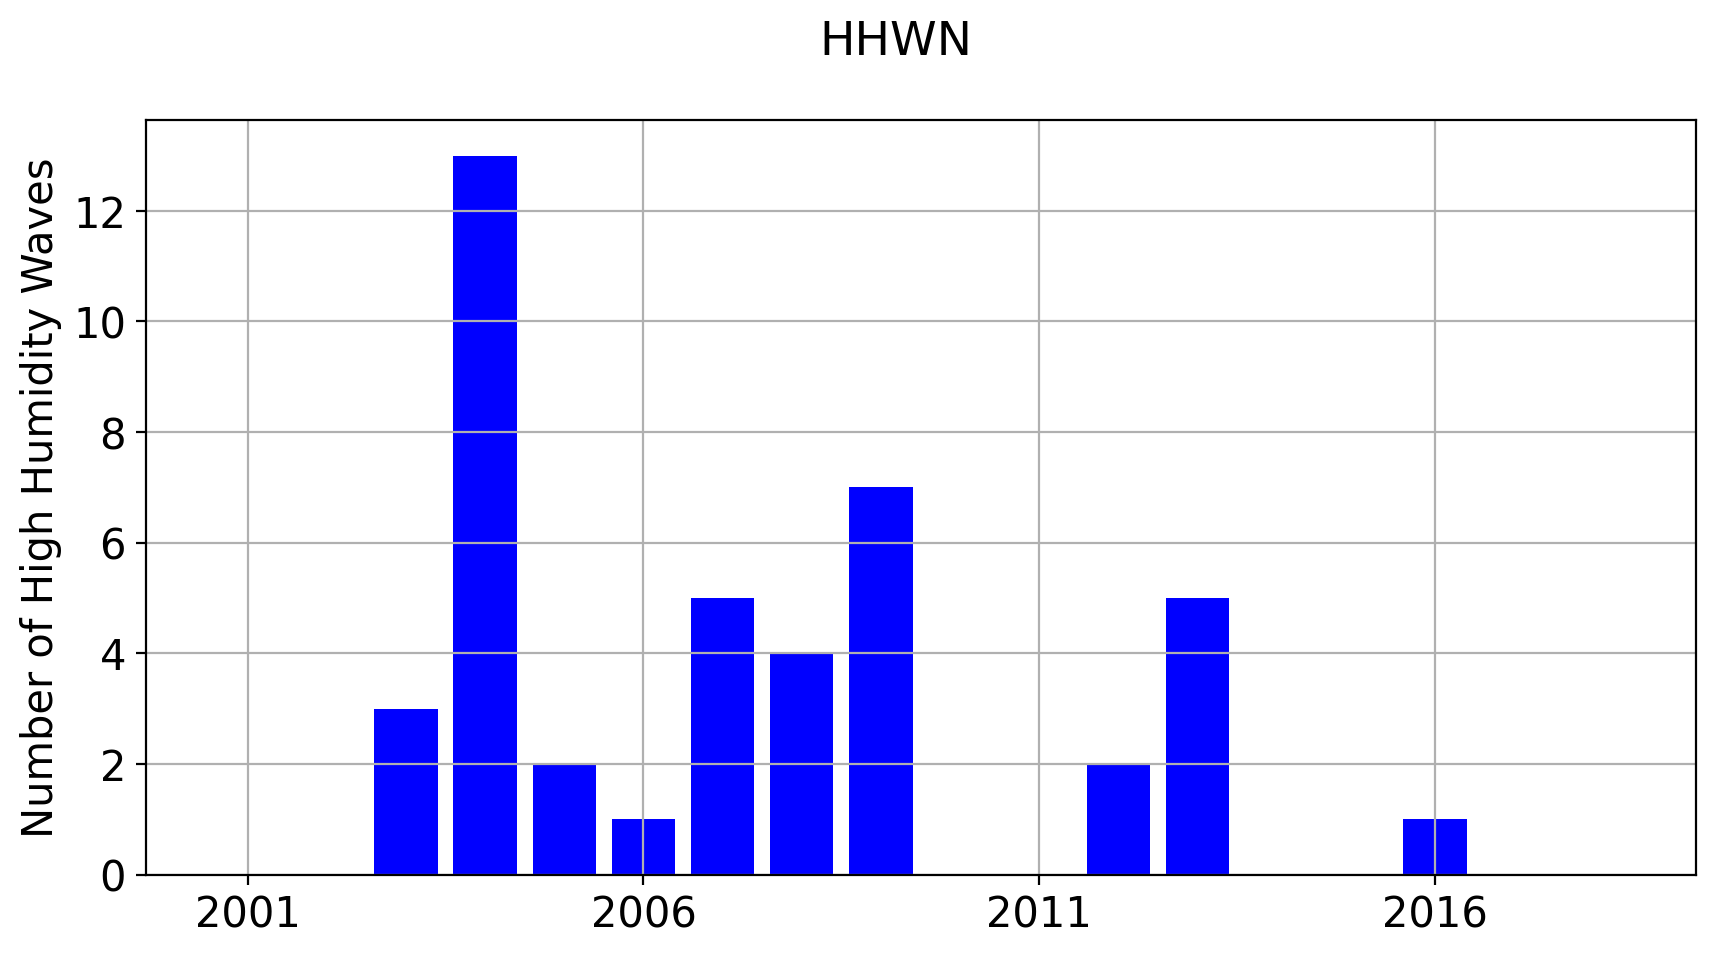

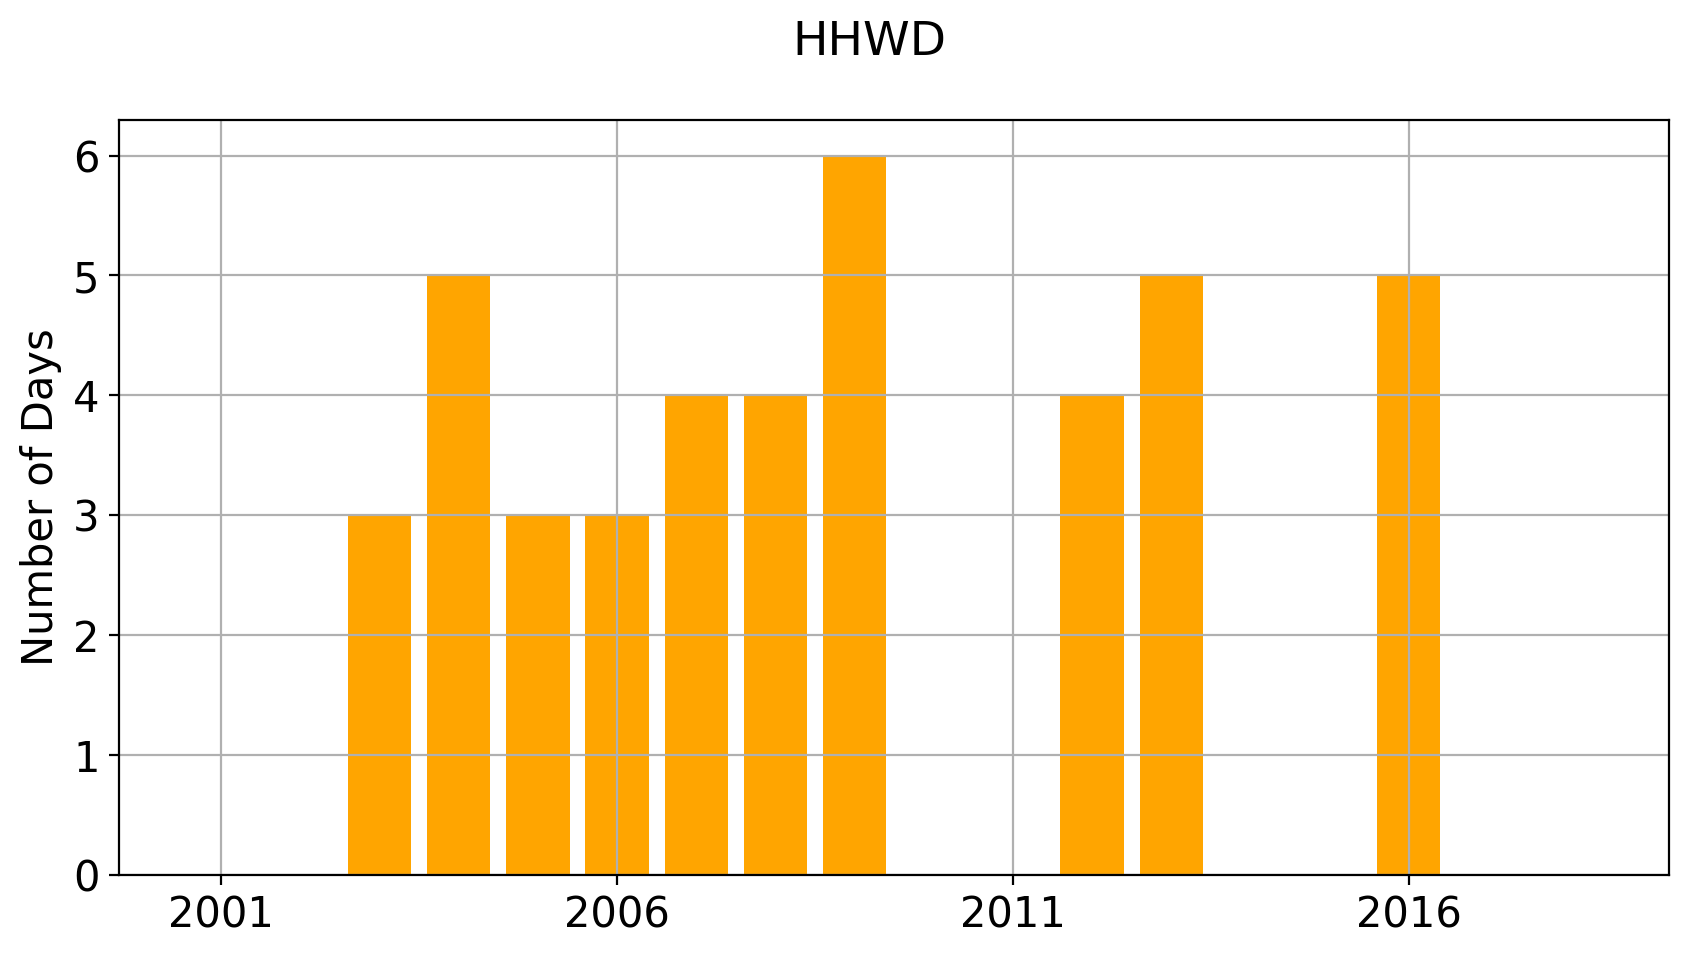

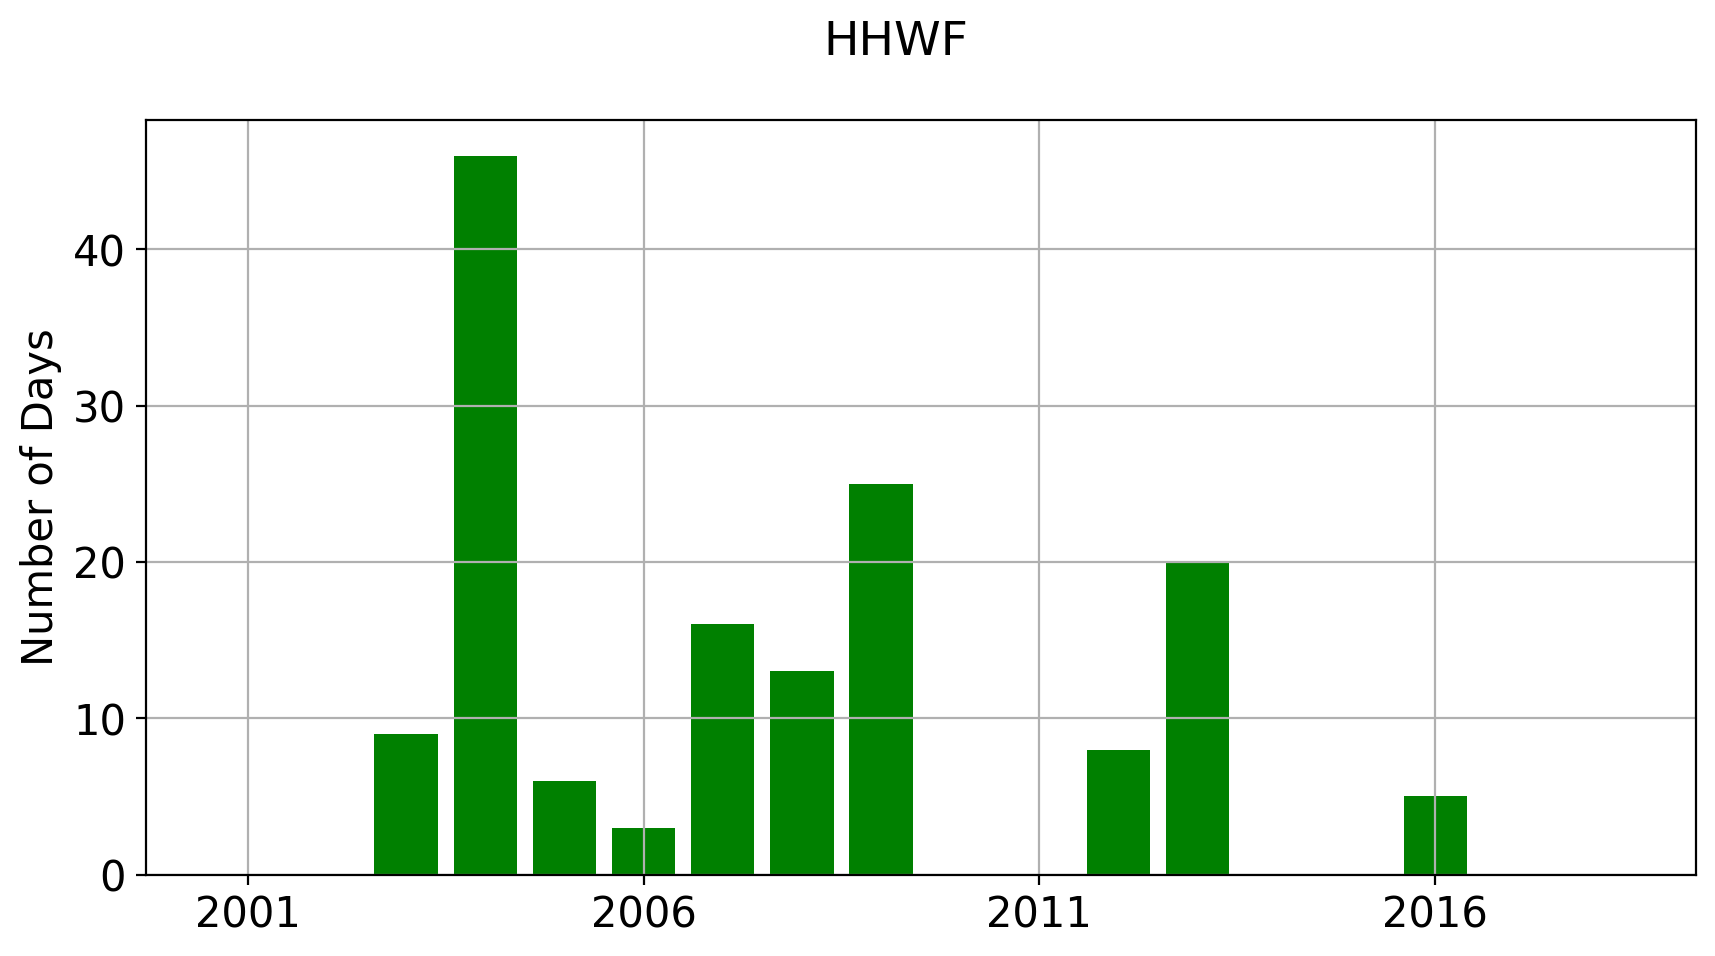

In [45]:
tex.wave_metrics(database_humidity,'HHW',True)

HHWN  HHWD  HHWF
YEAR SEASON                  
2001 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2002 1        0.0   0.0   0.0
...           ...   ...   ...
2017 4        0.0   0.0   0.0
2018 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0

[72 rows x 3 columns]

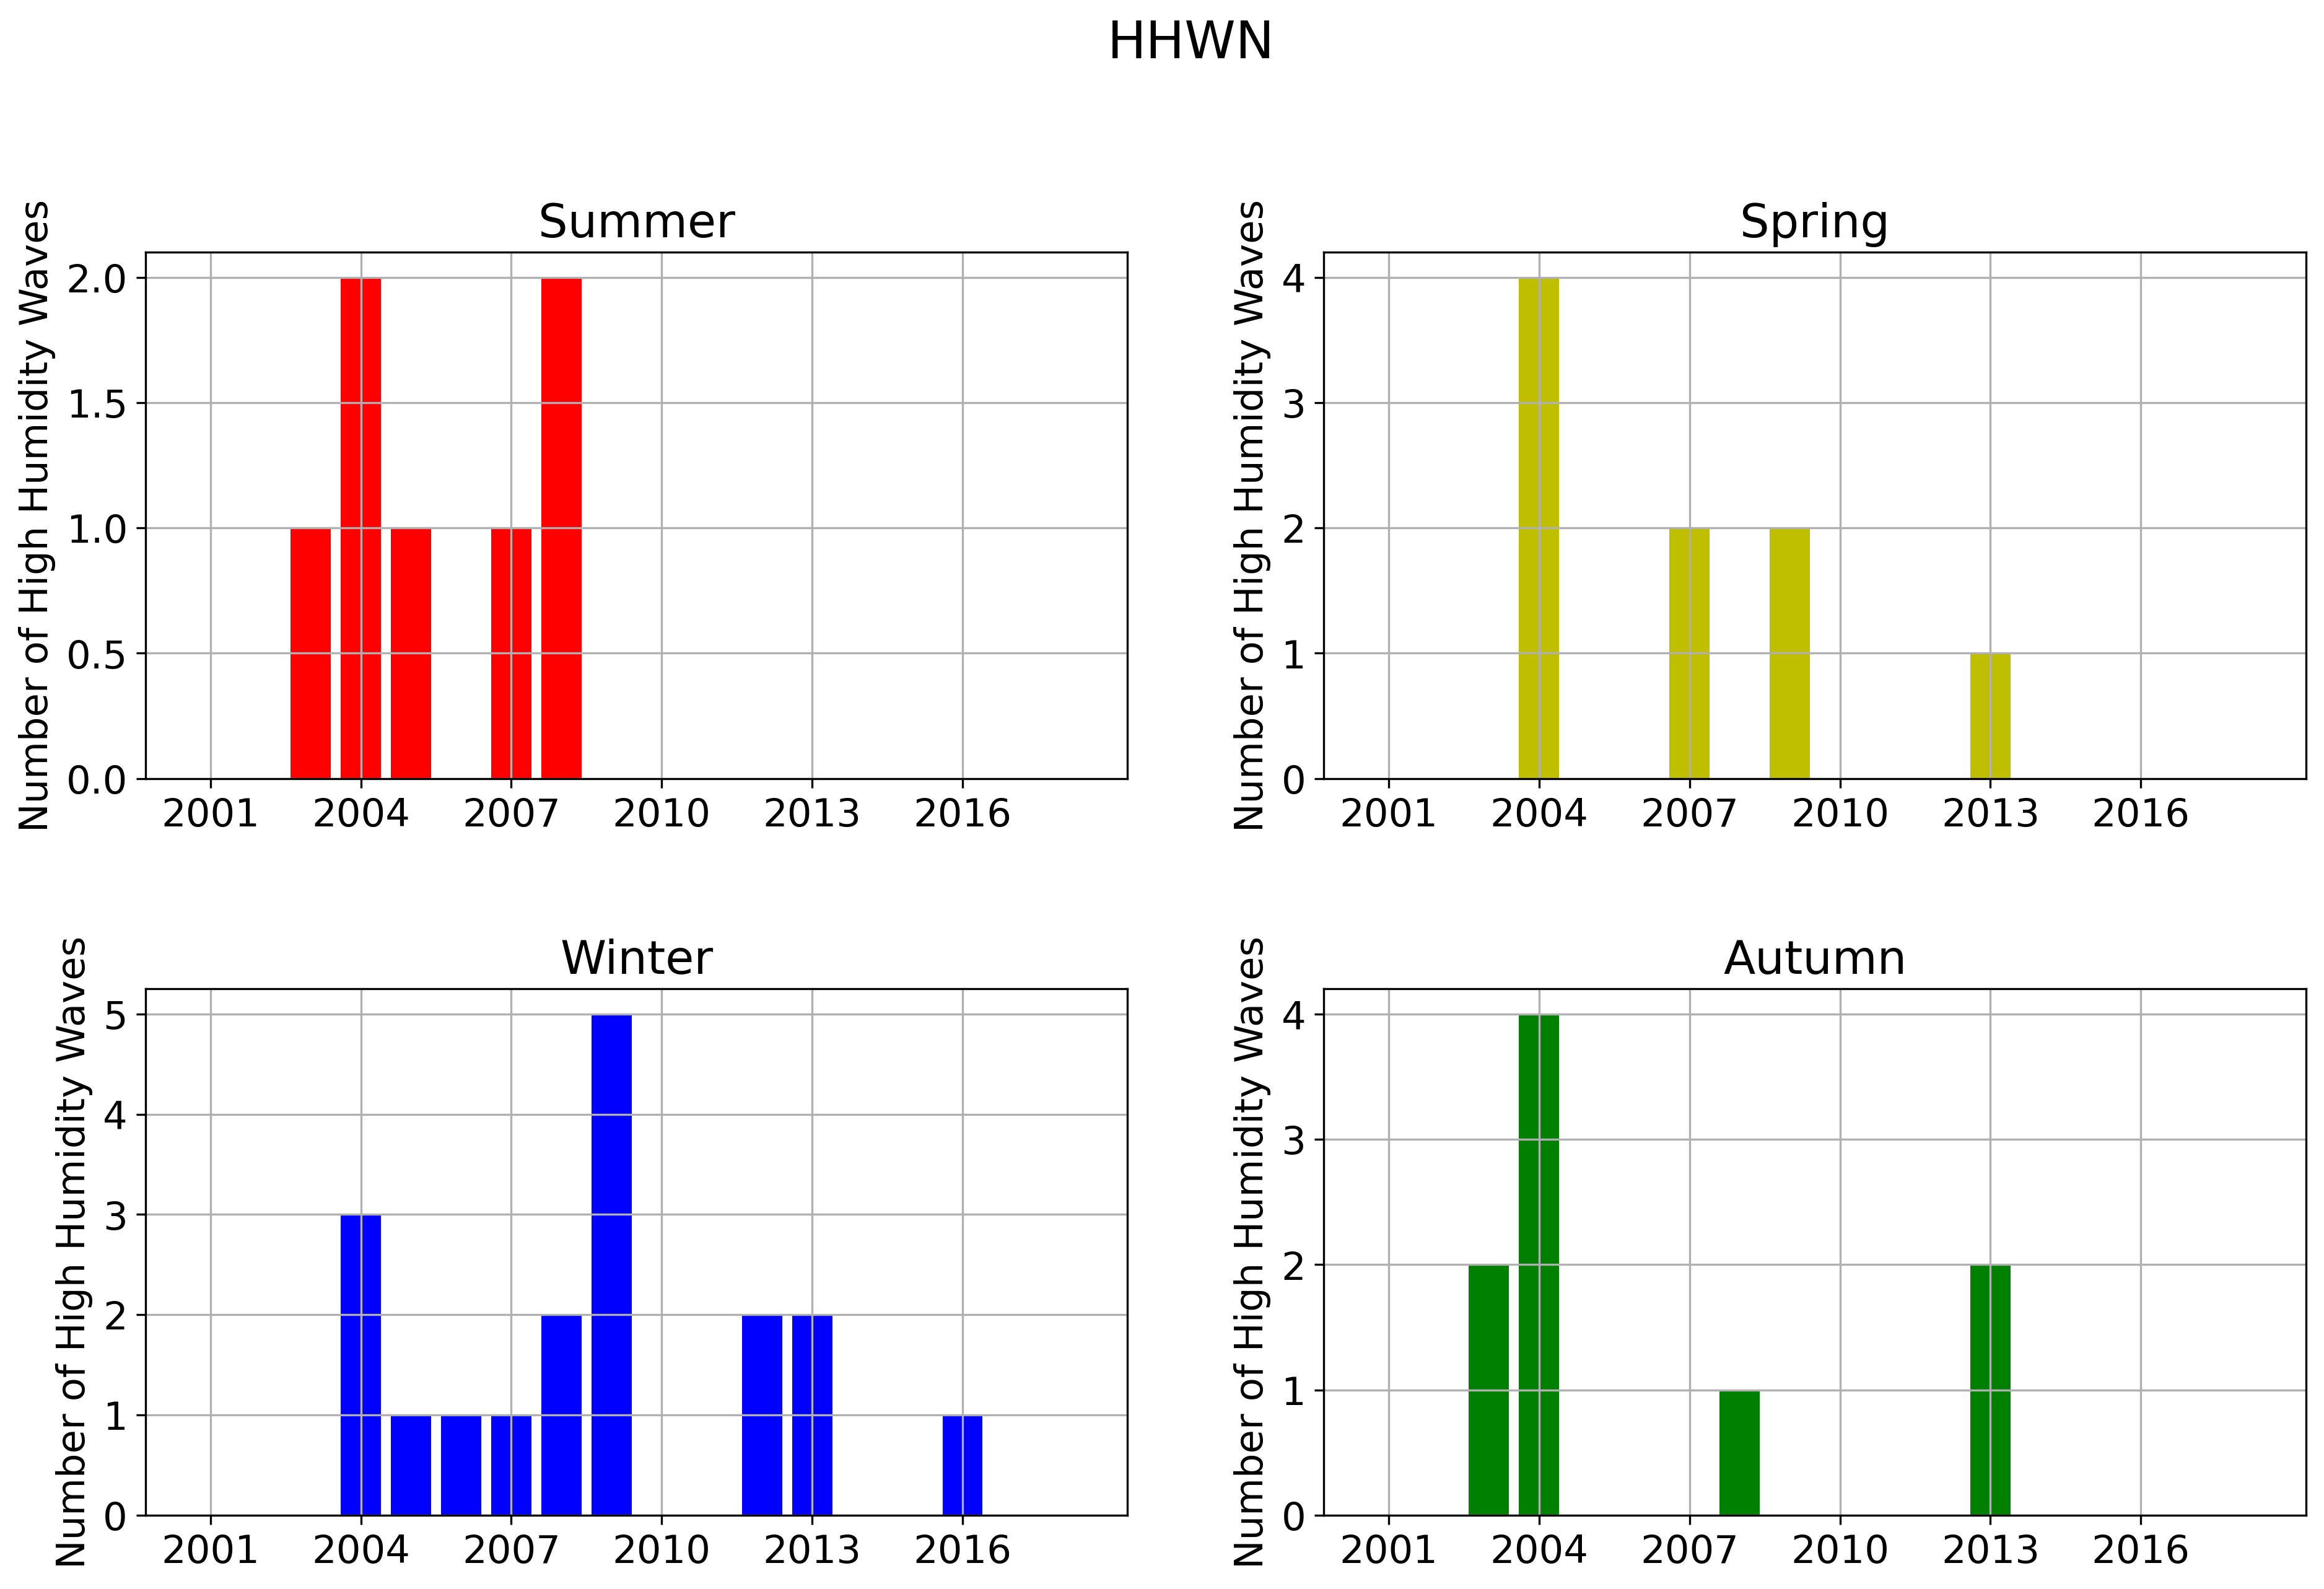

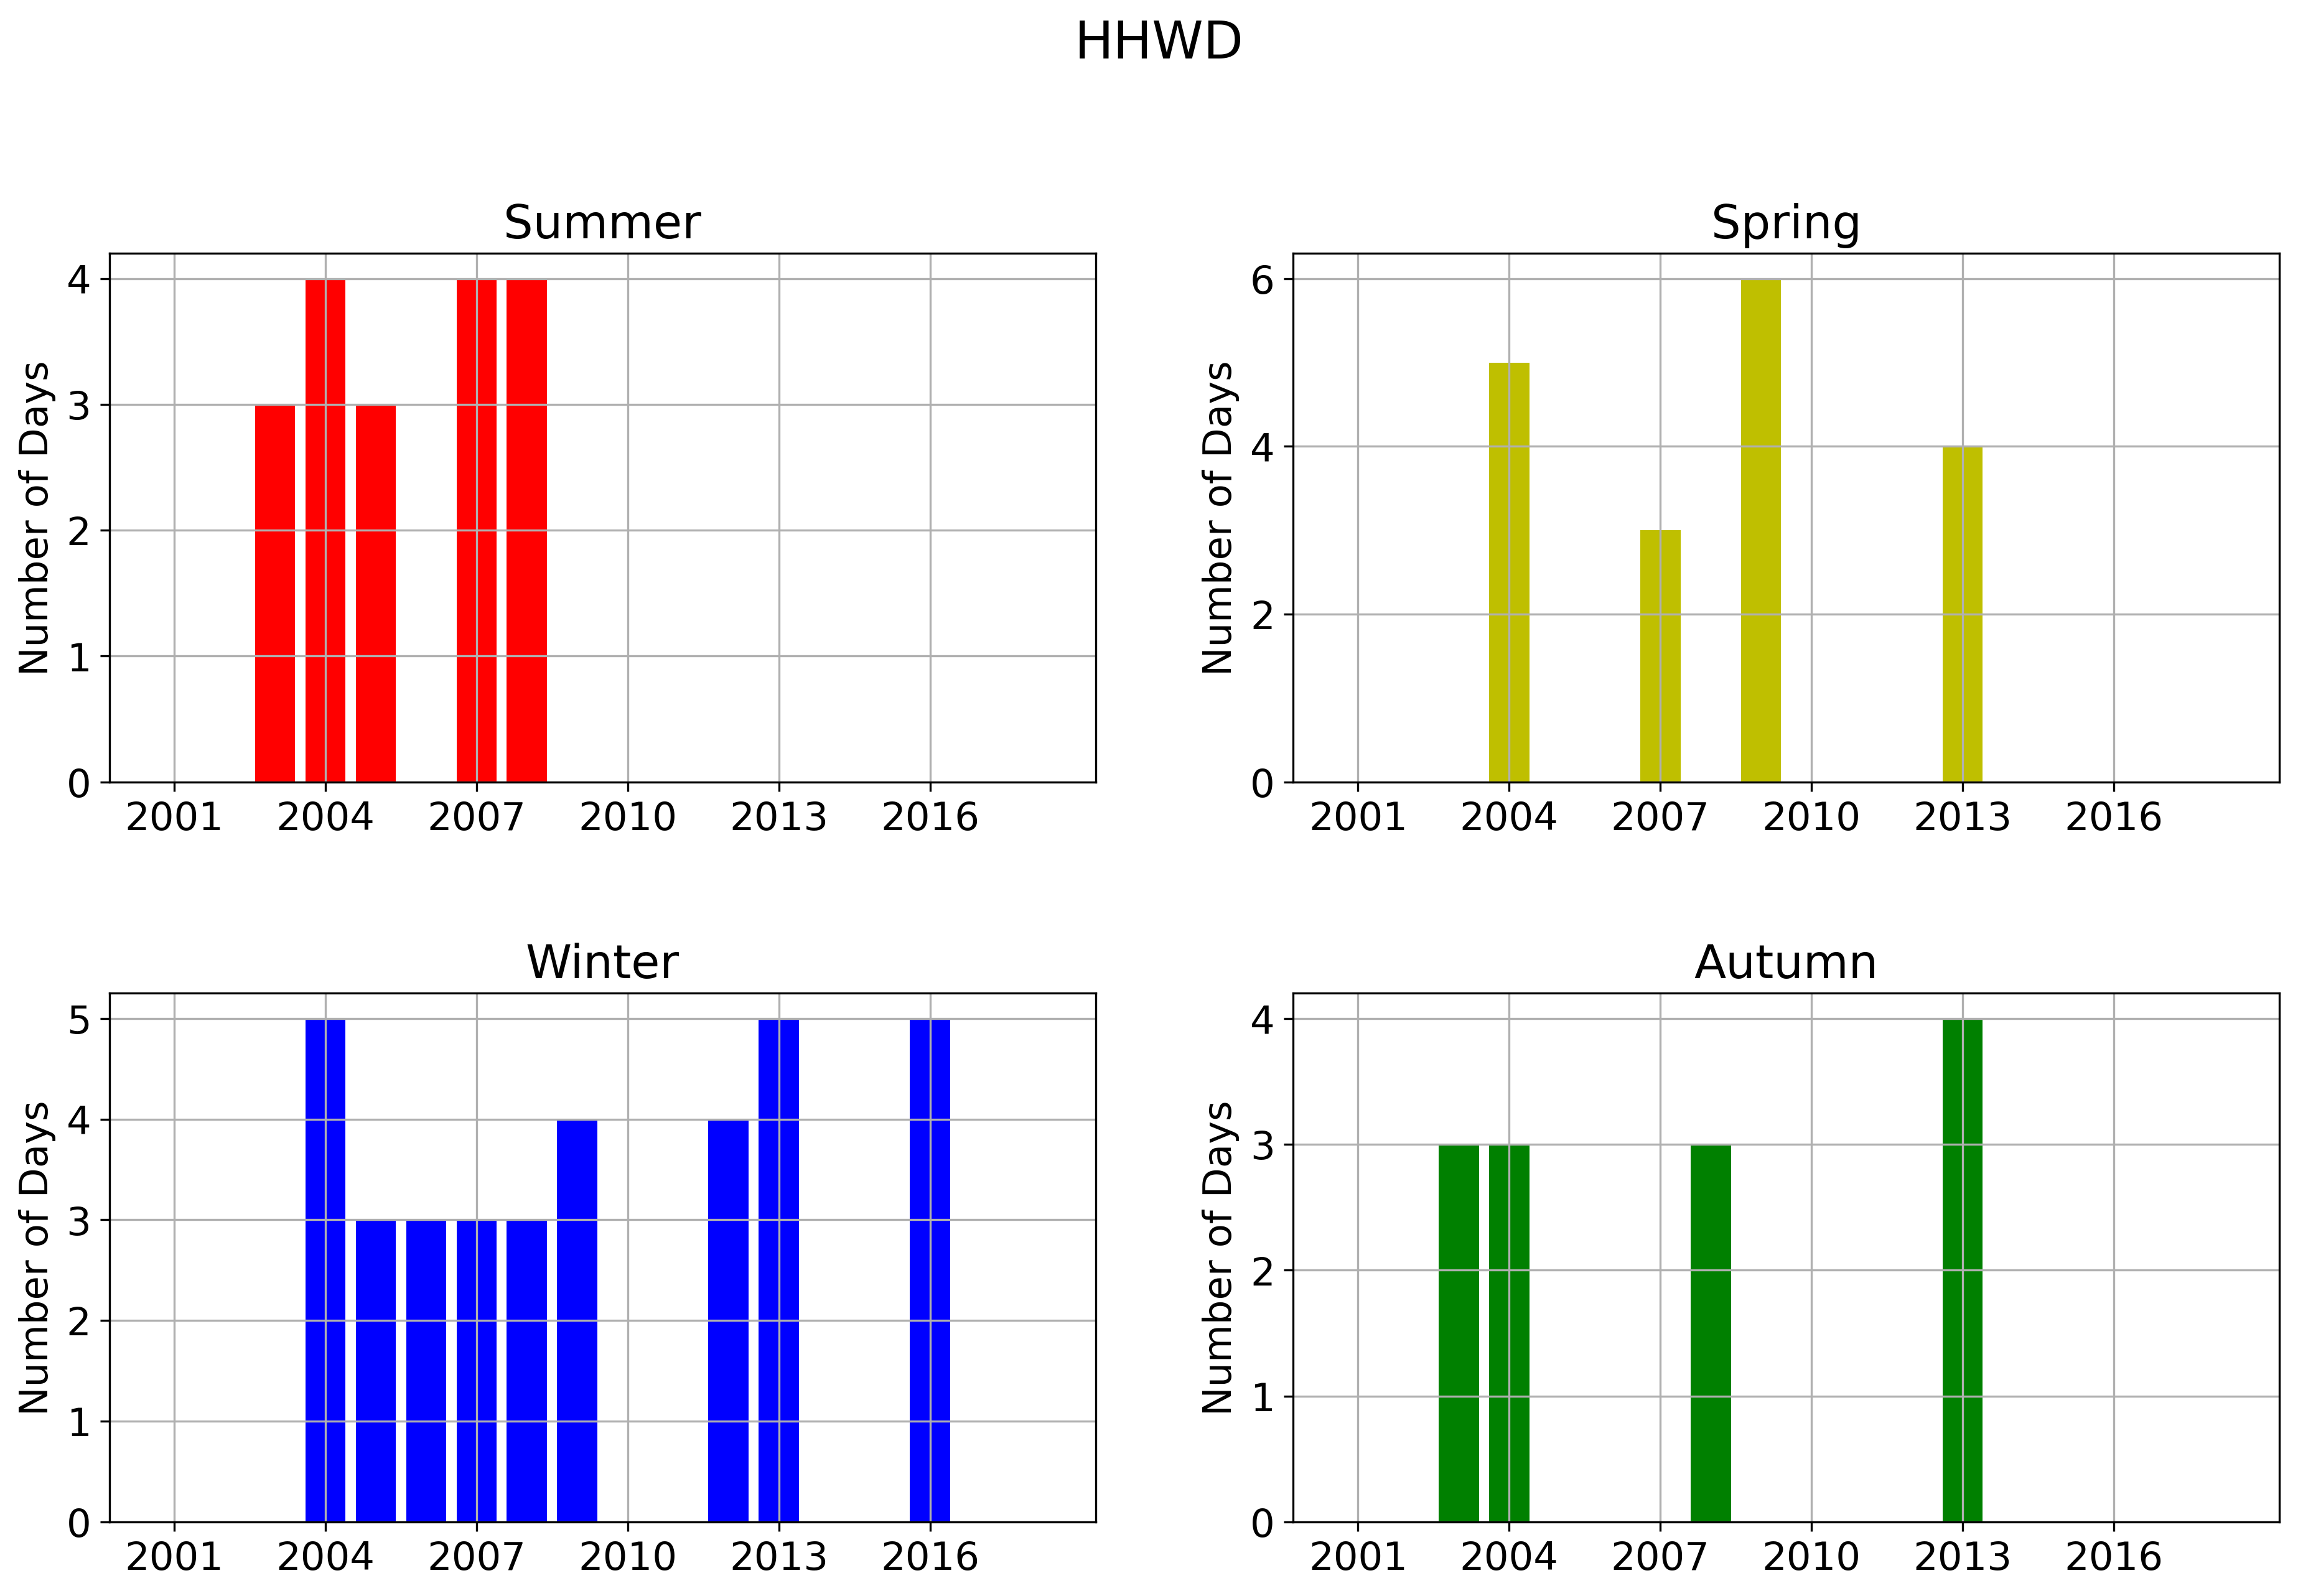

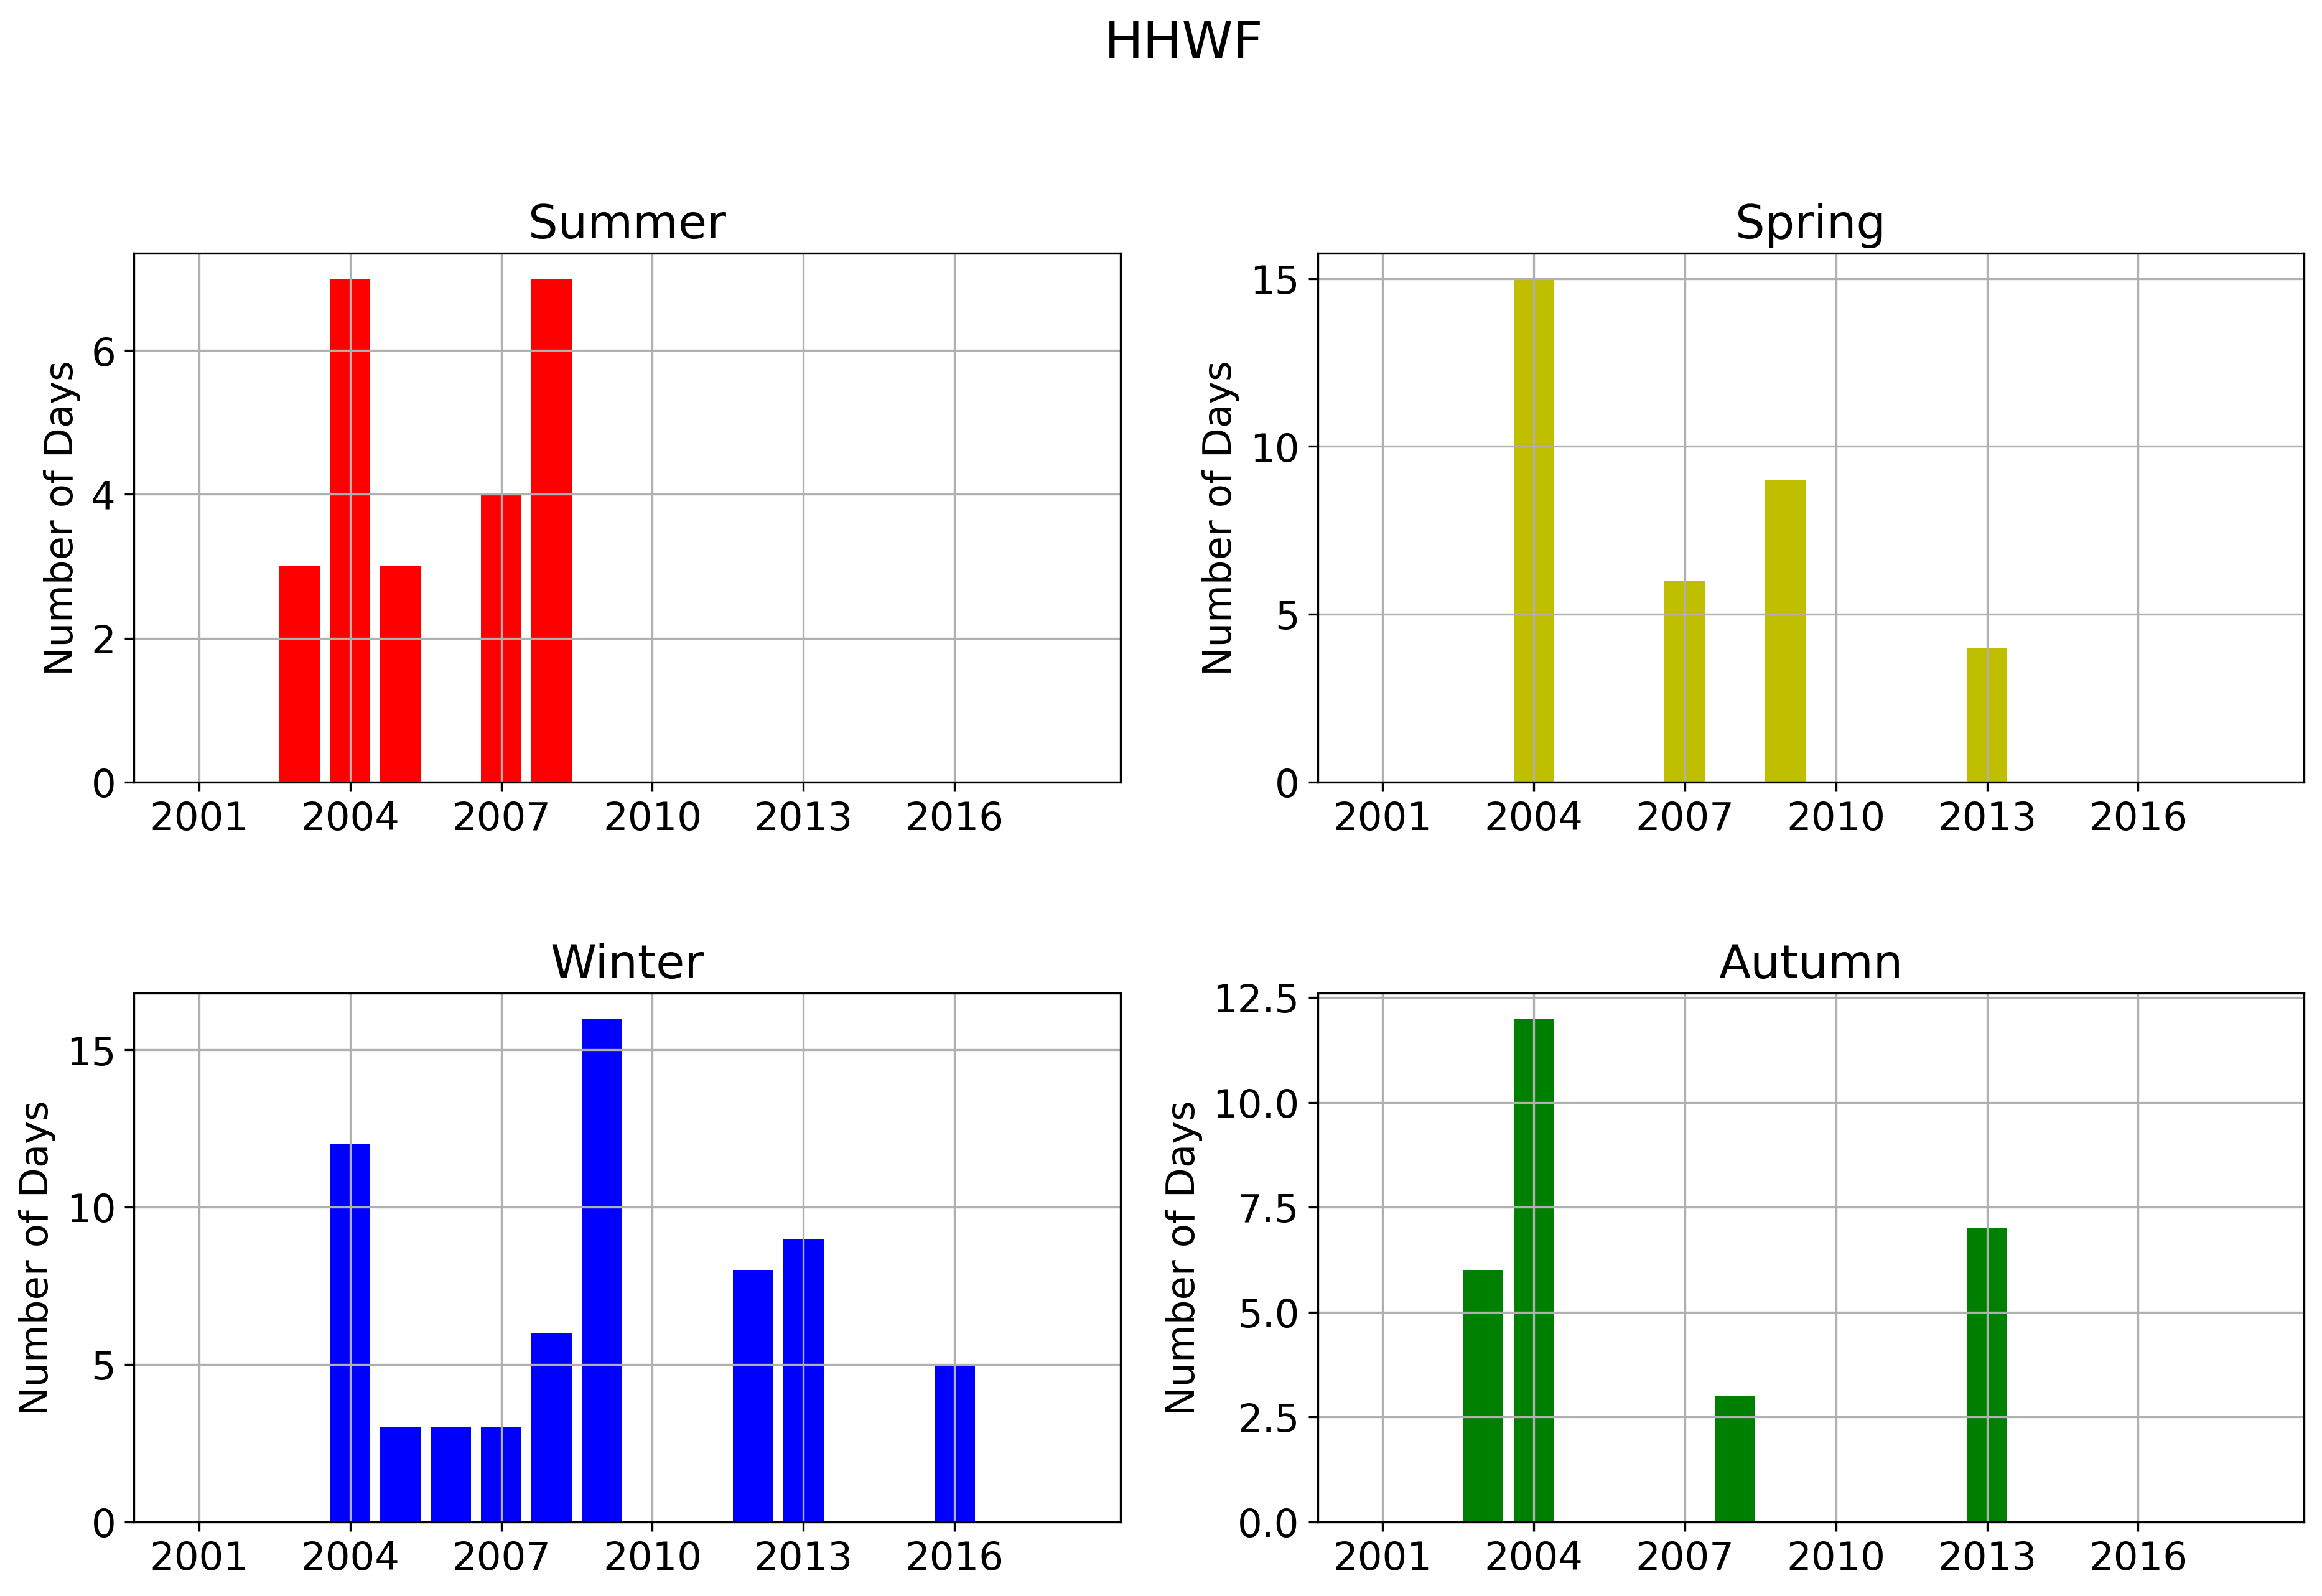

In [46]:
tex.wave_seasonMetrics(database_humidity,'HHW',True)

### **Extreme humidity range**



In [47]:
help(tex.check_HumidityAboveRange)

Help on function check_HumidityAboveRange in module climatex:

check_HumidityAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of humidity according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct_range' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at lea

In [48]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for humidity range
database_humidity, df_pct = tex.check_HumidityAboveRange(database_humidity,'HMAX','HMIN',climatic_norm_humidity,'HMAX','HMIN')

,RND
YEAR,
2001,27
2002,21
2003,71
2004,73
2005,31
2006,37
2007,89
2008,65
2009,76


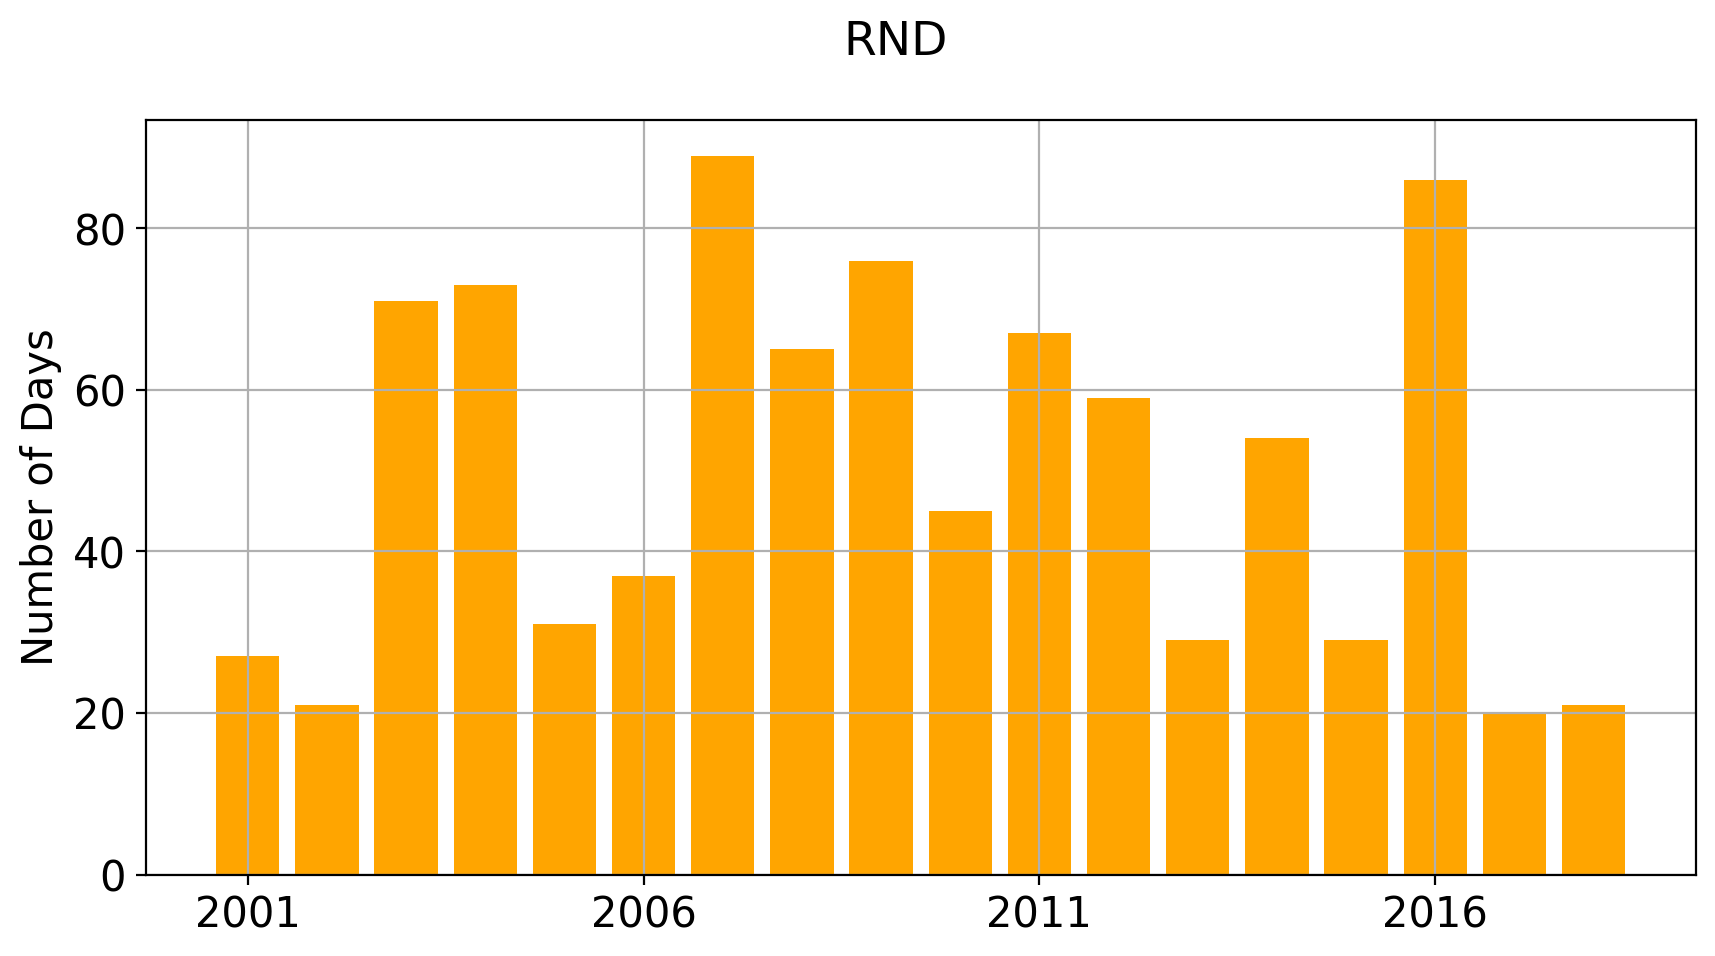

In [49]:
tex.range_metrics(database_humidity,True)

RND
YEAR SEASON     
2001 1         7
     2         8
     3         5
     4         7
2002 1         5
...          ...
2017 4        11
2018 1         7
     2         9
     3         4
     4         1

[72 rows x 1 columns]

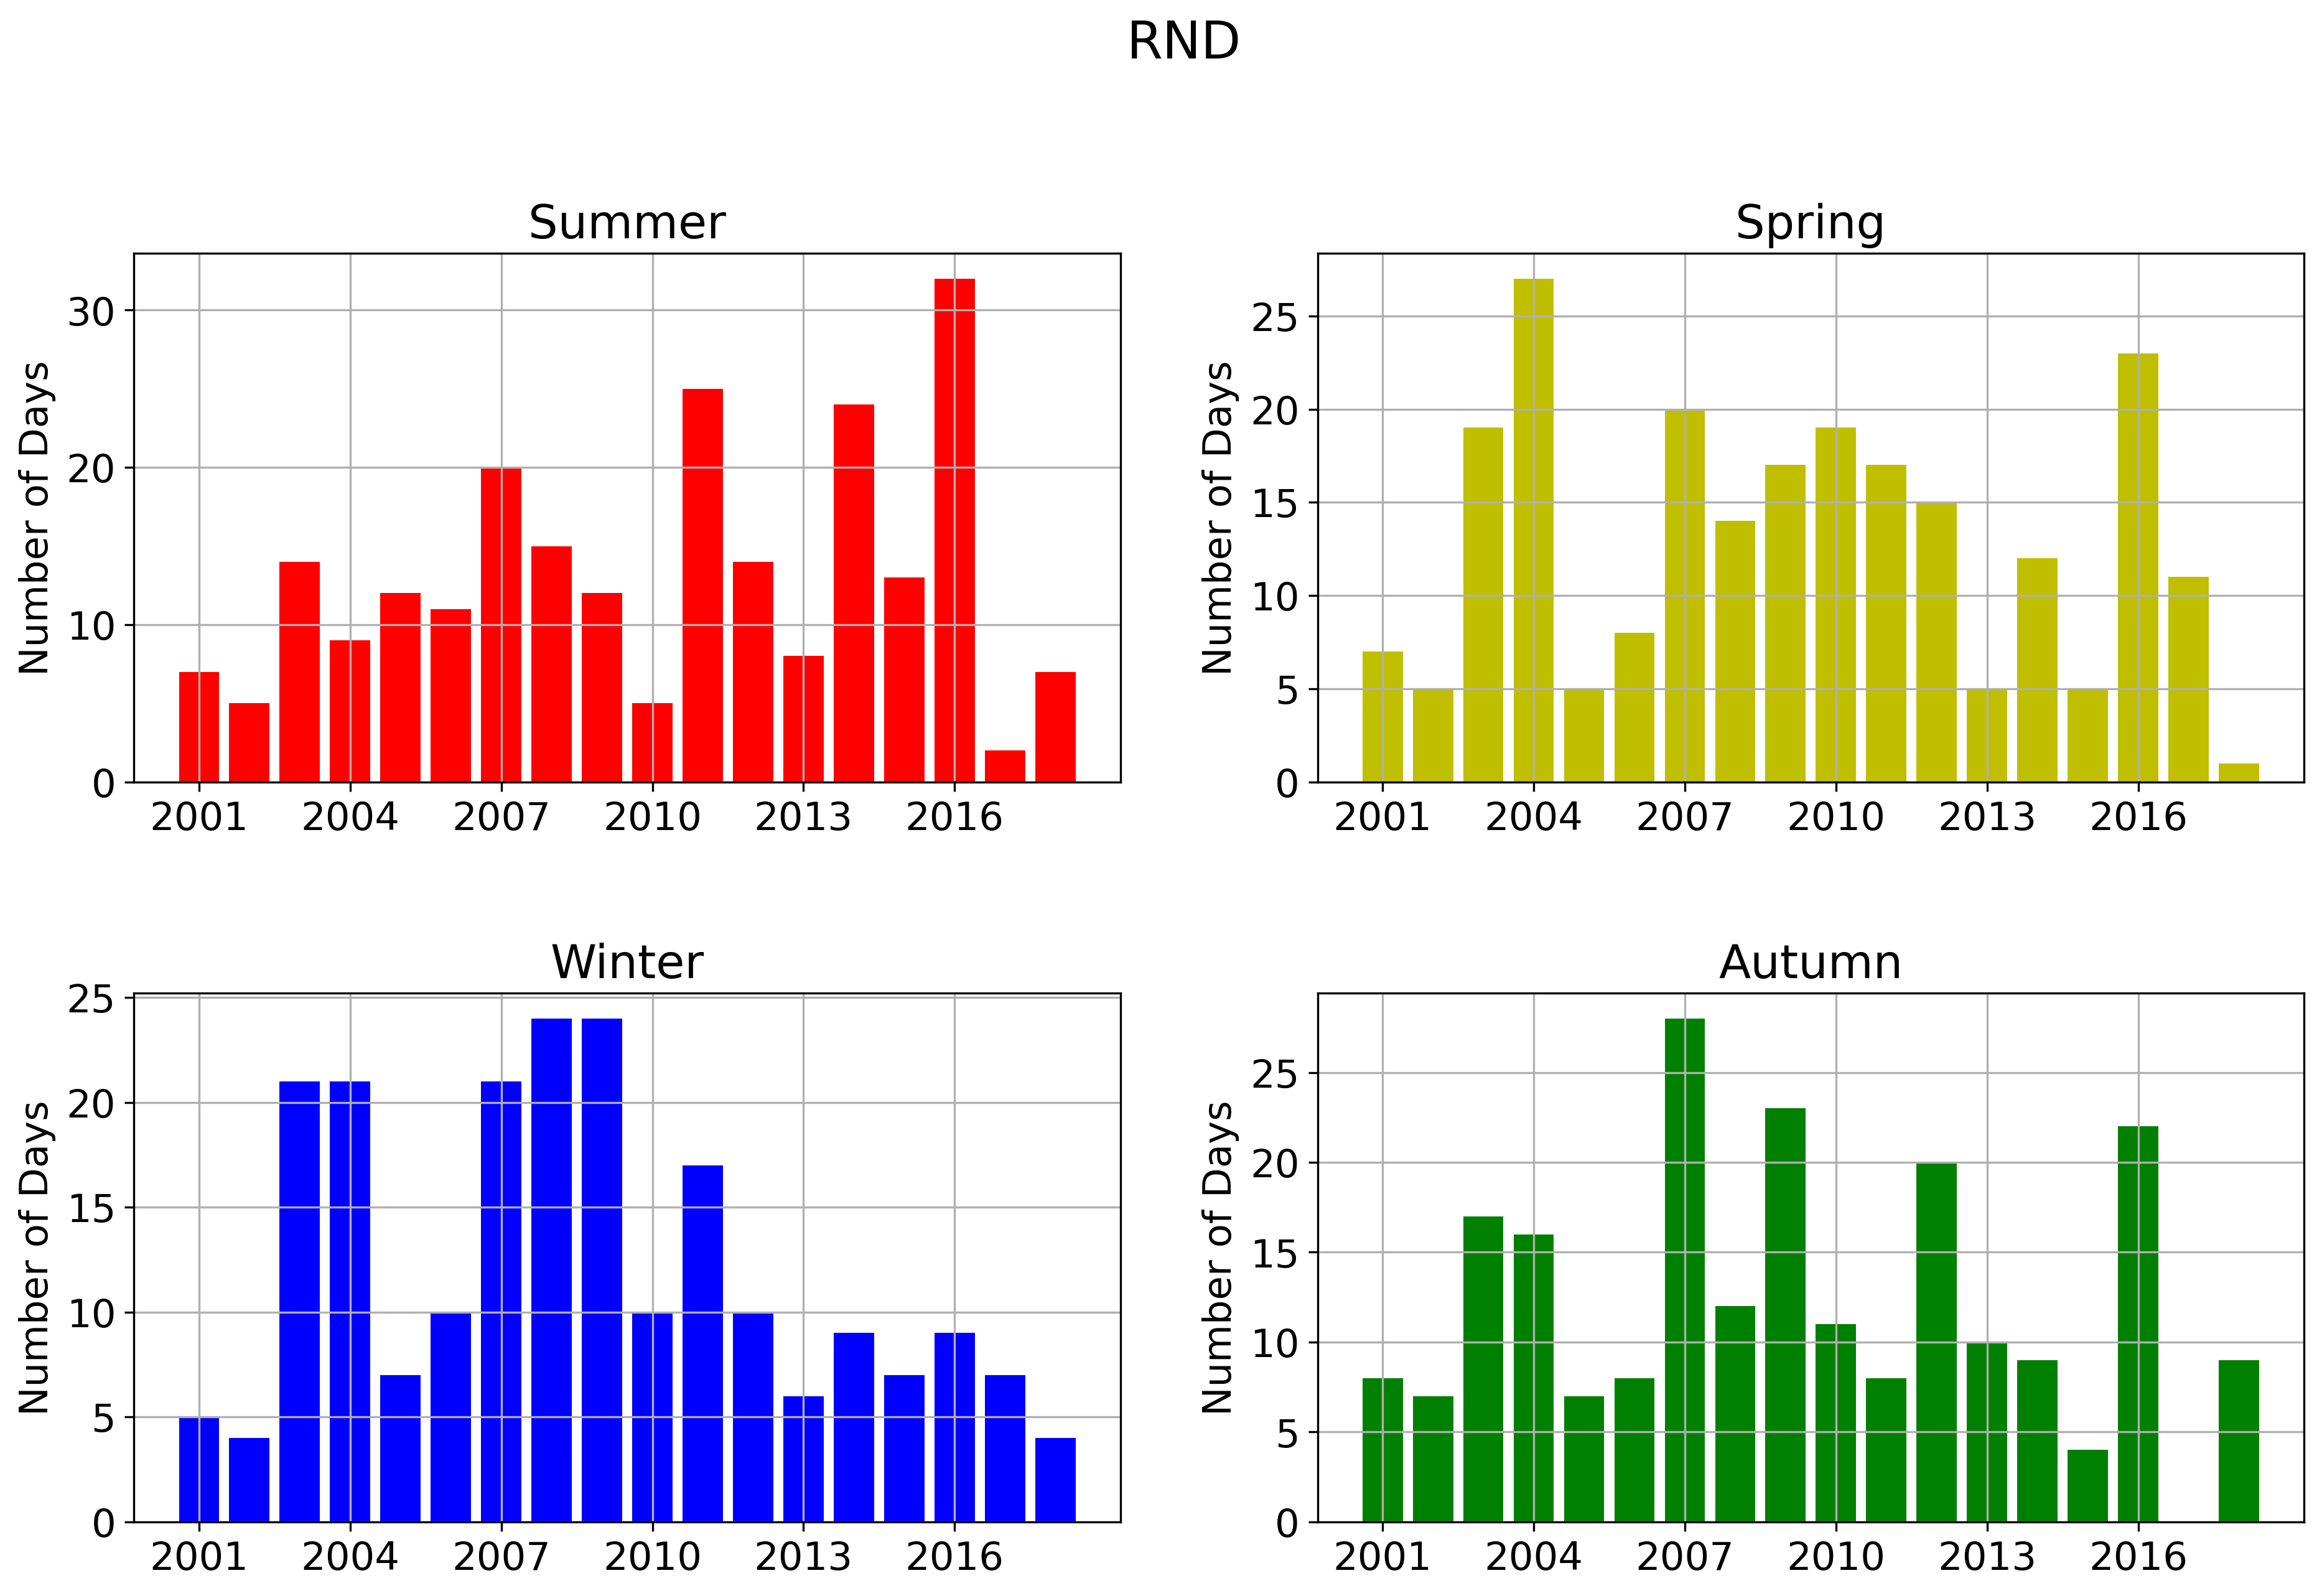

In [50]:
tex.range_seasonMetrics(database_humidity,True)

### **Extreme humidity difference between days**



In [51]:
help(tex.check_Humidity_difdays)

Help on function check_Humidity_difdays in module climatex:

check_Humidity_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of humidity according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## humidity (Dif_max) between two subsequent days and for the difference between minimum
    ## humidity (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Climatic Normal a

In [52]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum humidity difference
database_humidity, df_pct = tex.check_Humidity_difdays(database_humidity,'HMAX','HMIN',climatic_norm_humidity,'HMAX','HMIN')

,DND
YEAR,
2001,4
2002,3
2003,11
2004,2
2005,5
2006,7
2007,6
2008,2
2009,1


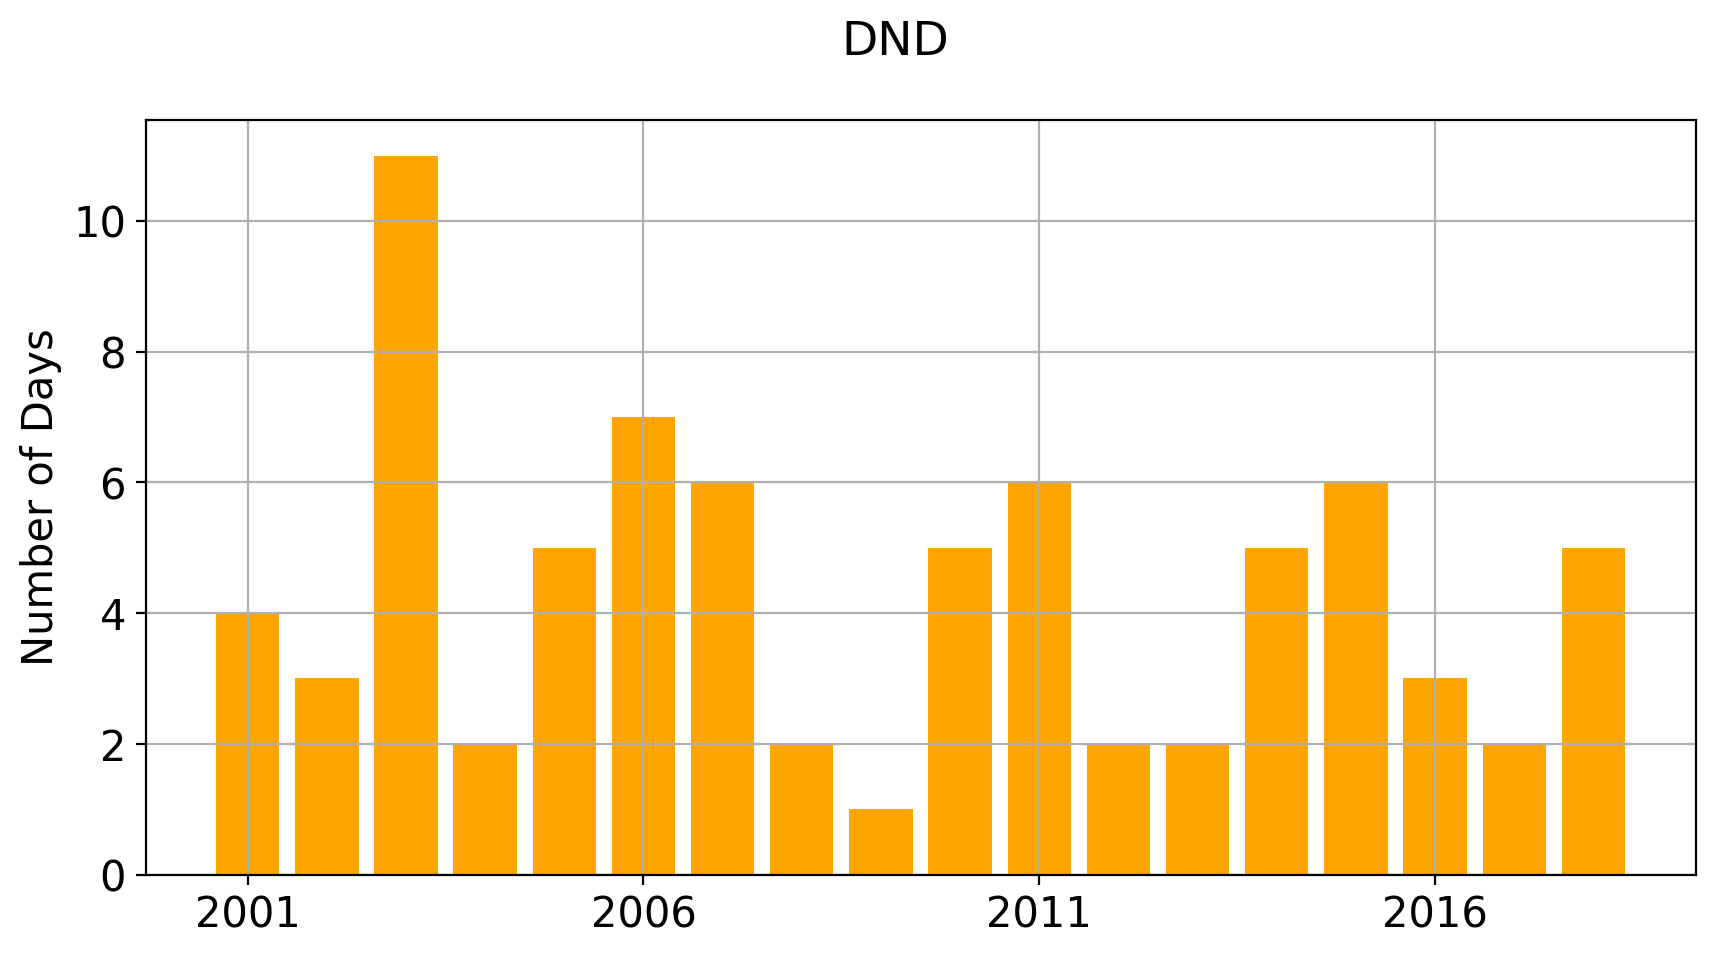

In [53]:
tex.dif_metrics(database_humidity,True)

RND
YEAR SEASON     
2001 1         1
     2         2
     3         1
     4         0
2002 1         2
...          ...
2017 4         1
2018 1         3
     2         0
     3         2
     4         0

[72 rows x 1 columns]

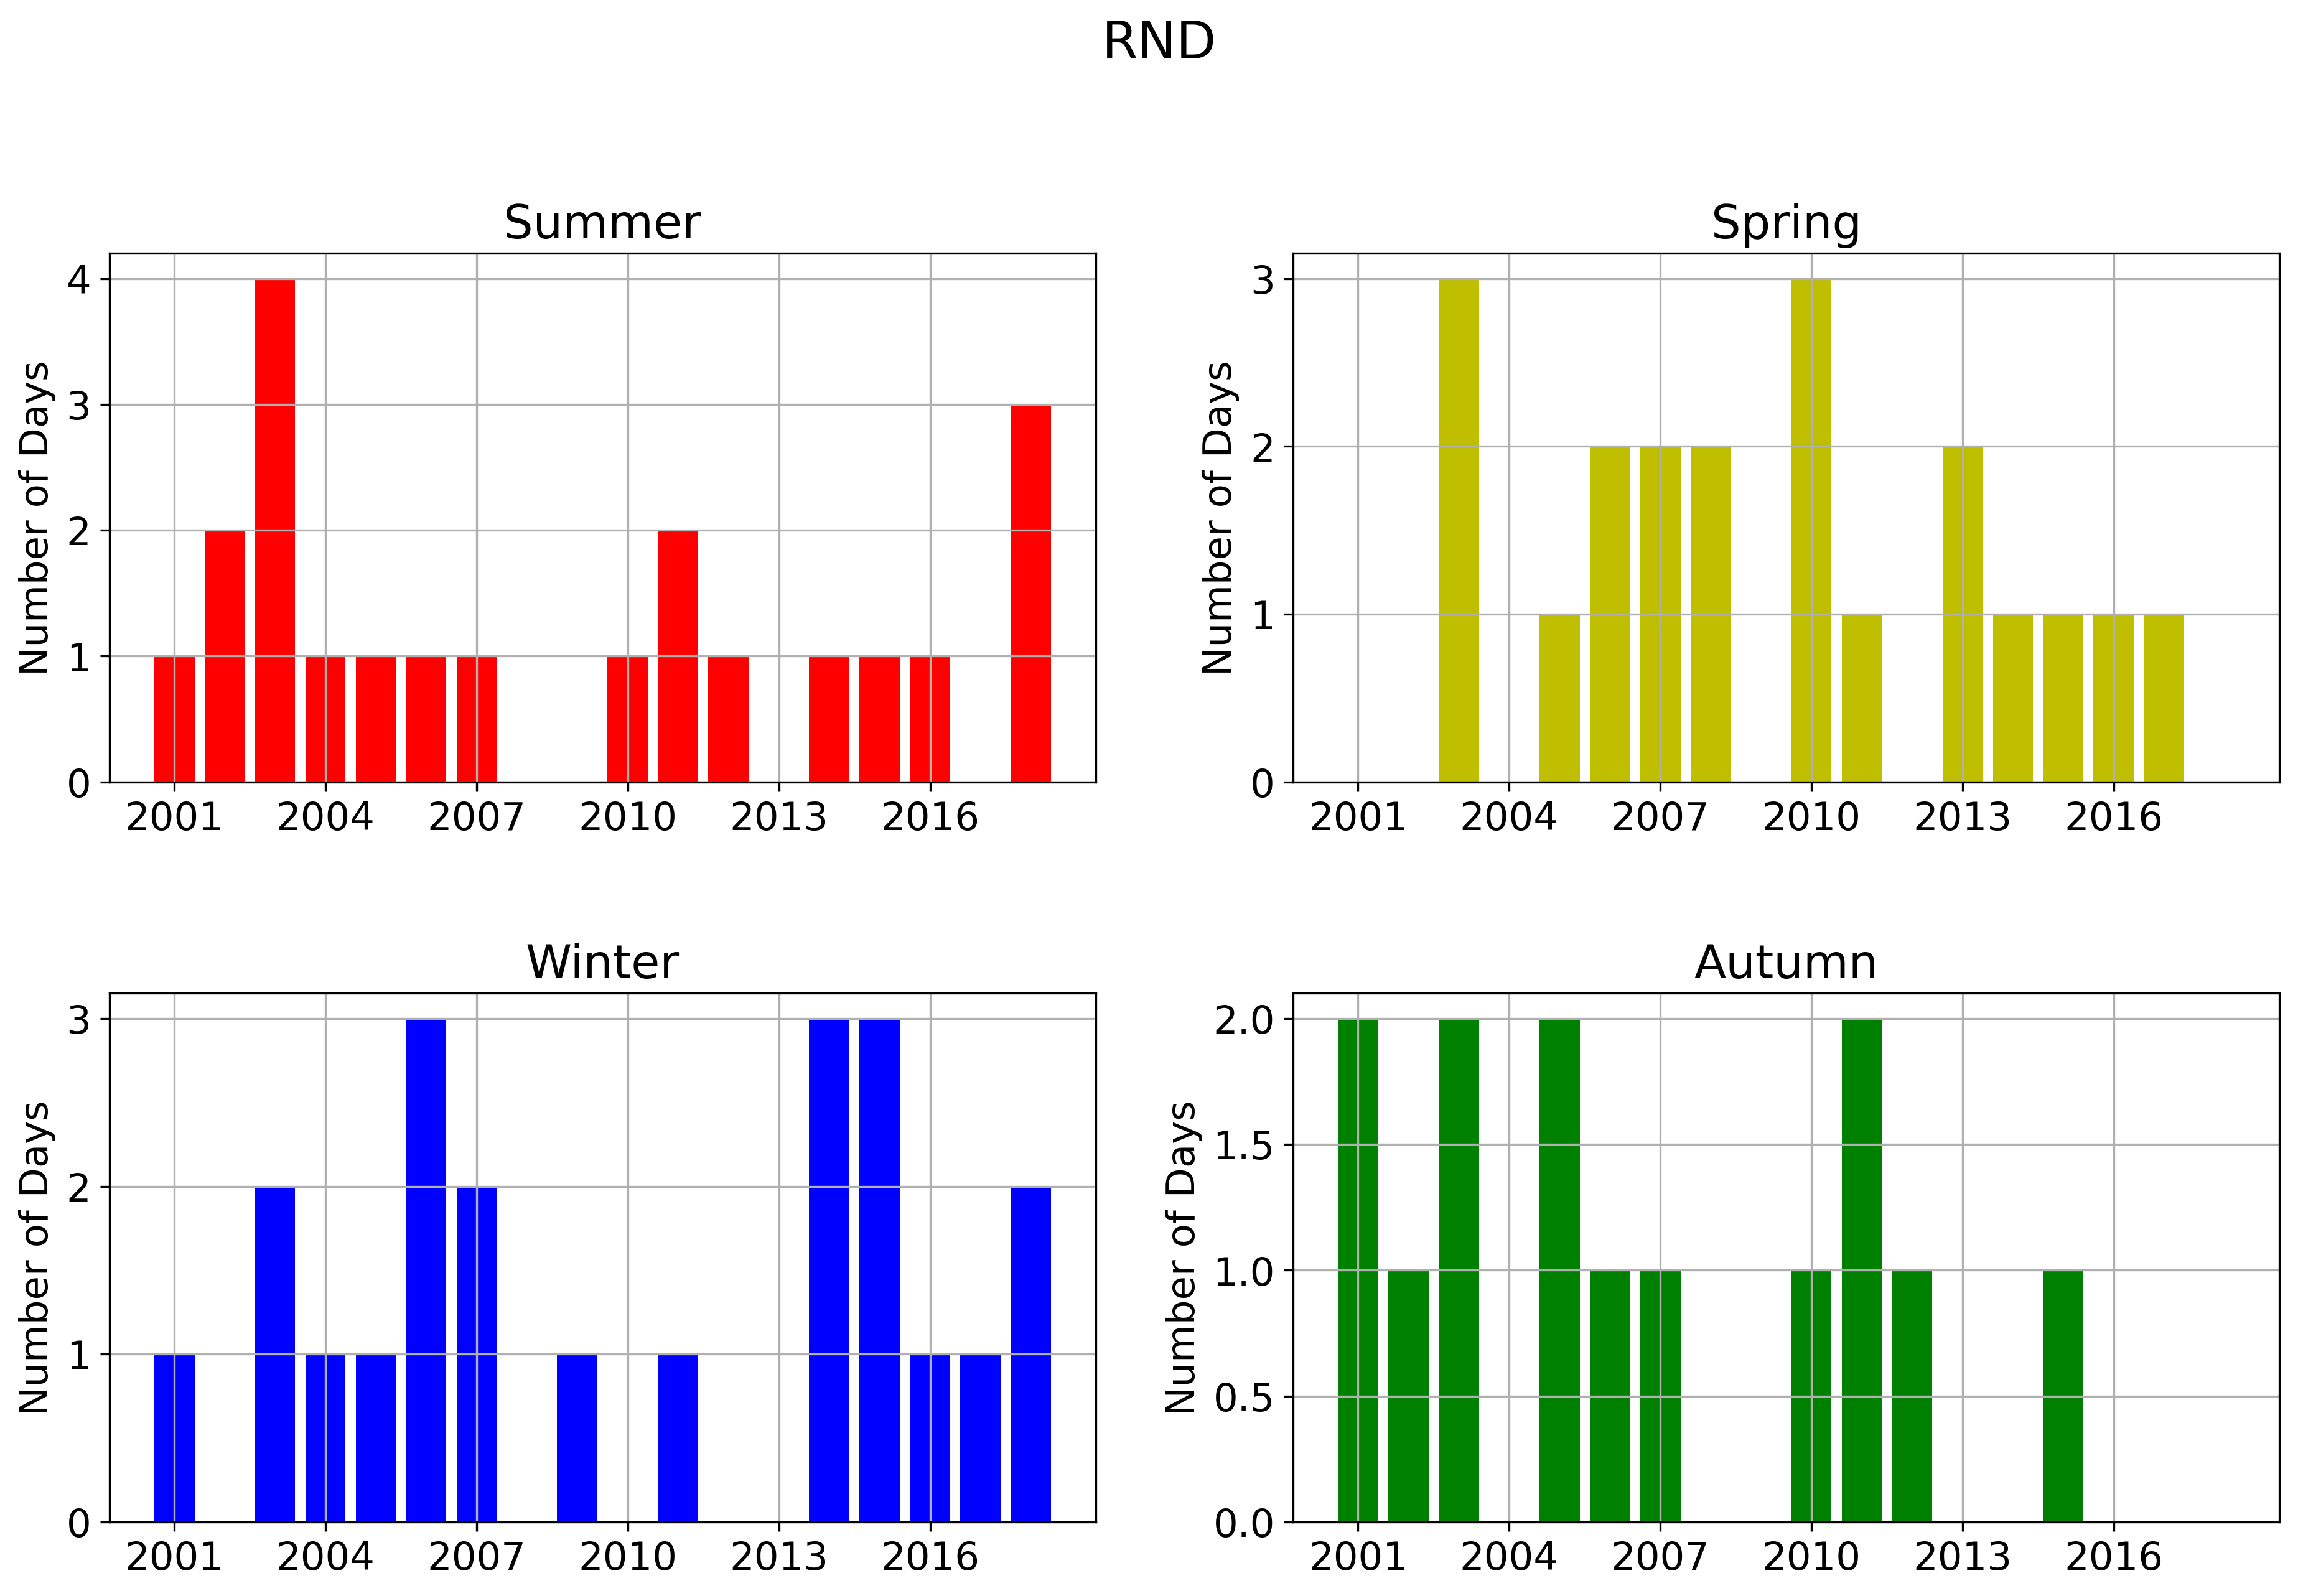

In [54]:
tex.dif_seasonMetrics(database_humidity,True)

### Save

In [55]:
database_humidity.to_csv('EV_humidity.csv')